#**Netflix Business Case - Data Exploration and Visualization**

#**About Netflix:**


Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

#**Problem Statement:**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

#**Column Profiling:**

* Show_id: Unique ID for every Movie / Tv Show
* Type: Identifier - A Movie or TV Show
* Title: Title of the Movie / Tv Show
* Director: Director of the Movie
* Cast: Actors involved in the movie/show
* Country: Country where the movie/show was produced
* Date_added: Date it was added on Netflix
* Release_year: Actual Release year of the movie/show
* Rating: TV Rating of the movie/show
* Duration: Total Duration - in minutes or number of seasons
* Listed_in: Genre
* Description: The summary description




#**Importing Libraries and Dataset**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [ ]:
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

####**Analyzing Basic Metrics**

In [ ]:
data.shape

(8807, 12)

In [ ]:
data.ndim

2

In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
data.isna().sum().sum()

4307

In [ ]:
len(data)

8807

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
data.isnull().sum().sum()

4307

In [ ]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

####**Unique Attributes & Value Counts**

In [ ]:
data['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
data['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

####**Pivoting Data**

In [ ]:
data[data.director.apply(lambda x: "," in str(x))]

show_id   type                                              title  \
6         s7  Movie                   My Little Pony: A New Generation   
16       s17  Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
23       s24  Movie       Go! Go! Cory Carson: Chrissy Takes the Wheel   
30       s31  Movie                                    Ankahi Kahaniya   
68       s69  Movie                                         Schumacher   
...      ...    ...                                                ...   
8727   s8728  Movie                              When Hari Got Married   
8728   s8729  Movie                            When Two Worlds Collide   
8737   s8738  Movie                         Why Are We Getting So Fat?   
8739   s8740  Movie                 Why We Fight: The Battle of Russia   
8765   s8766  Movie                                                 XX   

                                               director  \
6                         Robert Cullen, José Luis Ucha   
16        Pedro de Echave García, Pablo Azorín Williams   
23                              Alex Woo, Stanley Moore   
30    Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...   
68    Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...   
...                                                 ...   
8727                          Ritu Sarin, Tenzing Sonam   
8728                    Heidi Brandenburg, Mathew Orzel   
8737             Milla Harrison-Hansley, Alicky Sussman   
8739                        Frank Capra, Anatole Litvak   
8765  Jovanka Vuckovic, Annie Clark, Roxanne Benjami...   

                                                   cast  \
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
16                                                  NaN   
23    Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...   
30    Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...   
68                                   Michael Schumacher   
...                                                 ...   
8727                                                NaN   
8728                                                NaN   
8737                                          Giles Yeo   
8739                                                NaN   
8765  Natalie Brown, Jonathan Watton, Melanie Lynske...   

                                   country          date_added  release_year  \
6                                      NaN  September 24, 2021          2021   
16                                     NaN  September 22, 2021          2020   
23                                     NaN  September 21, 2021          2021   
30                                     NaN  September 17, 2021          2021   
68                                     NaN  September 15, 2021          2021   
...                                    ...                 ...           ...   
8727  United Kingdom, India, United States   December 25, 2016          2013   
8728   Peru, United States, United Kingdom   November 30, 2016          2016   
8737                        United Kingdom    February 1, 2019          2016   
8739                         United States      March 31, 2017          1943   
8765                 Canada, United States       June 22, 2017          2017   

     rating duration                                          listed_in  \
6        PG   91 min                           Children & Family Movies   
16    TV-MA   67 min                Documentaries, International Movies   
23     TV-Y   61 min                           Children & Family Movies   
30    TV-14  111 min   Dramas, Independent Movies, International Movies   
68    TV-14  113 min  Documentaries, International Movies, Sports Mo...   
...     ...      ...                                                ...   
8727     NR   75 min                Documentaries, International Movies   
8728  TV-14  103 min                Documentaries, International Movies   
8737  TV-14   50 min                                      Docu

In [ ]:
def split_my_str(inp):
    return str(inp).split(', ')

In [ ]:
unnest1 = data[['title', 'director']]
unnest1.head()

title         director
0   Dick Johnson Is Dead  Kirsten Johnson
1          Blood & Water              NaN
2              Ganglands  Julien Leclercq
3  Jailbirds New Orleans              NaN
4           Kota Factory              NaN

In [ ]:
unnest1['director']=unnest1.director.apply(split_my_str)
unnest1.shape

<ipython-input-20-4e3ca9d25569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnest1['director']=unnest1.director.apply(split_my_str)


(8807, 2)

In [ ]:
unnest1=unnest1.explode('director')
unnest1

title         director
0      Dick Johnson Is Dead  Kirsten Johnson
1             Blood & Water              nan
2                 Ganglands  Julien Leclercq
3     Jailbirds New Orleans              nan
4              Kota Factory              nan
...                     ...              ...
8802                 Zodiac    David Fincher
8803            Zombie Dumb              nan
8804             Zombieland  Ruben Fleischer
8805                   Zoom     Peter Hewitt
8806                 Zubaan      Mozez Singh

[9612 rows x 2 columns]

In [ ]:
data[data.cast.apply(lambda x: "," in str(x))]

show_id     type                             title  \
1         s2  TV Show                     Blood & Water   
2         s3  TV Show                         Ganglands   
4         s5  TV Show                      Kota Factory   
5         s6  TV Show                     Midnight Mass   
6         s7    Movie  My Little Pony: A New Generation   
...      ...      ...                               ...   
8801   s8802    Movie                           Zinzana   
8802   s8803    Movie                            Zodiac   
8804   s8805    Movie                        Zombieland   
8805   s8806    Movie                              Zoom   
8806   s8807    Movie                            Zubaan   

                           director  \
1                               NaN   
2                   Julien Leclercq   
4                               NaN   
5                     Mike Flanagan   
6     Robert Cullen, José Luis Ucha   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                           country          date_added  release_year rating  \
1                     South Africa  September 24, 2021          2021  TV-MA   
2                              NaN  September 24, 2021          2021  TV-MA   
4                            India  September 24, 2021          2021  TV-MA   
5                              NaN  September 24, 2021          2021  TV-MA   
6                              NaN  September 24, 2021          2021     PG   
...                            ...                 ...           ...    ...   
8801  United Arab Emirates, Jordan       March 9, 2016          2015  TV-MA   
8802                 United States   November 20, 2019          2007      R   
8804                 United States    November 1, 2019          2009      R   
8805                 United States    January 11, 2020          2006     PG   
8806                         India       March 2, 2019          2015  TV-14   

       duration                                          listed_in  \
1     2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
2      1 Season  Crime TV Shows, International TV Shows, TV Act...   
4     2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
5      1 Season                 TV Dramas, TV Horror, TV Mysteries   
6        91 min                           Children & Family Movies   
...         ...                                                ...   
8801     96 min            Dramas, International Movies, Thrillers   
8802    158 min                     Cult Movies, Dramas, Thrillers   
8804     88 min                            Comedies, Horror Movies   
8805     88 min                 Children & Family Movies, Comedies   
8806    111 min     Dramas, International Movies, Music & Musicals   

                                            description  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
4     In a city of coaching centers known to train I...  
5     The arrival of a charismatic young priest brin...  
6     Equestria's divided. But a brigh

In [ ]:
unnest2 = data[['title', 'cast']]
unnest2['cast']=unnest2.cast.apply(split_my_str)
unnest2=unnest2.explode('cast',ignore_index=True)


<ipython-input-23-f7825a25112e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnest2['cast']=unnest2.cast.apply(split_my_str)


In [ ]:
data[data.country.apply(lambda x: "," in str(x))]

show_id     type                title             director  \
7         s8    Movie              Sankofa         Haile Gerima   
12       s13    Movie         Je Suis Karl  Christian Schwochow   
29       s30    Movie             Paranoia       Robert Luketic   
38       s39    Movie  Birth of the Dragon         George Nolfi   
46       s47    Movie           Safe House      Daniel Espinosa   
...      ...      ...                  ...                  ...   
8788   s8789    Movie         You Carry Me           Ivona Juka   
8794   s8795    Movie               اشتباك         Mohamed Diab   
8795   s8796  TV Show      Yu-Gi-Oh! Arc-V                  NaN   
8797   s8798  TV Show            Zak Storm                  NaN   
8801   s8802    Movie              Zinzana      Majid Al Ansari   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
29    Liam Hemsworth, Gary Oldman, Amber Heard, Harr...   
38    Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...   
46    Denzel Washington, Ryan Reynolds, Vera Farmiga...   
...                                                 ...   
8788  Lana Baric, Vojislav Brajovic, Natasa Janjic, ...   
8794  Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...   
8795  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   
8797  Michael Johnston, Jessica Gee-George, Christin...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   

                                                country          date_added  \
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
29                         United States, India, France  September 19, 2021   
38                         China, Canada, United States  September 16, 2021   
46                   South Africa, United States, Japan  September 16, 2021   
...                                                 ...                 ...   
8788              Croatia, Slovenia, Serbia, Montenegro        July 1, 2016   
8794                                      Egypt, France    October 11, 2018   
8795                                      Japan, Canada         May 1, 2018   
8797      United States, France, South Korea, Indonesia  September 13, 2018   
8801                       United Arab Emirates, Jordan       March 9, 2016   

      release_year rating   duration  \
7             1993  TV-MA    125 min   
12            2021  TV-MA    127 min   
29            2013  PG-13    106 min   
38            2017  PG-13     96 min   
46            2012      R    115 min   
...            ...    ...        ...   
8788          2015  TV-MA    157 min   
8794          2016  TV-14     98 min   
8795          2015  TV-Y7  2 Seasons   
8797          2016  TV-Y7  3 Seasons   
8801          2015  TV-MA     96 min   

                                             listed_in  \
7     Dramas, Independent Movies, International Movies   
12                        Dramas, International Movies   
29                                           Thrillers   
38                          Action & Adventure, Dramas   
46                                  Action & Adventure   
...                                                ...   
8788                      Dramas, International Movies   
8794  Dramas, Independent Movies, International Movies   
8795                            Anime Series, Kids' TV   
8797                                          Kids' TV   
8801           Dramas, International Movies, Thrillers   

                                            description  
7     On a photo shoot in Ghana, an American model s...  
12    After most of her family is murdered in a terr...  
29    Blackmailed by his company's CEO, a low-level ...  
38    A young Bruce Lee angers kung fu traditionalis...  
46    Young CIA operative Matt Weston must get a dan...  
...             

In [ ]:
unnest3 = data[['title', 'country']]
unnest3['country']=unnest3.country.apply(split_my_str)
unnest3=unnest3.explode('country',ignore_index=True)

<ipython-input-25-a5194101093e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnest3['country']=unnest3.country.apply(split_my_str)


In [ ]:
data[data.listed_in.apply(lambda x: "," in str(x))]

show_id     type                  title         director  \
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...            NaN   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
5     September 24, 2021          2021  TV-MA   1 Season   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
5                    TV Dramas, TV Horror, TV Mysteries   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
5     The arrival of a charismatic young priest brin...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[6787 rows x 12 columns]

In [ ]:
unnest4 = data[['title', 'listed_in']]
unnest4['listed_in']=unnest4.listed_in.apply(split_my_str)
unnest4=unnest4.explode('listed_in',ignore_index=True)

<ipython-input-27-d56e76cb5e61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnest4['listed_in']=unnest4.listed_in.apply(split_my_str)


In [ ]:
unnest1.head()

title         director
0   Dick Johnson Is Dead  Kirsten Johnson
1          Blood & Water              nan
2              Ganglands  Julien Leclercq
3  Jailbirds New Orleans              nan
4           Kota Factory              nan

In [ ]:
unnest2.head()

title            cast
0  Dick Johnson Is Dead             nan
1         Blood & Water      Ama Qamata
2         Blood & Water     Khosi Ngema
3         Blood & Water   Gail Mabalane
4         Blood & Water  Thabang Molaba

In [ ]:
#merging the unnested director data with unnested actors data
data_new1=unnest2.merge(unnest1,on=['title'],how='inner')

data_new2=data_new1.merge(unnest3,on=['title'],how='inner')

data_new3=data_new2.merge(unnest4,on=['title'],how='inner')
data_new3.head()

title         cast         director        country  \
0  Dick Johnson Is Dead          nan  Kirsten Johnson  United States   
1         Blood & Water   Ama Qamata              nan   South Africa   
2         Blood & Water   Ama Qamata              nan   South Africa   
3         Blood & Water   Ama Qamata              nan   South Africa   
4         Blood & Water  Khosi Ngema              nan   South Africa   

                listed_in  
0           Documentaries  
1  International TV Shows  
2               TV Dramas  
3            TV Mysteries  
4  International TV Shows

###**Missing Values and Outlier Treatment**

In [ ]:
data_new3.isna().sum()

title        0
cast         0
director     0
country      0
listed_in    0
dtype: int64

In [ ]:
data_new3.shape

(201991, 5)

In [ ]:
data_new3['director'].replace('nan','Unknown Director',inplace=True)
data_new3['cast'].replace('nan','Unknown Cast',inplace=True)
data_new3['country'].replace(['nan'],[np.nan],inplace=True)


data_new3.shape

<ipython-input-33-4ad82945e4ab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new3['director'].replace('nan','Unknown Director',inplace=True)
<ipython-input-33-4ad82945e4ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

(201991, 5)

In [ ]:
data_new3.head()

title          cast          director        country  \
0  Dick Johnson Is Dead  Unknown Cast   Kirsten Johnson  United States   
1         Blood & Water    Ama Qamata  Unknown Director   South Africa   
2         Blood & Water    Ama Qamata  Unknown Director   South Africa   
3         Blood & Water    Ama Qamata  Unknown Director   South Africa   
4         Blood & Water   Khosi Ngema  Unknown Director   South Africa   

                listed_in  
0           Documentaries  
1  International TV Shows  
2               TV Dramas  
3            TV Mysteries  
4  International TV Shows

Merging with original dataset

In [ ]:
data_final=data_new3.merge(data[['show_id','type','title','date_added','release_year','rating','duration']],on=['title'],how='left')
data_final.head()

#df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
 #      'release_year', 'rating', 'duration']],on=['title'],how='left')
#df_final.head()

title          cast          director        country  \
0  Dick Johnson Is Dead  Unknown Cast   Kirsten Johnson  United States   
1         Blood & Water    Ama Qamata  Unknown Director   South Africa   
2         Blood & Water    Ama Qamata  Unknown Director   South Africa   
3         Blood & Water    Ama Qamata  Unknown Director   South Africa   
4         Blood & Water   Khosi Ngema  Unknown Director   South Africa   

                listed_in show_id     type          date_added  release_year  \
0           Documentaries      s1    Movie  September 25, 2021          2020   
1  International TV Shows      s2  TV Show  September 24, 2021          2021   
2               TV Dramas      s2  TV Show  September 24, 2021          2021   
3            TV Mysteries      s2  TV Show  September 24, 2021          2021   
4  International TV Shows      s2  TV Show  September 24, 2021          2021   

  rating   duration  
0  PG-13     90 min  
1  TV-MA  2 Seasons  
2  TV-MA  2 Seasons  
3  TV-MA  2 Seasons  
4  TV-MA  2 Seasons

In [ ]:
data_final1=data_final.copy()

In [ ]:
data_final.isna().sum()

title               0
cast                0
director            0
country         11897
listed_in           0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [ ]:
data_final.loc[data_final['duration'].isnull(),['duration','rating']]

duration  rating
126537      NaN  74 min
131603      NaN  84 min
131737      NaN  66 min

In [ ]:
data_final.loc[data_final['duration'].isnull(),'duration']=data_final.loc[data_final['duration'].isnull(),'duration'].fillna(data_final['rating'])
#data_final.isnull().sum()

In [ ]:

#data_final.loc[data_final['duration'].isnull(),'duration']=data_final.loc[data_final['duration'].isnull(),'duration'].fillna(data_final['rating'])
data_final.isnull().sum()

title               0
cast                0
director            0
country         11897
listed_in           0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [ ]:
data_final.loc[data_final['rating'].str.contains('min', na=False),'rating']='Unknown Rating'
#data_final.loc[data_final['rating'].str.contains('min', na=False),'rating']='Unknown_Rating

In [ ]:
data_final.isnull().sum()

title               0
cast                0
director            0
country         11897
listed_in           0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [ ]:
data_final.loc[data_final['rating'].str.contains('min', na=False),'rating']

Series([], Name: rating, dtype: object)

In [ ]:
data_final['rating'].fillna('Unknown Rating',inplace=True)
data_final.isnull().sum()

title               0
cast                0
director            0
country         11897
listed_in           0
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [ ]:
data_final[data_final['date_added'].isnull()].head()

title              cast  \
136893  A Young Doctor's Notebook and Other Stories  Daniel Radcliffe   
136894  A Young Doctor's Notebook and Other Stories  Daniel Radcliffe   
136895  A Young Doctor's Notebook and Other Stories  Daniel Radcliffe   
136896  A Young Doctor's Notebook and Other Stories          Jon Hamm   
136897  A Young Doctor's Notebook and Other Stories          Jon Hamm   

                director         country         listed_in show_id     type  \
136893  Unknown Director  United Kingdom  British TV Shows   s6067  TV Show   
136894  Unknown Director  United Kingdom       TV Comedies   s6067  TV Show   
136895  Unknown Director  United Kingdom         TV Dramas   s6067  TV Show   
136896  Unknown Director  United Kingdom  British TV Shows   s6067  TV Show   
136897  Unknown Director  United Kingdom       TV Comedies   s6067  TV Show   

       date_added  release_year rating   duration  
136893        NaN          2013  TV-MA  2 Seasons  
136894        NaN          2013  TV-MA  2 Seasons  
136895        NaN          2013  TV-MA  2 Seasons  
136896        NaN          2013  TV-MA  2 Seasons  
136897        NaN          2013  TV-MA  2 Seasons

In [ ]:
#data_final[data_final['date_added'].isnull()]['release_year'].unique()
a=data_final[data_final['date_added'].isnull()]['release_year'].unique()
a

array([2013, 2018, 2003, 2008, 2010, 2012, 2016, 2015])

In [ ]:
for i in a:
  temp=data_final[data_final['release_year']==i]['date_added'].mode().values[0]
  data_final.loc[data_final['release_year']==i,'date_added']=data_final.loc[data_final['release_year']==i,'date_added'].fillna(temp)


In [ ]:
data_final.isnull().sum()

title               0
cast                0
director            0
country         11897
listed_in           0
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

In [ ]:
for i in data_final[data_final['country'].isnull()]['director'].unique(): # all the places where corresponding country is missing for a director

    if i in data_final[~data_final['country'].isnull()]['director'].unique():
      temp=data_final[data_final['director']==i]['country'].mode().values[0]
      data_final.loc[data_final['director']==i,'country']=data_final.loc[data_final['director']==i,'country'].fillna(temp)

In [ ]:
for i in data_final[data_final['country'].isnull()]['cast'].unique():
  if i in data_final[~data_final['country'].isnull()]['cast'].unique():
    temp=data_final[data_final['cast']==i]['country'].mode().values[0]
    data_final.loc[data_final['cast']==i,'country']=data_final.loc[data_final['cast']==i,'country'].fillna(temp)

In [ ]:
data_final.isnull().sum()

title              0
cast               0
director           0
country         2069
listed_in          0
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

In [ ]:
data_final['country'].fillna('Unknown Country',inplace=True)

<ipython-input-52-210e7522e83f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_final['country'].fillna('Unknown Country',inplace=True)


In [ ]:
data_final.isnull().sum()

title           0
cast            0
director        0
country         0
listed_in       0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

###**Graphical and Non-Graphical Ananlysis**

In [ ]:
data_final.head()

title          cast          director        country  \
0  Dick Johnson Is Dead  Unknown Cast   Kirsten Johnson  United States   
1         Blood & Water    Ama Qamata  Unknown Director   South Africa   
2         Blood & Water    Ama Qamata  Unknown Director   South Africa   
3         Blood & Water    Ama Qamata  Unknown Director   South Africa   
4         Blood & Water   Khosi Ngema  Unknown Director   South Africa   

                listed_in show_id     type          date_added  release_year  \
0           Documentaries      s1    Movie  September 25, 2021          2020   
1  International TV Shows      s2  TV Show  September 24, 2021          2021   
2               TV Dramas      s2  TV Show  September 24, 2021          2021   
3            TV Mysteries      s2  TV Show  September 24, 2021          2021   
4  International TV Shows      s2  TV Show  September 24, 2021          2021   

  rating   duration  
0  PG-13     90 min  
1  TV-MA  2 Seasons  
2  TV-MA  2 Seasons  
3  TV-MA  2 Seasons  
4  TV-MA  2 Seasons

In [ ]:
data_final['duration'].value_counts()


duration
1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: count, Length: 220, dtype: int64

The Duration column has both minutes for movies and seasons for shows merged.

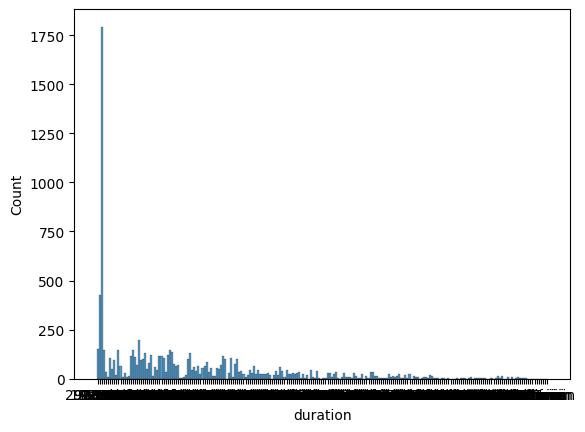

In [ ]:
sns.histplot(data['duration'], bins=10)
plt.show()

In [ ]:
data_min=data_final.loc[data_final['duration'].str.contains('min')]
data_min

title                   cast  \
0                   Dick Johnson Is Dead           Unknown Cast   
159     My Little Pony: A New Generation        Vanessa Hudgens   
160     My Little Pony: A New Generation        Vanessa Hudgens   
161     My Little Pony: A New Generation           Kimiko Glenn   
162     My Little Pony: A New Generation           Kimiko Glenn   
...                                  ...                    ...   
201986                            Zubaan         Anita Shabdish   
201987                            Zubaan         Anita Shabdish   
201988                            Zubaan  Chittaranjan Tripathy   
201989                            Zubaan  Chittaranjan Tripathy   
201990                            Zubaan  Chittaranjan Tripathy   

               director        country                 listed_in show_id  \
0       Kirsten Johnson  United States             Documentaries      s1   
159       Robert Cullen  United States  Children & Family Movies      s7   
160      José Luis Ucha  United States  Children & Family Movies      s7   
161       Robert Cullen  United States  Children & Family Movies      s7   
162      José Luis Ucha  United States  Children & Family Movies      s7   
...                 ...            ...                       ...     ...   
201986      Mozez Singh          India      International Movies   s8807   
201987      Mozez Singh          India          Music & Musicals   s8807   
201988      Mozez Singh          India                    Dramas   s8807   
201989      Mozez Singh          India      International Movies   s8807   
201990      Mozez Singh          India          Music & Musicals   s8807   

         type          date_added  release_year rating duration  
0       Movie  September 25, 2021          2020  PG-13   90 min  
159     Movie  September 24, 2021          2021     PG   91 min  
160     Movie  September 24, 2021          2021     PG   91 min  
161     Movie  September 24, 2021          2021     PG   91 min  
162     Movie  September 24, 2021          2021     PG   91 min  
...       ...                 ...           ...    ...      ...  
201986  Movie       March 2, 2019          2015  TV-14  111 min  
201987  Movie       March 2, 2019          2015  TV-14  111 min  
201988  Movie       March 2, 2019          2015  TV-14  111 min  
201989  Movie       March 2, 2019          2015  TV-14  111 min  
201990  Movie       March 2, 2019          2015  TV-14  111 min  

[145843 rows x 11 columns]

In [ ]:
data_min['duration']=data_min['duration'].str.replace(" min","")
data_min.head()

<ipython-input-58-4b0c2acf6eef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_min['duration']=data_min['duration'].str.replace(" min","")


title             cast         director  \
0                Dick Johnson Is Dead     Unknown Cast  Kirsten Johnson   
159  My Little Pony: A New Generation  Vanessa Hudgens    Robert Cullen   
160  My Little Pony: A New Generation  Vanessa Hudgens   José Luis Ucha   
161  My Little Pony: A New Generation     Kimiko Glenn    Robert Cullen   
162  My Little Pony: A New Generation     Kimiko Glenn   José Luis Ucha   

           country                 listed_in show_id   type  \
0    United States             Documentaries      s1  Movie   
159  United States  Children & Family Movies      s7  Movie   
160  United States  Children & Family Movies      s7  Movie   
161  United States  Children & Family Movies      s7  Movie   
162  United States  Children & Family Movies      s7  Movie   

             date_added  release_year rating duration  
0    September 25, 2021          2020  PG-13       90  
159  September 24, 2021          2021     PG       91  
160  September 24, 2021          2021     PG       91  
161  September 24, 2021          2021     PG       91  
162  September 24, 2021          2021     PG       91

In [ ]:
data_min['duration']=data_min['duration'].astype(int)
data_min['duration'].describe()

<ipython-input-59-cd7b9a4675b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_min['duration']=data_min['duration'].astype(int)


count    145843.00000
mean        106.85579
std          24.69672
min           3.00000
25%          93.00000
50%         104.00000
75%         119.00000
max         312.00000
Name: duration, dtype: float64

In [ ]:
bins = [1,20,40,60,80,100,120,140,160,180,200,250,315]
labels = ['1-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160','160-180','180-200','200-250','200-315']
data_min['duration'] = pd.cut(data_min['duration'],bins=bins,labels=labels)
data_min.head()

<ipython-input-60-c4e774028024>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_min['duration'] = pd.cut(data_min['duration'],bins=bins,labels=labels)


title             cast         director  \
0                Dick Johnson Is Dead     Unknown Cast  Kirsten Johnson   
159  My Little Pony: A New Generation  Vanessa Hudgens    Robert Cullen   
160  My Little Pony: A New Generation  Vanessa Hudgens   José Luis Ucha   
161  My Little Pony: A New Generation     Kimiko Glenn    Robert Cullen   
162  My Little Pony: A New Generation     Kimiko Glenn   José Luis Ucha   

           country                 listed_in show_id   type  \
0    United States             Documentaries      s1  Movie   
159  United States  Children & Family Movies      s7  Movie   
160  United States  Children & Family Movies      s7  Movie   
161  United States  Children & Family Movies      s7  Movie   
162  United States  Children & Family Movies      s7  Movie   

             date_added  release_year rating duration  
0    September 25, 2021          2020  PG-13   80-100  
159  September 24, 2021          2021     PG   80-100  
160  September 24, 2021          2021     PG   80-100  
161  September 24, 2021          2021     PG   80-100  
162  September 24, 2021          2021     PG   80-100

In [ ]:
data_season=data_final.loc[data_final['duration'].str.contains('Season')]
data_season.dtypes

title           object
cast            object
director        object
country         object
listed_in       object
show_id         object
type            object
date_added      object
release_year     int64
rating          object
duration        object
dtype: object

In [ ]:
data_season['duration'].value_counts()

duration
1 Season      35035
2 Seasons      9559
3 Seasons      5084
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: count, dtype: int64

In [ ]:
data_min['duration'].value_counts()

duration
80-100     52937
100-120    48724
120-140    21898
140-160     7528
60-80       6498
160-180     3136
40-60       2155
20-40       1455
180-200      866
200-250      481
1-20         122
200-315       43
Name: count, dtype: int64

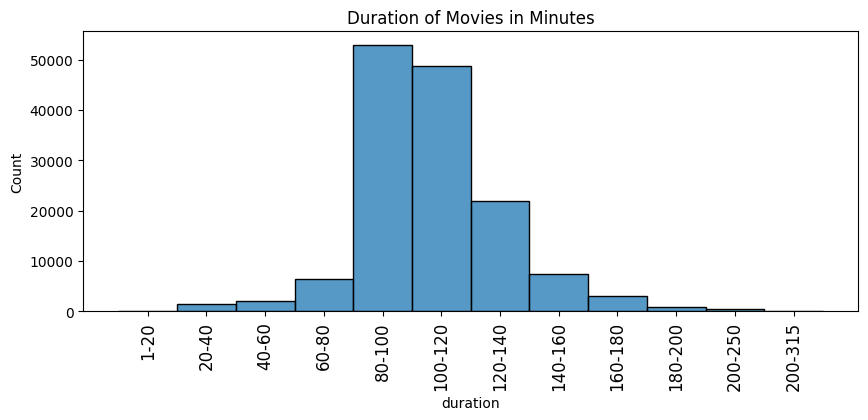

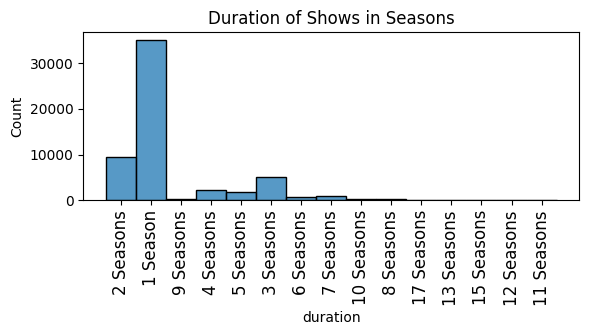

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title('Duration of Movies in Minutes')
sns.histplot(data_min['duration'], bins=10)
plt.xticks(rotation=90,fontsize=12)
plt.show()

plt.subplot(2,1,2)
plt.title('Duration of Shows in Seasons')
sns.histplot(data_season['duration'], bins=10)
plt.xticks(rotation=90,fontsize=12)
plt.show()


The below are the mostly found content duration in netflix.

1.   80-100 min/100-120 min
2.   1Season



In [ ]:
data_final

title                   cast          director  \
0       Dick Johnson Is Dead           Unknown Cast   Kirsten Johnson   
1              Blood & Water             Ama Qamata  Unknown Director   
2              Blood & Water             Ama Qamata  Unknown Director   
3              Blood & Water             Ama Qamata  Unknown Director   
4              Blood & Water            Khosi Ngema  Unknown Director   
...                      ...                    ...               ...   
201986                Zubaan         Anita Shabdish       Mozez Singh   
201987                Zubaan         Anita Shabdish       Mozez Singh   
201988                Zubaan  Chittaranjan Tripathy       Mozez Singh   
201989                Zubaan  Chittaranjan Tripathy       Mozez Singh   
201990                Zubaan  Chittaranjan Tripathy       Mozez Singh   

              country               listed_in show_id     type  \
0       United States           Documentaries      s1    Movie   
1        South Africa  International TV Shows      s2  TV Show   
2        South Africa               TV Dramas      s2  TV Show   
3        South Africa            TV Mysteries      s2  TV Show   
4        South Africa  International TV Shows      s2  TV Show   
...               ...                     ...     ...      ...   
201986          India    International Movies   s8807    Movie   
201987          India        Music & Musicals   s8807    Movie   
201988          India                  Dramas   s8807    Movie   
201989          India    International Movies   s8807    Movie   
201990          India        Music & Musicals   s8807    Movie   

                date_added  release_year rating   duration  
0       September 25, 2021          2020  PG-13     90 min  
1       September 24, 2021          2021  TV-MA  2 Seasons  
2       September 24, 2021          2021  TV-MA  2 Seasons  
3       September 24, 2021          2021  TV-MA  2 Seasons  
4       September 24, 2021          2021  TV-MA  2 Seasons  
...                    ...           ...    ...        ...  
201986       March 2, 2019          2015  TV-14    111 min  
201987       March 2, 2019          2015  TV-14    111 min  
201988       March 2, 2019          2015  TV-14    111 min  
201989       March 2, 2019          2015  TV-14    111 min  
201990       March 2, 2019          2015  TV-14    111 min  

[201991 rows x 11 columns]

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
data_listed_in_val=data_final.groupby(['listed_in'])['title'].nunique().sort_values(ascending=False)[:10].reset_index()
data_listed_in_val

listed_in  title
0      International Movies   2752
1                    Dramas   2427
2                  Comedies   1674
3    International TV Shows   1351
4             Documentaries    869
5        Action & Adventure    859
6                 TV Dramas    763
7        Independent Movies    756
8  Children & Family Movies    641
9           Romantic Movies    616

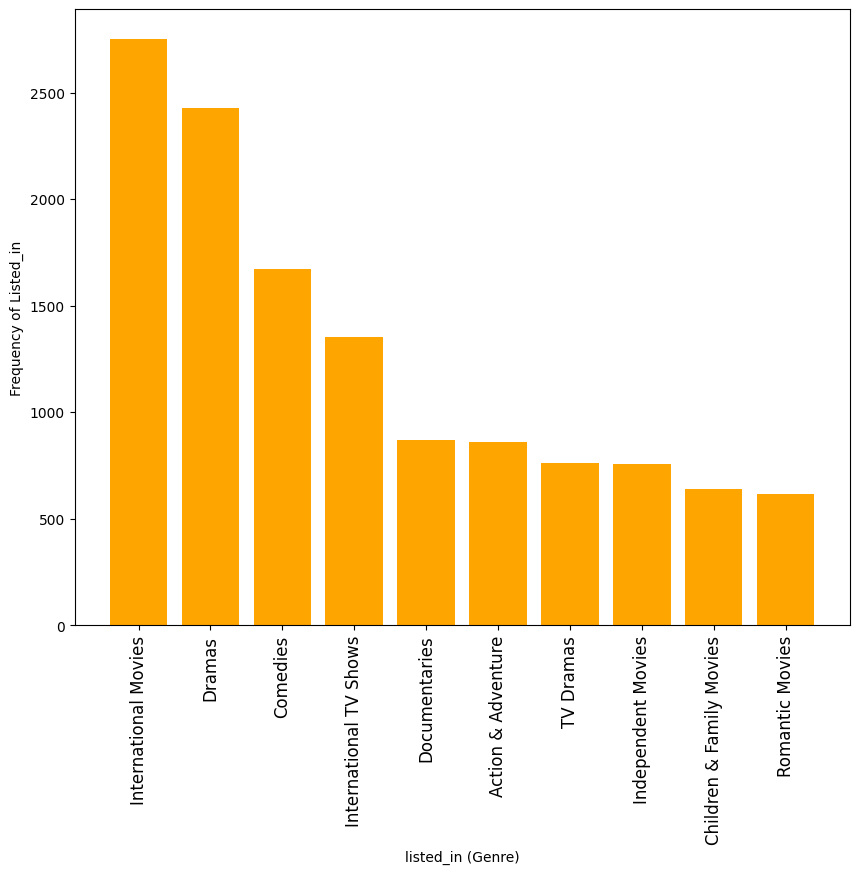

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(data_listed_in_val['listed_in'], data_listed_in_val['title'],color=['orange'])
plt.xlabel('listed_in (Genre)')
plt.ylabel('Frequency of Listed_in')
plt.xticks(rotation=90,fontsize=12)
plt.show()

The Top3 content in netflix are International Movies, Dramas and Comedies

In [ ]:
data_country_val=data_final.groupby(['country'])['title'].nunique().reset_index()
data_country_val

country  title
0                              3
1             Afghanistan      1
2                 Albania      1
3                 Algeria      3
4                  Angola      2
5               Argentina     94
6                 Armenia      1
7               Australia    162
8                 Austria     12
9              Azerbaijan      1
10                Bahamas      1
11             Bangladesh      4
12                Belarus      1
13                Belgium     94
14                Bermuda      1
15               Botswana      1
16                 Brazil    103
17               Bulgaria     10
18           Burkina Faso      1
19               Cambodia      5
20              Cambodia,      1
21               Cameroon      2
22                 Canada    460
23         Cayman Islands      2
24                  Chile     30
25                  China    166
26               Colombia     54
27                Croatia      4
28                   Cuba      2
29                 Cyprus      1
30         Czech Republic     23
31                Denmark     50
32     Dominican Republic      1
33           East Germany      1
34                Ecuador      1
35                  Egypt    134
36               Ethiopia      1
37                Finland     12
38                 France    409
39                Georgia      2
40                Germany    231
41                  Ghana      8
42                 Greece     11
43              Guatemala      2
44              Hong Kong    110
45                Hungary     11
46                Iceland     11
47                  India   1138
48              Indonesia     97
49                   Iran      4
50                   Iraq      2
51                Ireland     46
52                 Israel     30
53                  Italy    102
54                Jamaica      1
55                  Japan    338
56                 Jordan     10
57             Kazakhstan      1
58                  Kenya      6
59                 Kuwait      9
60                 Latvia      1
61                Lebanon     33
62          Liechtenstein      1
63              Lithuania      1
64             Luxembourg     12
65                 Malawi      1
66               Malaysia     26
67                  Malta      3
68              Mauritius      3
69                 Mexico    175
70               Mongolia      1
71             Montenegro      1
72                Morocco      6
73             Mozambique      1
74                Namibia      2
75                  Nepal      2
76            Netherlands     50
77            New Zealand     33
78              Nicaragua      1
79                Nigeria    140
80                 Norway     30
81               Pakistan     24
82              Palestine      1
83                 Panama      1
84               Paraguay      1
85                   Peru     11
86            Philippines     90
87                 Poland     41
88                Poland,      1
89               Portugal      6
90            Puerto Rico      1
91                  Qatar     10
92                Romania     14
93                 Russia     27
94                  Samoa      1
95           Saudi Arabia     14
96                Senegal      3
97                 Serbia      7
98              Singapore     41
99               Slovakia      1
100              Slovenia      3
101               Somalia      1
102          South Africa     65
103           South Korea    235
104          Soviet Union      3
105                 Spain    239
106             Sri Lanka      1
107                 Sudan      1
108                Sweden     44
109           Switzerland     19
110                 Syria      3
111                Taiwan     94
112              Thailand     74
113                Turkey    115
114                Uganda      1
115               Ukraine      3
116  United Arab Emirates     38
117        United Kingdom    829
118       United Kingdom,      2
119         United States   4248
120        United States,

In [ ]:
data_country_val[data_country_val['country'].str.contains(',')]

country  title
20         Cambodia,      1
88           Poland,      1
118  United Kingdom,      2
120   United States,      1

In [ ]:
data_final['country'] = data_final['country'].str.replace(',', '')

In [ ]:
data_country_val=data_final.groupby(['country'])['title'].nunique().reset_index()
data_country_val

country  title
0                              3
1             Afghanistan      1
2                 Albania      1
3                 Algeria      3
4                  Angola      2
5               Argentina     94
6                 Armenia      1
7               Australia    162
8                 Austria     12
9              Azerbaijan      1
10                Bahamas      1
11             Bangladesh      4
12                Belarus      1
13                Belgium     94
14                Bermuda      1
15               Botswana      1
16                 Brazil    103
17               Bulgaria     10
18           Burkina Faso      1
19               Cambodia      6
20               Cameroon      2
21                 Canada    460
22         Cayman Islands      2
23                  Chile     30
24                  China    166
25               Colombia     54
26                Croatia      4
27                   Cuba      2
28                 Cyprus      1
29         Czech Republic     23
30                Denmark     50
31     Dominican Republic      1
32           East Germany      1
33                Ecuador      1
34                  Egypt    134
35               Ethiopia      1
36                Finland     12
37                 France    409
38                Georgia      2
39                Germany    231
40                  Ghana      8
41                 Greece     11
42              Guatemala      2
43              Hong Kong    110
44                Hungary     11
45                Iceland     11
46                  India   1138
47              Indonesia     97
48                   Iran      4
49                   Iraq      2
50                Ireland     46
51                 Israel     30
52                  Italy    102
53                Jamaica      1
54                  Japan    338
55                 Jordan     10
56             Kazakhstan      1
57                  Kenya      6
58                 Kuwait      9
59                 Latvia      1
60                Lebanon     33
61          Liechtenstein      1
62              Lithuania      1
63             Luxembourg     12
64                 Malawi      1
65               Malaysia     26
66                  Malta      3
67              Mauritius      3
68                 Mexico    175
69               Mongolia      1
70             Montenegro      1
71                Morocco      6
72             Mozambique      1
73                Namibia      2
74                  Nepal      2
75            Netherlands     50
76            New Zealand     33
77              Nicaragua      1
78                Nigeria    140
79                 Norway     30
80               Pakistan     24
81              Palestine      1
82                 Panama      1
83               Paraguay      1
84                   Peru     11
85            Philippines     90
86                 Poland     42
87               Portugal      6
88            Puerto Rico      1
89                  Qatar     10
90                Romania     14
91                 Russia     27
92                  Samoa      1
93           Saudi Arabia     14
94                Senegal      3
95                 Serbia      7
96              Singapore     41
97               Slovakia      1
98               Slovenia      3
99                Somalia      1
100          South Africa     65
101           South Korea    235
102          Soviet Union      3
103                 Spain    239
104             Sri Lanka      1
105                 Sudan      1
106                Sweden     44
107           Switzerland     19
108                 Syria      3
109                Taiwan     94
110              Thailand     74
111                Turkey    115
112                Uganda      1
113               Ukraine      3
114  United Arab Emirates     38
115        United Kingdom    831
116         United States   4249
117       Unknown Country    175
118               Uruguay     14
119          Vatican City      1
120             Venezuela

In [ ]:
data_country_val[data_country_val['country'].str.contains(',')]

Empty DataFrame
Columns: [country, title]
Index: []

In [ ]:
data_country_val=data_country_val.sort_values(by='title',ascending=False)[:10]
data_country_val

country  title
116   United States   4249
46            India   1138
115  United Kingdom    831
21           Canada    460
37           France    409
54            Japan    338
103           Spain    239
101     South Korea    235
39          Germany    231
68           Mexico    175

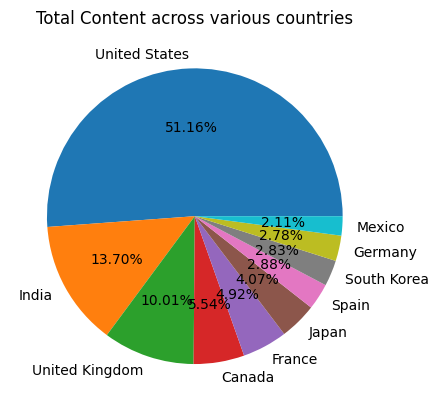

In [ ]:
plt.pie(data_country_val['title'],labels=data_country_val['country'],autopct='%.2f%%')
plt.title('Total Content across various countries')
plt.show()

United States, India and United Kingdom are the top 3 countries whos contents were published.

In [ ]:
data_rating=data_final.groupby(['rating'])['title'].nunique().sort_values(ascending=False).reset_index()
data_rating

rating  title
0            TV-MA   3207
1            TV-14   2160
2            TV-PG    863
3                R    799
4            PG-13    490
5            TV-Y7    334
6             TV-Y    307
7               PG    287
8             TV-G    220
9               NR     80
10               G     41
11  Unknown Rating      7
12        TV-Y7-FV      6
13           NC-17      3
14              UR      3

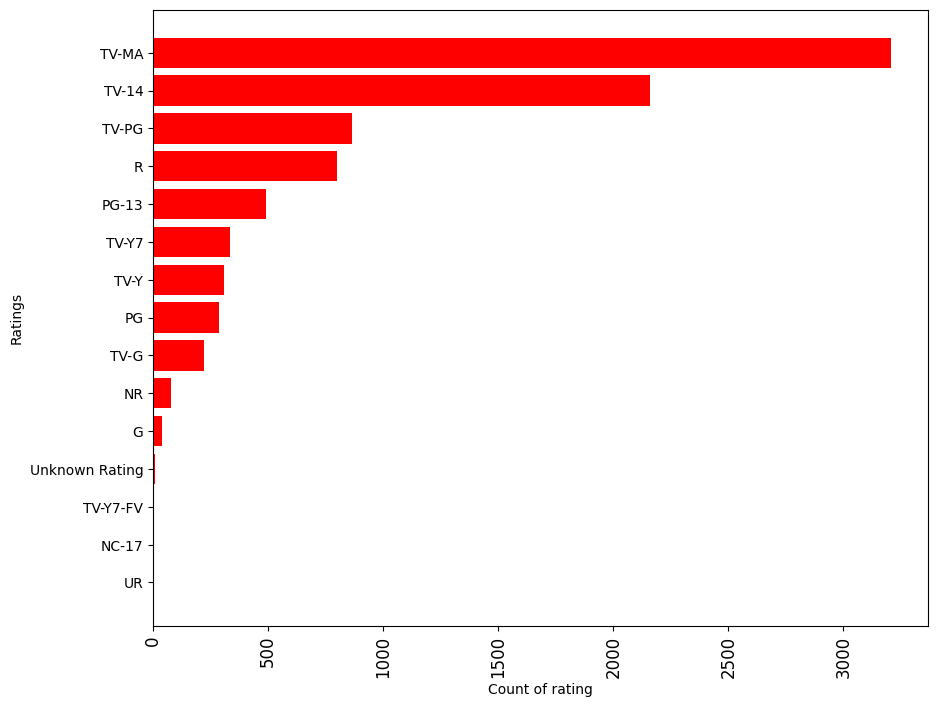

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(data_rating['rating'][::-1], data_rating['title'][::-1],color=['red'])
plt.xlabel('Count of rating')
plt.ylabel('Ratings')
plt.xticks(rotation=90,fontsize=12)
plt.show()

Most of the contents are rated as TV-MA(Mature Audience), TV-14(restricted for age under 14),	TV-PG(Parental Guidance), R(Restricted)

In [ ]:
data_final.head()

title          cast          director        country  \
0  Dick Johnson Is Dead  Unknown Cast   Kirsten Johnson  United States   
1         Blood & Water    Ama Qamata  Unknown Director   South Africa   
2         Blood & Water    Ama Qamata  Unknown Director   South Africa   
3         Blood & Water    Ama Qamata  Unknown Director   South Africa   
4         Blood & Water   Khosi Ngema  Unknown Director   South Africa   

                listed_in show_id     type          date_added  release_year  \
0           Documentaries      s1    Movie  September 25, 2021          2020   
1  International TV Shows      s2  TV Show  September 24, 2021          2021   
2               TV Dramas      s2  TV Show  September 24, 2021          2021   
3            TV Mysteries      s2  TV Show  September 24, 2021          2021   
4  International TV Shows      s2  TV Show  September 24, 2021          2021   

  rating   duration  
0  PG-13     90 min  
1  TV-MA  2 Seasons  
2  TV-MA  2 Seasons  
3  TV-MA  2 Seasons  
4  TV-MA  2 Seasons

In [ ]:
data_final.groupby(['type']).agg({"title":"nunique"})
data_type=data_final.groupby(['type']).agg({"title":"nunique"}).reset_index()
data_type

type  title
0    Movie   6131
1  TV Show   2676

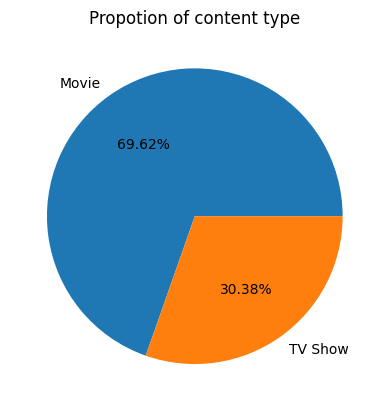

In [ ]:
plt.pie(data_type['title'],
       labels=data_type['type'],
       autopct = '%.2f%%') # label the wedges with their numeric value

plt.title('Propotion of content type')
plt.show()

On the overall content available in the netflix, almost 70% are movies and remaining 30% are shows.

In [ ]:
#number of distinct titles on the basis of Actors
data_cast=data_final.groupby(['cast']).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False).reset_index()[:11]
data_cast

cast  title
0       Unknown Cast    825
1        Anupam Kher     43
2     Shah Rukh Khan     35
3      Julie Tejwani     33
4   Naseeruddin Shah     32
5   Takahiro Sakurai     32
6       Rupa Bhimani     31
7            Om Puri     30
8       Akshay Kumar     30
9          Yuki Kaji     29
10      Paresh Rawal     28

In [ ]:
data_cast=data_cast[data_cast['cast']!='Unknown Cast']
data_cast

cast  title
1        Anupam Kher     43
2     Shah Rukh Khan     35
3      Julie Tejwani     33
4   Naseeruddin Shah     32
5   Takahiro Sakurai     32
6       Rupa Bhimani     31
7            Om Puri     30
8       Akshay Kumar     30
9          Yuki Kaji     29
10      Paresh Rawal     28

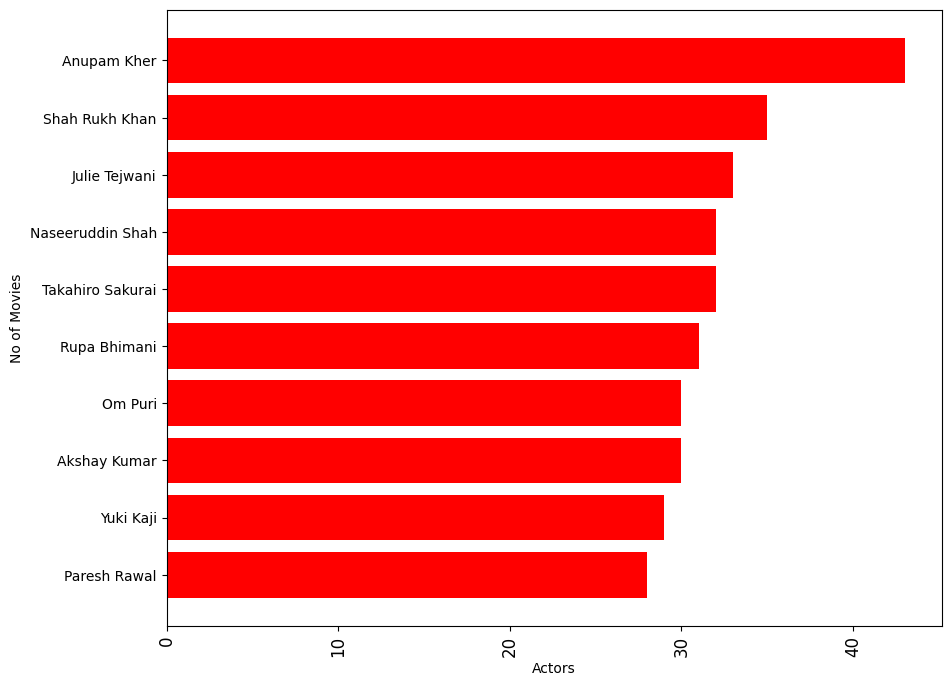

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(data_cast['cast'][::-1], data_cast['title'][::-1],color=['red'])
plt.xlabel('Actors')
plt.ylabel('No of Movies')
plt.xticks(rotation=90,fontsize=12)
plt.show()

The overall top three most popular or most prolific actors are Anupam Kher, Shah Rukh Khan, and Julie Tejwani

In [ ]:
data_dir=data_final.groupby(['director']).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False).reset_index()[:11]
data_dir

director  title
0      Unknown Director   2634
1         Rajiv Chilaka     22
2             Jan Suter     21
3           Raúl Campos     19
4          Marcus Raboy     16
5           Suhas Kadav     16
6             Jay Karas     15
7   Cathy Garcia-Molina     13
8           Jay Chapman     12
9       Martin Scorsese     12
10      Youssef Chahine     12

In [ ]:
data_dir=data_dir[data_dir['director']!='Unknown Director']
data_dir

director  title
1         Rajiv Chilaka     22
2             Jan Suter     21
3           Raúl Campos     19
4          Marcus Raboy     16
5           Suhas Kadav     16
6             Jay Karas     15
7   Cathy Garcia-Molina     13
8           Jay Chapman     12
9       Martin Scorsese     12
10      Youssef Chahine     12

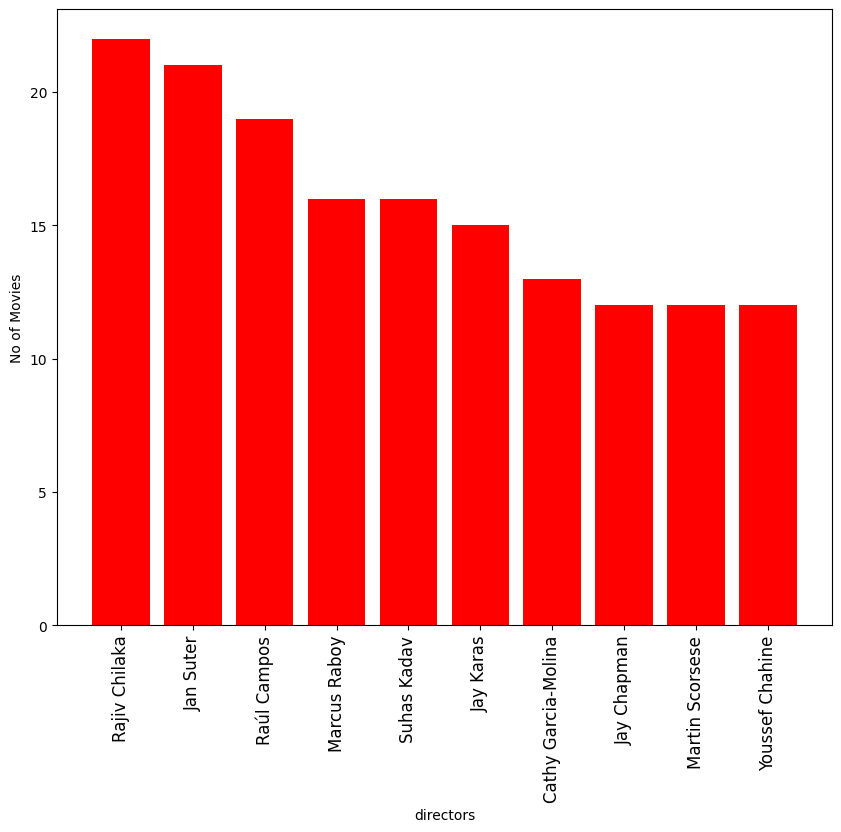

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(data_dir['director'], data_dir['title'],color=['red'])
plt.xlabel('directors')
plt.ylabel('No of Movies')
plt.xticks(rotation=90,fontsize=12)
plt.show()

The overall top three most popular or most prolific actors are Rajiv Chilaka, Jan Suter	, and Raúl Campos

In [ ]:
data_final.head()

title          cast          director        country  \
0  Dick Johnson Is Dead  Unknown Cast   Kirsten Johnson  United States   
1         Blood & Water    Ama Qamata  Unknown Director   South Africa   
2         Blood & Water    Ama Qamata  Unknown Director   South Africa   
3         Blood & Water    Ama Qamata  Unknown Director   South Africa   
4         Blood & Water   Khosi Ngema  Unknown Director   South Africa   

                listed_in show_id     type          date_added  release_year  \
0           Documentaries      s1    Movie  September 25, 2021          2020   
1  International TV Shows      s2  TV Show  September 24, 2021          2021   
2               TV Dramas      s2  TV Show  September 24, 2021          2021   
3            TV Mysteries      s2  TV Show  September 24, 2021          2021   
4  International TV Shows      s2  TV Show  September 24, 2021          2021   

  rating   duration  
0  PG-13     90 min  
1  TV-MA  2 Seasons  
2  TV-MA  2 Seasons  
3  TV-MA  2 Seasons  
4  TV-MA  2 Seasons

In [ ]:
from datetime import datetime
arr=[]
for i in data_final['date_added'].values:
  arr.append(pd.to_datetime(i).strftime('%Y-%m-%d'))
data_final['Content_Added_Date'] =arr

In [ ]:
data_final.head()

title          cast          director        country  \
0  Dick Johnson Is Dead  Unknown Cast   Kirsten Johnson  United States   
1         Blood & Water    Ama Qamata  Unknown Director   South Africa   
2         Blood & Water    Ama Qamata  Unknown Director   South Africa   
3         Blood & Water    Ama Qamata  Unknown Director   South Africa   
4         Blood & Water   Khosi Ngema  Unknown Director   South Africa   

                listed_in show_id     type          date_added  release_year  \
0           Documentaries      s1    Movie  September 25, 2021          2020   
1  International TV Shows      s2  TV Show  September 24, 2021          2021   
2               TV Dramas      s2  TV Show  September 24, 2021          2021   
3            TV Mysteries      s2  TV Show  September 24, 2021          2021   
4  International TV Shows      s2  TV Show  September 24, 2021          2021   

  rating   duration Content_Added_Date  
0  PG-13     90 min         2021-09-25  
1  TV-MA  2 Seasons         2021-09-24  
2  TV-MA  2 Seasons         2021-09-24  
3  TV-MA  2 Seasons         2021-09-24  
4  TV-MA  2 Seasons         2021-09-24

In [ ]:
data_final.dtypes

title                 object
cast                  object
director              object
country               object
listed_in             object
show_id               object
type                  object
date_added            object
release_year           int64
rating                object
duration              object
Content_Added_Date    object
dtype: object

In [ ]:
data_final['Content_Added_Date'] =pd.to_datetime(data_final['Content_Added_Date'])

In [ ]:
data_final.dtypes

title                         object
cast                          object
director                      object
country                       object
listed_in                     object
show_id                       object
type                          object
date_added                    object
release_year                   int64
rating                        object
duration                      object
Content_Added_Date    datetime64[ns]
dtype: object

In [ ]:
data_final['Content_Added_Month']=data_final['Content_Added_Date'].dt.month
data_final['Content_Added_Week']=data_final['Content_Added_Date'].dt.isocalendar().week
data_final['Content_Added_Year']=data_final['Content_Added_Date'].dt.year


In [ ]:
data_final.head()

title          cast          director        country  \
0  Dick Johnson Is Dead  Unknown Cast   Kirsten Johnson  United States   
1         Blood & Water    Ama Qamata  Unknown Director   South Africa   
2         Blood & Water    Ama Qamata  Unknown Director   South Africa   
3         Blood & Water    Ama Qamata  Unknown Director   South Africa   
4         Blood & Water   Khosi Ngema  Unknown Director   South Africa   

                listed_in show_id     type          date_added  release_year  \
0           Documentaries      s1    Movie  September 25, 2021          2020   
1  International TV Shows      s2  TV Show  September 24, 2021          2021   
2               TV Dramas      s2  TV Show  September 24, 2021          2021   
3            TV Mysteries      s2  TV Show  September 24, 2021          2021   
4  International TV Shows      s2  TV Show  September 24, 2021          2021   

  rating   duration Content_Added_Date  Content_Added_Month  \
0  PG-13     90 min         2021-09-25                    9   
1  TV-MA  2 Seasons         2021-09-24                    9   
2  TV-MA  2 Seasons         2021-09-24                    9   
3  TV-MA  2 Seasons         2021-09-24                    9   
4  TV-MA  2 Seasons         2021-09-24                    9   

   Content_Added_Week  Content_Added_Year  
0                  38                2021  
1                  38                2021  
2                  38                2021  
3                  38                2021  
4                  38                2021

In [ ]:
#number of distinct titles on the basis of year
data_year=data_final.groupby(['Content_Added_Year']).agg({"title":"nunique"}).reset_index()
data_year


Content_Added_Year  title
0                 2008      2
1                 2009      2
2                 2010      1
3                 2011     13
4                 2012      3
5                 2013     11
6                 2014     24
7                 2015     82
8                 2016    432
9                 2017   1189
10                2018   1650
11                2019   2018
12                2020   1879
13                2021   1501

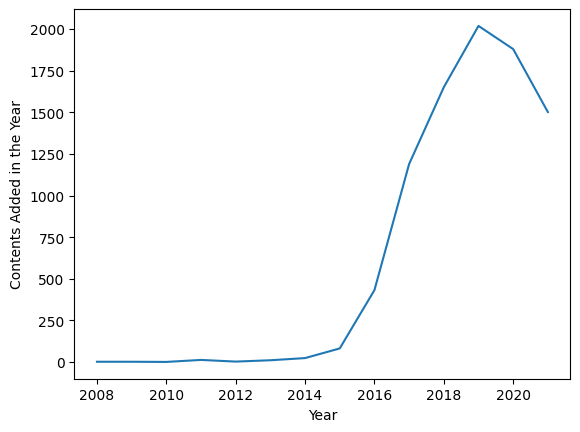

In [ ]:
sns.lineplot(data=data_year, x='Content_Added_Year', y='title')
plt.ylabel("Contents Added in the Year")
plt.xlabel("Year")
plt.show()

The Contents addition had gradual increase until around the year 2019 where it found its peak. After 2019 the content addition has started to decrease.

In [ ]:
data_final.groupby(['Content_Added_Month']).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False).reset_index()

Content_Added_Month  title
0                     7    832
1                    12    813
2                     9    772
3                     4    765
4                    10    760
5                     8    756
6                     3    742
7                     1    738
8                     6    728
9                    11    706
10                    5    632
11                    2    563

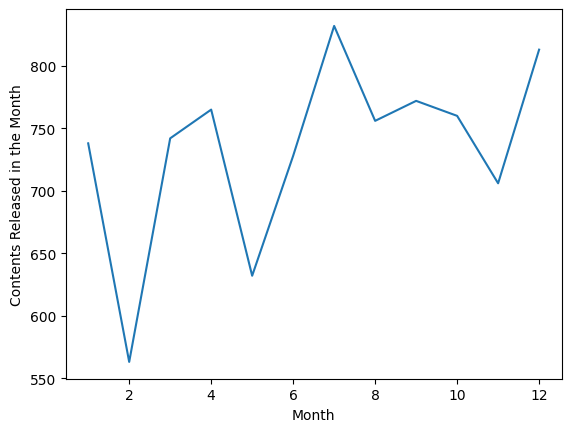

In [ ]:
#number of distinct titles on the basis of year
data_month=data_final.groupby(['Content_Added_Month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_month, x='Content_Added_Month', y='title')
plt.ylabel("Contents Released in the Month")
plt.xlabel("Month")
plt.show()

Most of the contents were added in the seventh, twelfth and ninth months of the year.



In [ ]:
data_final.groupby(['Content_Added_Week']).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False).reset_index()

Content_Added_Week  title
0                    1    372
1                   44    318
2                   40    287
3                   26    271
4                   31    269
5                   35    265
6                    9    254
7                   13    250
8                   27    241
9                   18    234
10                   5    208
11                  22    206
12                  48    200
13                  50    189
14                  37    183
15                  14    173
16                  39    166
17                  24    164
18                  11    163
19                  16    160
20                  30    160
21                  17    154
22                  15    153
23                  33    153
24                  23    151
25                   7    147
26                  34    143
27                  25    143
28                  36    142
29                  29    140
30                  49    140
31                  38    139
32                  51    137
33                  42    135
34                  10    135
35                  46    134
36                  52    132
37                  28    131
38                  20    131
39                  32    122
40                  47    120
41                  21    117
42                  41    116
43                  43    116
44                  19    116
45                   3    113
46                   8    110
47                  12    109
48                   2    108
49                  53    104
50                  45     98
51                   6     97
52                   4     88

In [ ]:
data_final.groupby(['Content_Added_Week']).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False).reset_index()

Content_Added_Week  title
0                    1    372
1                   44    318
2                   40    287
3                   26    271
4                   31    269
5                   35    265
6                    9    254
7                   13    250
8                   27    241
9                   18    234
10                   5    208
11                  22    206
12                  48    200
13                  50    189
14                  37    183
15                  14    173
16                  39    166
17                  24    164
18                  11    163
19                  16    160
20                  30    160
21                  17    154
22                  15    153
23                  33    153
24                  23    151
25                   7    147
26                  34    143
27                  25    143
28                  36    142
29                  29    140
30                  49    140
31                  38    139
32                  51    137
33                  42    135
34                  10    135
35                  46    134
36                  52    132
37                  28    131
38                  20    131
39                  32    122
40                  47    120
41                  21    117
42                  41    116
43                  43    116
44                  19    116
45                   3    113
46                   8    110
47                  12    109
48                   2    108
49                  53    104
50                  45     98
51                   6     97
52                   4     88

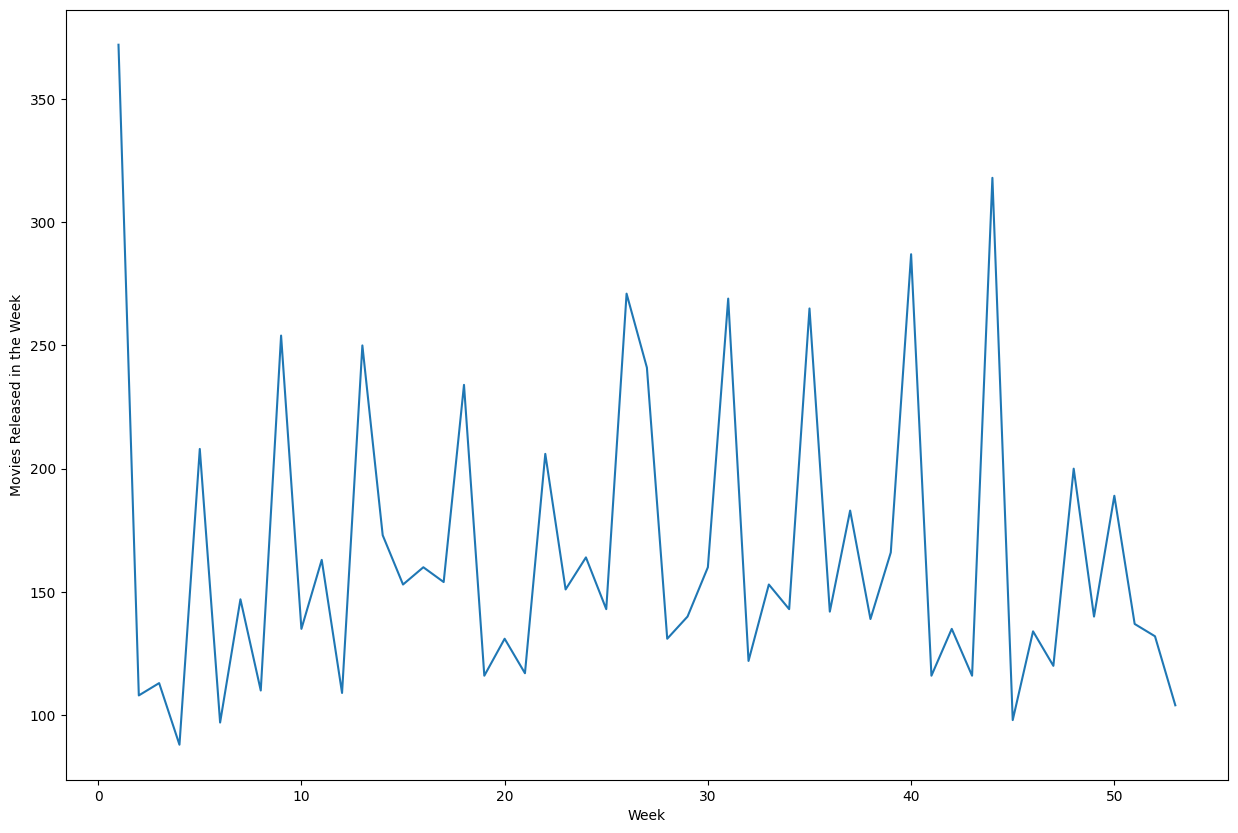

In [ ]:
#number of distinct titles on the basis of year
plt.figure(figsize=(15,10))
data_week=data_final.groupby(['Content_Added_Week']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_week, x='Content_Added_Week', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week")
plt.show()

Most of the contents were added in the 1st and 44th week of the year.

In [ ]:
data_final.groupby(['release_year']).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False).reset_index()

release_year  title
0           2018   1147
1           2017   1032
2           2019   1030
3           2020    953
4           2016    902
5           2021    592
6           2015    560
7           2014    352
8           2013    288
9           2012    237
10          2010    194
11          2011    185
12          2009    152
13          2008    136
14          2006     96
15          2007     88
16          2005     80
17          2004     64
18          2003     61
19          2002     51
20          2001     45
21          1999     39
22          1997     38
23          2000     37
24          1998     36
25          1993     28
26          1995     25
27          1996     24
28          1992     23
29          1990     22
30          1994     22
31          1988     18
32          1982     17
33          1991     17
34          1989     16
35          1981     13
36          1986     13
37          1984     12
38          1980     11
39          1983     11
40          1979     11
41          1985     10
42          1973     10
43          1976      9
44          1987      8
45          1978      7
46          1977      7
47          1975      7
48          1974      7
49          1967      5
50          1972      5
51          1971      5
52          1945      4
53          1960      4
54          1968      3
55          1944      3
56          1958      3
57          1955      3
58          1962      3
59          1943      3
60          1946      2
61          1954      2
62          1956      2
63          1964      2
64          1963      2
65          1942      2
66          1965      2
67          1969      2
68          1970      2
69          1959      1
70          1961      1
71          1947      1
72          1966      1
73          1925      1

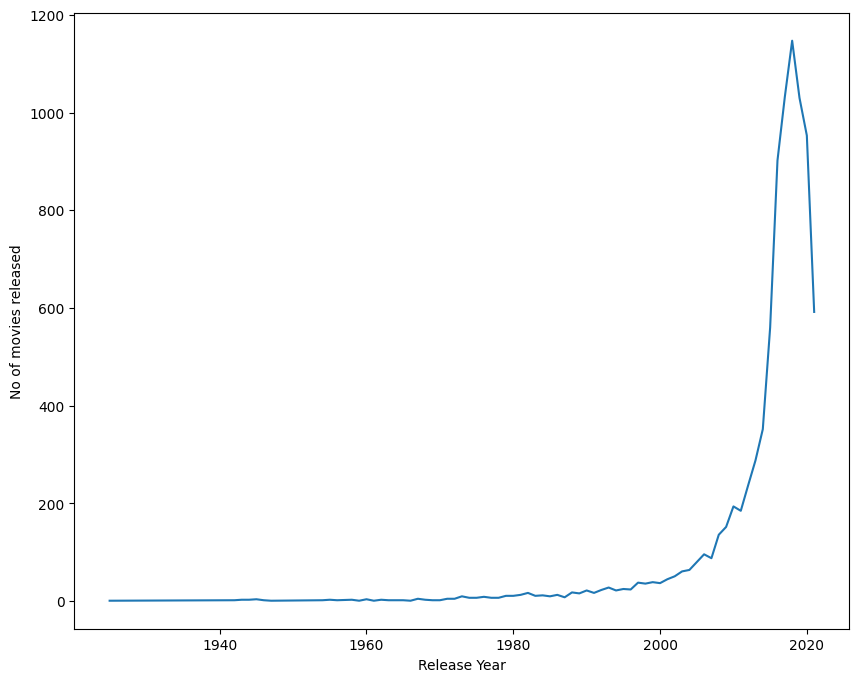

In [ ]:
#number of distinct titles on the basis of year
plt.figure(figsize=(10,8))
data_release_year=data_final.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("No of movies released")
plt.xlabel("Release Year")
plt.show()

Most of the movies were released in the year 2018 followed by 2017 &2019.

There has been decline in the recently released movies available in the platform, this may be due to the reason the content were bit added yet.

In [ ]:
data_final.head()

title          cast          director        country  \
0  Dick Johnson Is Dead  Unknown Cast   Kirsten Johnson  United States   
1         Blood & Water    Ama Qamata  Unknown Director   South Africa   
2         Blood & Water    Ama Qamata  Unknown Director   South Africa   
3         Blood & Water    Ama Qamata  Unknown Director   South Africa   
4         Blood & Water   Khosi Ngema  Unknown Director   South Africa   

                listed_in show_id     type          date_added  release_year  \
0           Documentaries      s1    Movie  September 25, 2021          2020   
1  International TV Shows      s2  TV Show  September 24, 2021          2021   
2               TV Dramas      s2  TV Show  September 24, 2021          2021   
3            TV Mysteries      s2  TV Show  September 24, 2021          2021   
4  International TV Shows      s2  TV Show  September 24, 2021          2021   

  rating   duration Content_Added_Date  Content_Added_Month  \
0  PG-13     90 min         2021-09-25                    9   
1  TV-MA  2 Seasons         2021-09-24                    9   
2  TV-MA  2 Seasons         2021-09-24                    9   
3  TV-MA  2 Seasons         2021-09-24                    9   
4  TV-MA  2 Seasons         2021-09-24                    9   

   Content_Added_Week  Content_Added_Year  
0                  38                2021  
1                  38                2021  
2                  38                2021  
3                  38                2021  
4                  38                2021

#Seperate Analysis Based on Movies/TV Shows


In [ ]:
data_show=data_final[data_final['type']=='TV Show']
data_movies=data_final[data_final['type']=='Movie']

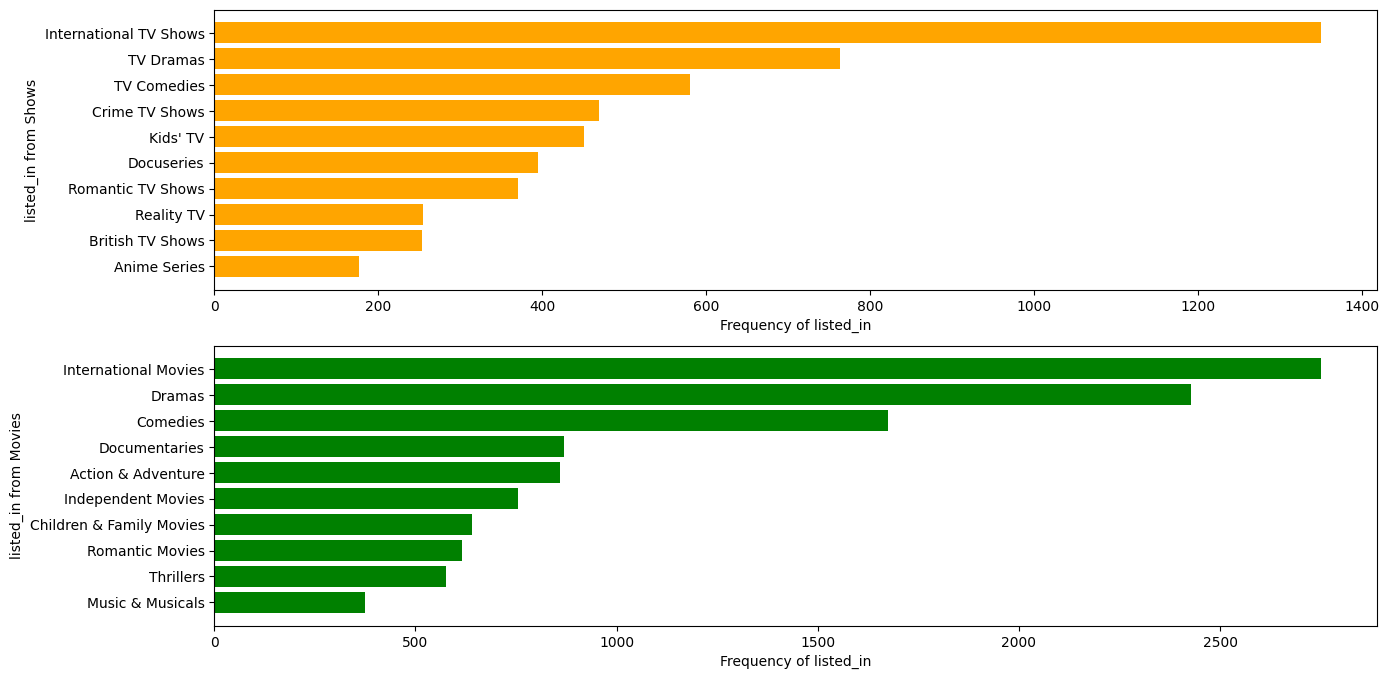

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_listed_in=data_show.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_listed_in[::-1]['listed_in'], data_listed_in[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of listed_in')
plt.ylabel('listed_in from Shows')


plt.subplot(2,1,2)
data_listed_in=data_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_listed_in[::-1]['listed_in'], data_listed_in[::-1]['title'],color=['Green'])
plt.xlabel('Frequency of listed_in')
plt.ylabel('listed_in from Movies')
plt.show()



On the overall International Movies/TV Shows, Dramas , Comedies are the Top 3 contents from Movies and TV Show commonly.

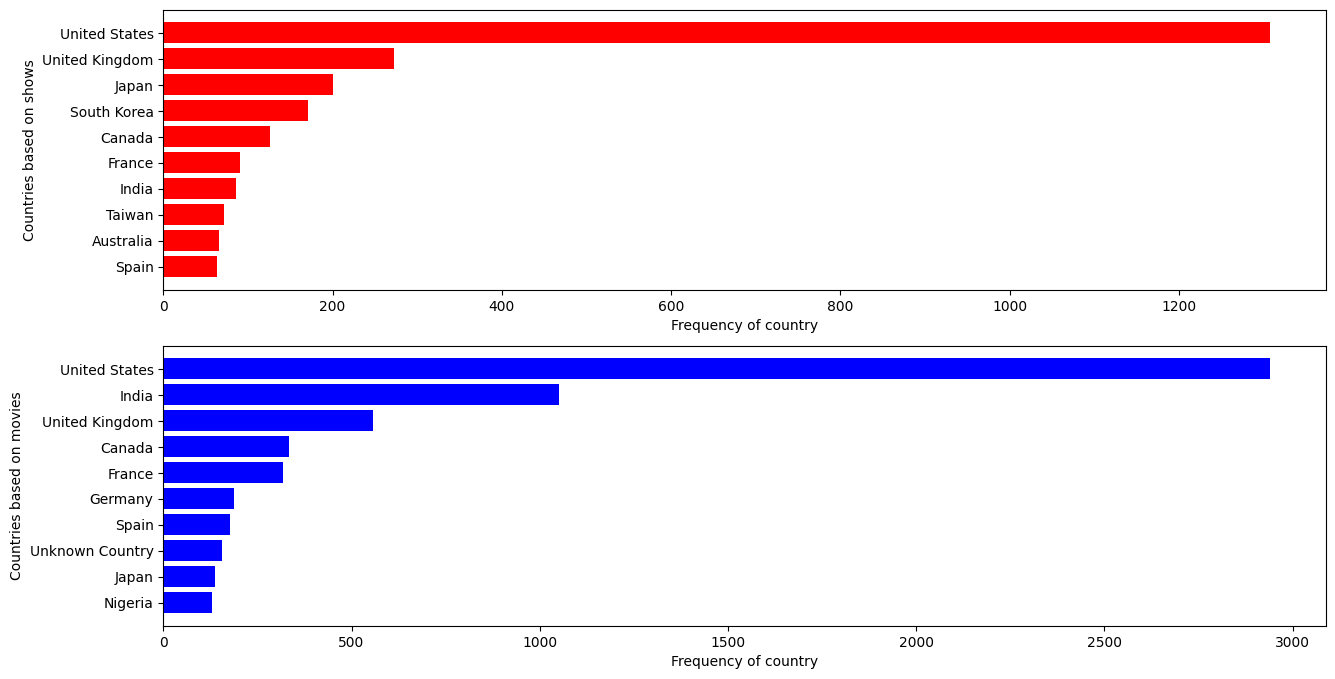

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_country=data_show.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_country[::-1]['country'], data_country[::-1]['title'],color=['Red'])
plt.xlabel('Frequency of country')
plt.ylabel('Countries based on shows')


plt.subplot(2,1,2)
data_country=data_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_country[::-1]['country'], data_country[::-1]['title'],color=['Blue'])
plt.xlabel('Frequency of country')
plt.ylabel('Countries based on movies')
plt.show()


Top 3 Countries based on content type shows are United States, United Kingdom and Japan.

Top 3 Countries based on content type movies are United States, India and. United Kingdom.


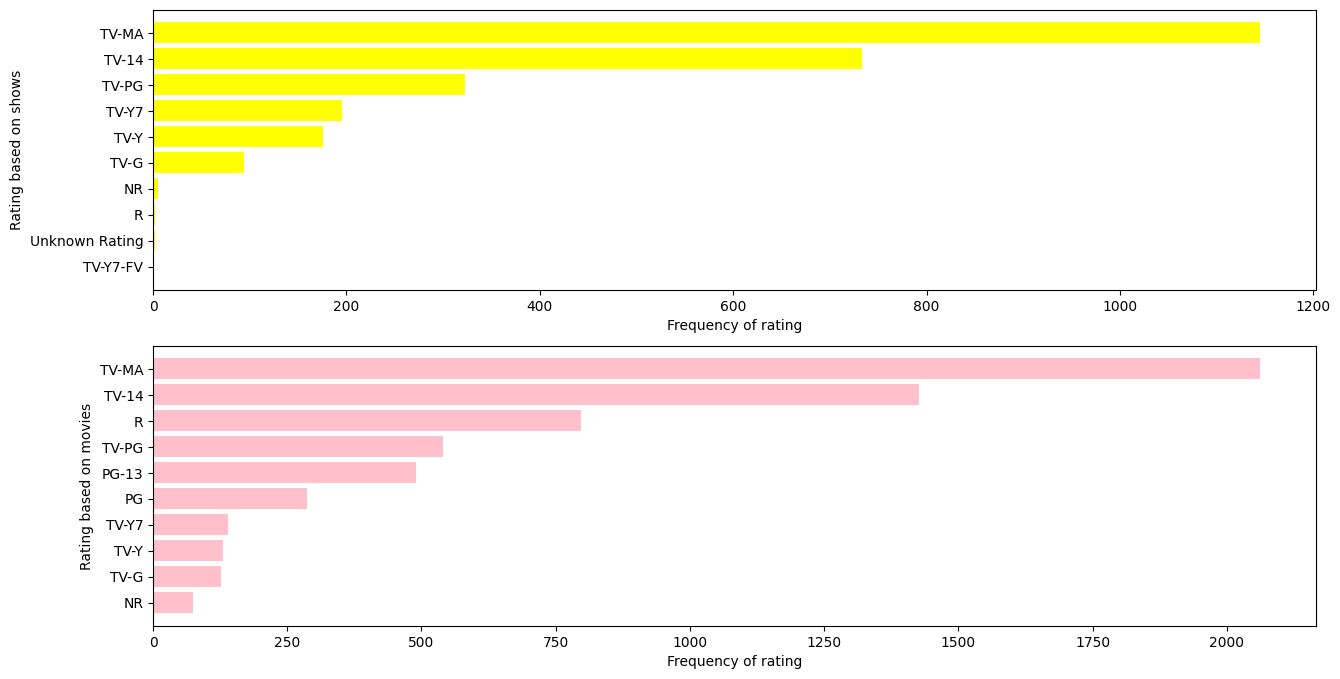

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_rating=data_show.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['rating'], data_rating[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of rating')
plt.ylabel('Rating based on shows')


plt.subplot(2,1,2)
data_rating=data_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['rating'], data_rating[::-1]['title'],color=['pink'])
plt.xlabel('Frequency of rating')
plt.ylabel('Rating based on movies')
plt.show()


Most of the Shows were rated as TV-MA, TV-14, TV-PG

Most of the Movies were rated as TV-MA, TV-14, R

In [ ]:
import matplotlib.cm as cm

# Get the default colormap
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [ ]:
data_min_movies=data_min[data_min['type']=='Movie']

<ipython-input-110-e88fb1648575>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_duration=data_min_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


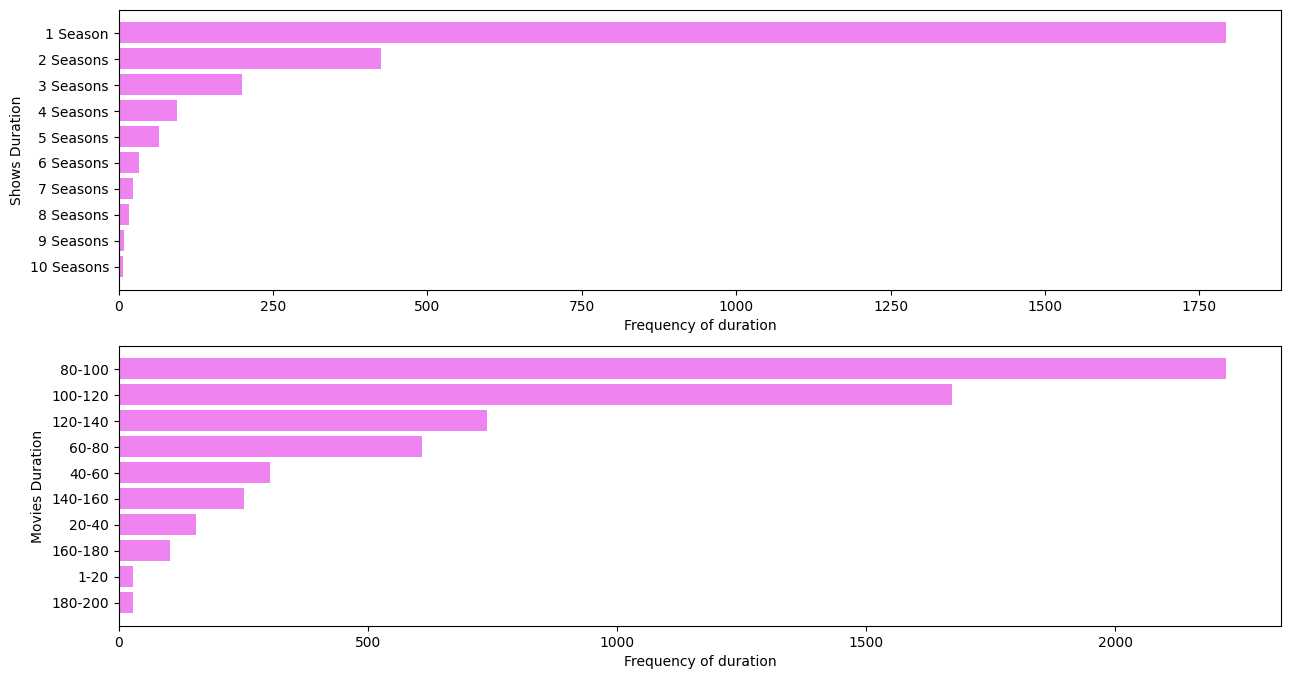

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_duration=data_show.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_duration[::-1]['duration'], data_duration[::-1]['title'],color=['violet'])
plt.xlabel('Frequency of duration')
plt.ylabel('Shows Duration')


plt.subplot(2,1,2)
data_duration=data_min_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_duration[::-1]['duration'], data_duration[::-1]['title'],color=['violet'])
plt.xlabel('Frequency of duration')
plt.ylabel('Movies Duration')
plt.show()

Most of the Show contents are 1 Season duration.

Most of the Movies contents are 80-100 & 100-120 duration.


In [ ]:
data_show.head()

title         cast          director       country  \
1  Blood & Water   Ama Qamata  Unknown Director  South Africa   
2  Blood & Water   Ama Qamata  Unknown Director  South Africa   
3  Blood & Water   Ama Qamata  Unknown Director  South Africa   
4  Blood & Water  Khosi Ngema  Unknown Director  South Africa   
5  Blood & Water  Khosi Ngema  Unknown Director  South Africa   

                listed_in show_id     type          date_added  release_year  \
1  International TV Shows      s2  TV Show  September 24, 2021          2021   
2               TV Dramas      s2  TV Show  September 24, 2021          2021   
3            TV Mysteries      s2  TV Show  September 24, 2021          2021   
4  International TV Shows      s2  TV Show  September 24, 2021          2021   
5               TV Dramas      s2  TV Show  September 24, 2021          2021   

  rating   duration Content_Added_Date  Content_Added_Month  \
1  TV-MA  2 Seasons         2021-09-24                    9   
2  TV-MA  2 Seasons         2021-09-24                    9   
3  TV-MA  2 Seasons         2021-09-24                    9   
4  TV-MA  2 Seasons         2021-09-24                    9   
5  TV-MA  2 Seasons         2021-09-24                    9   

   Content_Added_Week  Content_Added_Year  
1                  38                2021  
2                  38                2021  
3                  38                2021  
4                  38                2021  
5                  38                2021

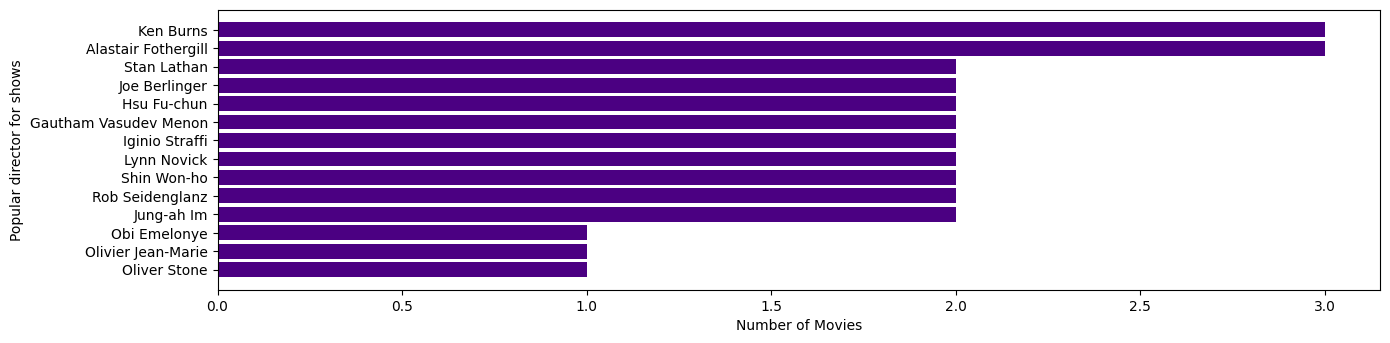

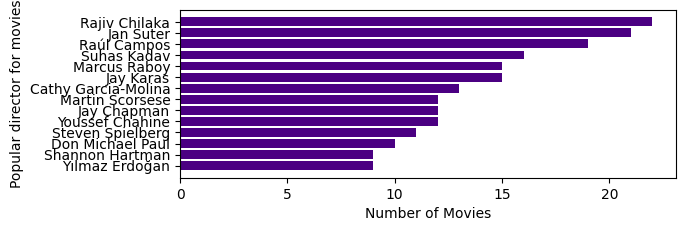

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_dir=data_show.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_dir=data_dir[data_dir['director']!='Unknown Director']
plt.barh(data_dir[::-1]['director'], data_dir[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular director for shows')
plt.show()


plt.subplot(2,1,2)
data_dir=data_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_dir=data_dir[data_dir['director']!='Unknown Director']
plt.barh(data_dir[::-1]['director'], data_dir[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular director for movies')
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix.


Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies on Netflix.

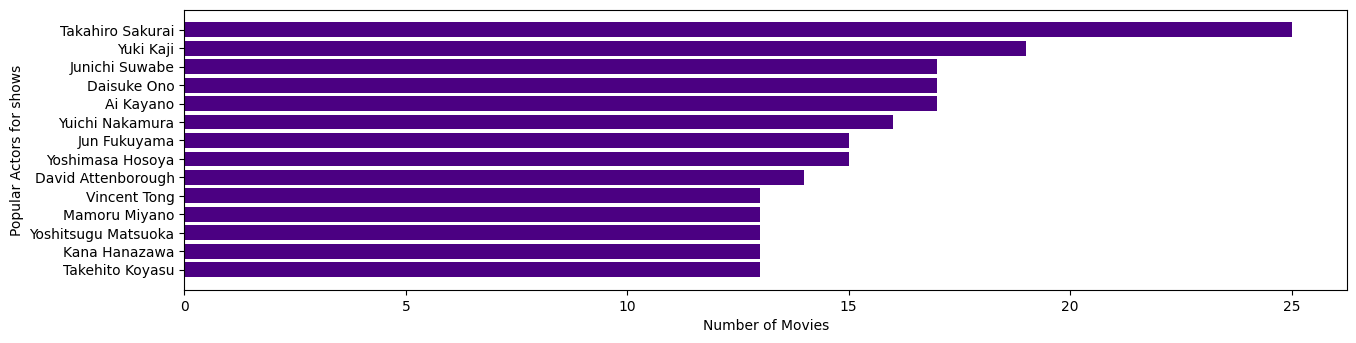

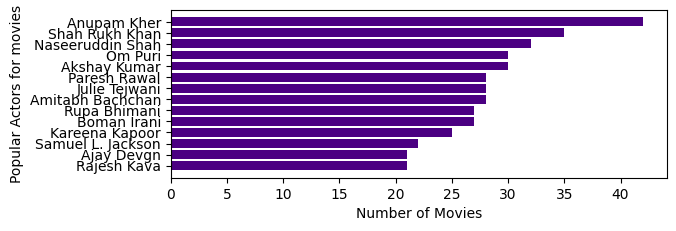

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_cast=data_show.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['cast']!='Unknown Cast']
plt.barh(data_cast[::-1]['cast'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors for shows')
plt.show()


plt.subplot(2,1,2)
data_cast=data_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['cast']!='Unknown Cast']
plt.barh(data_cast[::-1]['cast'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors for movies')
plt.show()

akahiro Sakurai,Yuki Kaji and Junichi Suwabe actors are the most popular actors across TV Shows

Anupam Kher, Shah Rukh Khan, Om Puri are the most popular actors across movies.

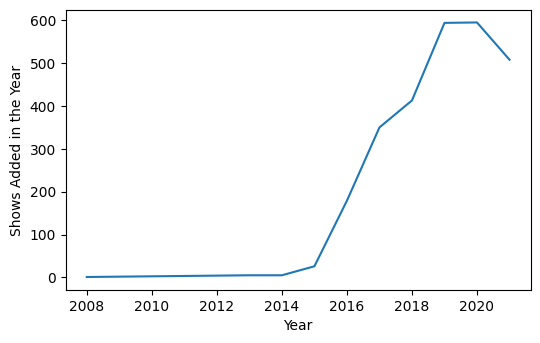

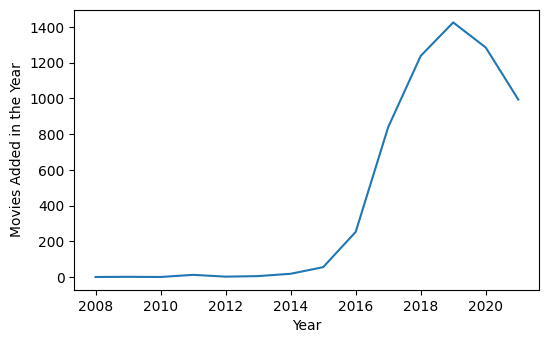

In [ ]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
data_year=data_show.groupby(['Content_Added_Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_year, x='Content_Added_Year', y='title')
plt.ylabel("Shows Added in the Year")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_year=data_movies.groupby(['Content_Added_Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_year, x='Content_Added_Year', y='title')
plt.ylabel("Movies Added in the Year")
plt.xlabel("Year")
plt.show()


The Tv Show content on netflix was increasing until 2019, after which it started to decline for the recent years.

The Movies content on netflix was increasing until 2019 and constant for 2 years till 2021, after which it started to decline for the recent years.

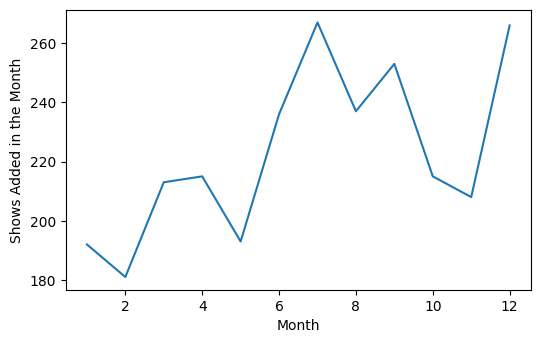

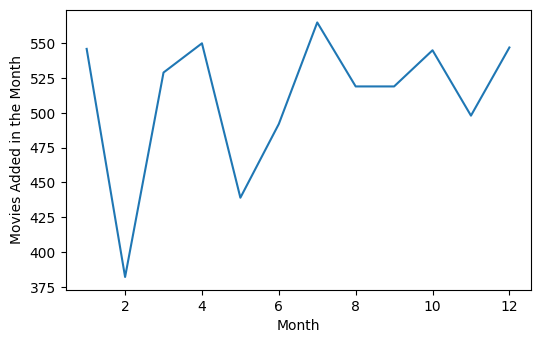

In [ ]:
#number of distinct titles on the basis of year
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_month=data_show.groupby(['Content_Added_Month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_month, x='Content_Added_Month', y='title')
plt.ylabel("Shows Added in the Month")
plt.xlabel("Month")
plt.show()


plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_month=data_movies.groupby(['Content_Added_Month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_month, x='Content_Added_Month', y='title')
plt.ylabel("Movies Added in the Month")
plt.xlabel("Month")
plt.show()

Tv Show content in netflix were mostly addded in the mid and last months of the year i.e July & December

Movies content in netflix were mostly addded in the first,last and mid months of the year i.e January, December & July

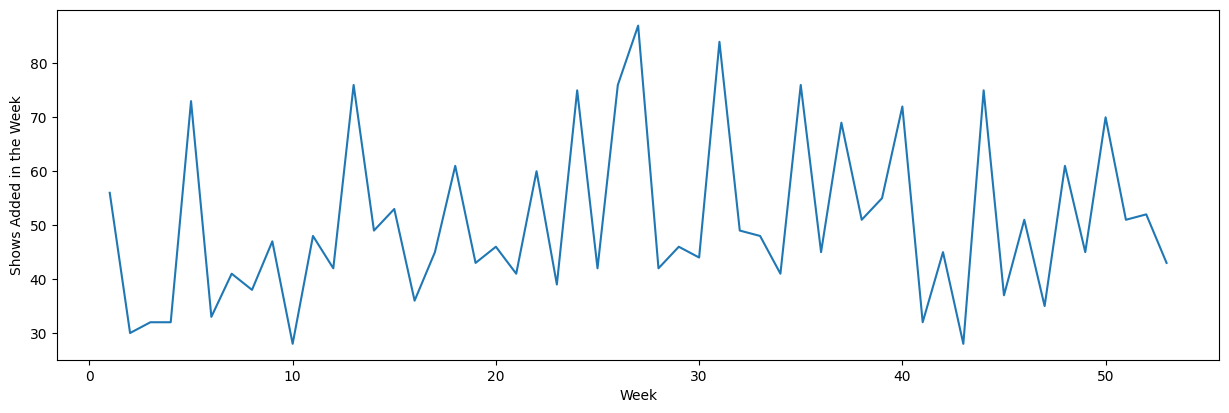

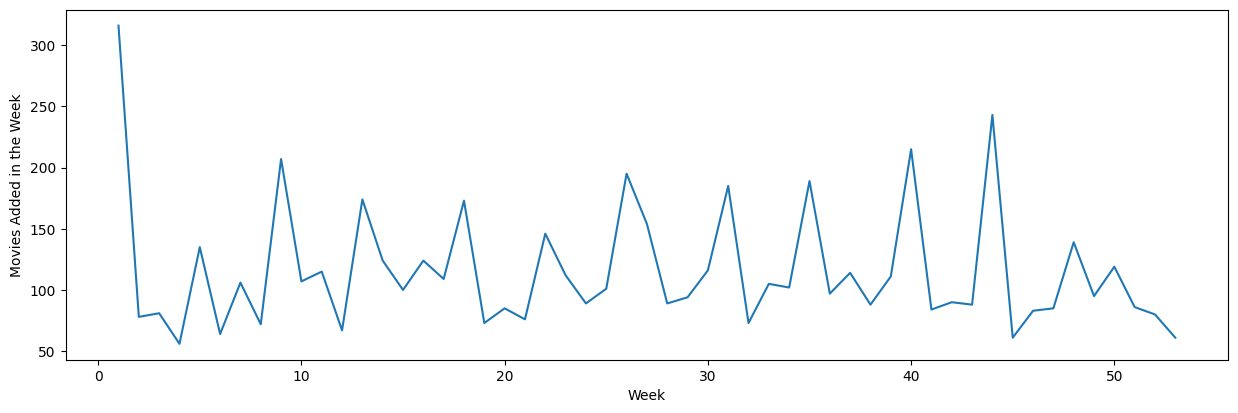

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
data_week=data_show.groupby(['Content_Added_Week']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_week, x='Content_Added_Week', y='title')
plt.ylabel("Shows Added in the Week")
plt.xlabel("Week")
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
data_week=data_movies.groupby(['Content_Added_Week']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_week, x='Content_Added_Week', y='title')
plt.ylabel("Movies Added in the Week")
plt.xlabel("Week")
plt.show()

Most of the Tv Shows were added between the 26-32 week of the year

Most of the Movies were added between the first week and 44th week of the year

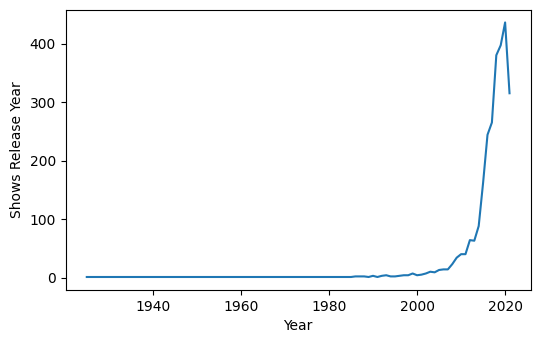

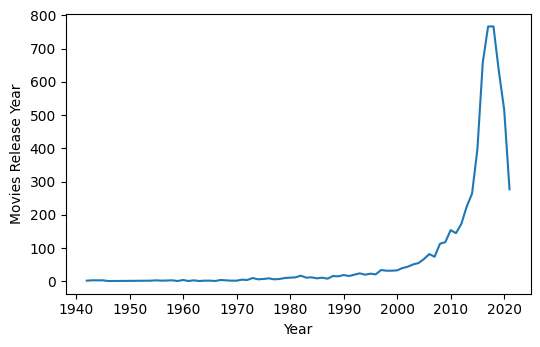

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_release_year=data_show.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Shows Release Year")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_release_year=data_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Movies Release Year")
plt.xlabel("Year")
plt.show()

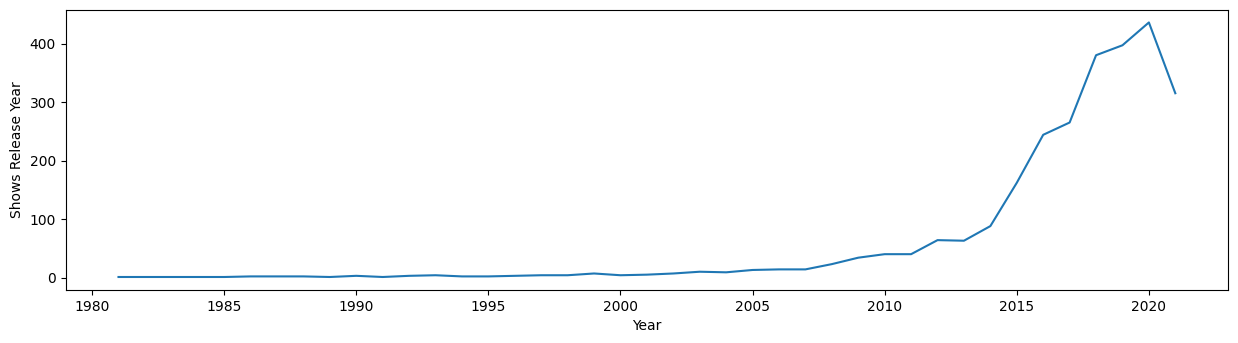

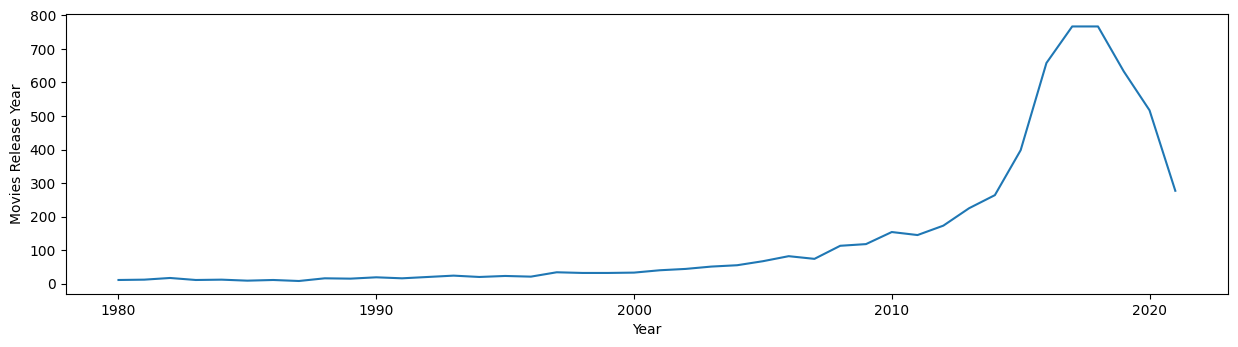

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
data_release_year=data_show[data_show['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Shows Release Year")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
data_release_year=data_movies[data_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Movies Release Year")
plt.xlabel("Year")
plt.show()

Most of the TV shows actual released year were 2019

Most of the Movies actual released year were between 2017-2018

In [ ]:
data_final.head()

title          cast          director        country  \
0  Dick Johnson Is Dead  Unknown Cast   Kirsten Johnson  United States   
1         Blood & Water    Ama Qamata  Unknown Director   South Africa   
2         Blood & Water    Ama Qamata  Unknown Director   South Africa   
3         Blood & Water    Ama Qamata  Unknown Director   South Africa   
4         Blood & Water   Khosi Ngema  Unknown Director   South Africa   

                listed_in show_id     type          date_added  release_year  \
0           Documentaries      s1    Movie  September 25, 2021          2020   
1  International TV Shows      s2  TV Show  September 24, 2021          2021   
2               TV Dramas      s2  TV Show  September 24, 2021          2021   
3            TV Mysteries      s2  TV Show  September 24, 2021          2021   
4  International TV Shows      s2  TV Show  September 24, 2021          2021   

  rating   duration Content_Added_Date  Content_Added_Month  \
0  PG-13     90 min         2021-09-25                    9   
1  TV-MA  2 Seasons         2021-09-24                    9   
2  TV-MA  2 Seasons         2021-09-24                    9   
3  TV-MA  2 Seasons         2021-09-24                    9   
4  TV-MA  2 Seasons         2021-09-24                    9   

   Content_Added_Week  Content_Added_Year  
0                  38                2021  
1                  38                2021  
2                  38                2021  
3                  38                2021  
4                  38                2021

# Country-Wise Analysis

##USA

In [ ]:
data_usa_shows=data_final[(data_final['country']=='United States') & (data_final['type']=='TV Show')]
data_usa_shows.nunique()

title                  1308
cast                   6854
director                108
country                   1
listed_in                22
show_id                1308
type                      1
date_added              720
release_year             41
rating                    8
duration                 15
Content_Added_Date      704
Content_Added_Month      12
Content_Added_Week       53
Content_Added_Year       10
dtype: int64

In [ ]:
data_usa_movies=data_final[(data_final['country']=='United States') & (data_final['type']=='Movie')]
data_usa_movies.nunique()

title                   2941
cast                   11964
director                2347
country                    1
listed_in                 20
show_id                 2941
type                       1
date_added              1168
release_year              69
rating                    15
duration                 174
Content_Added_Date      1168
Content_Added_Month       12
Content_Added_Week        53
Content_Added_Year        14
dtype: int64

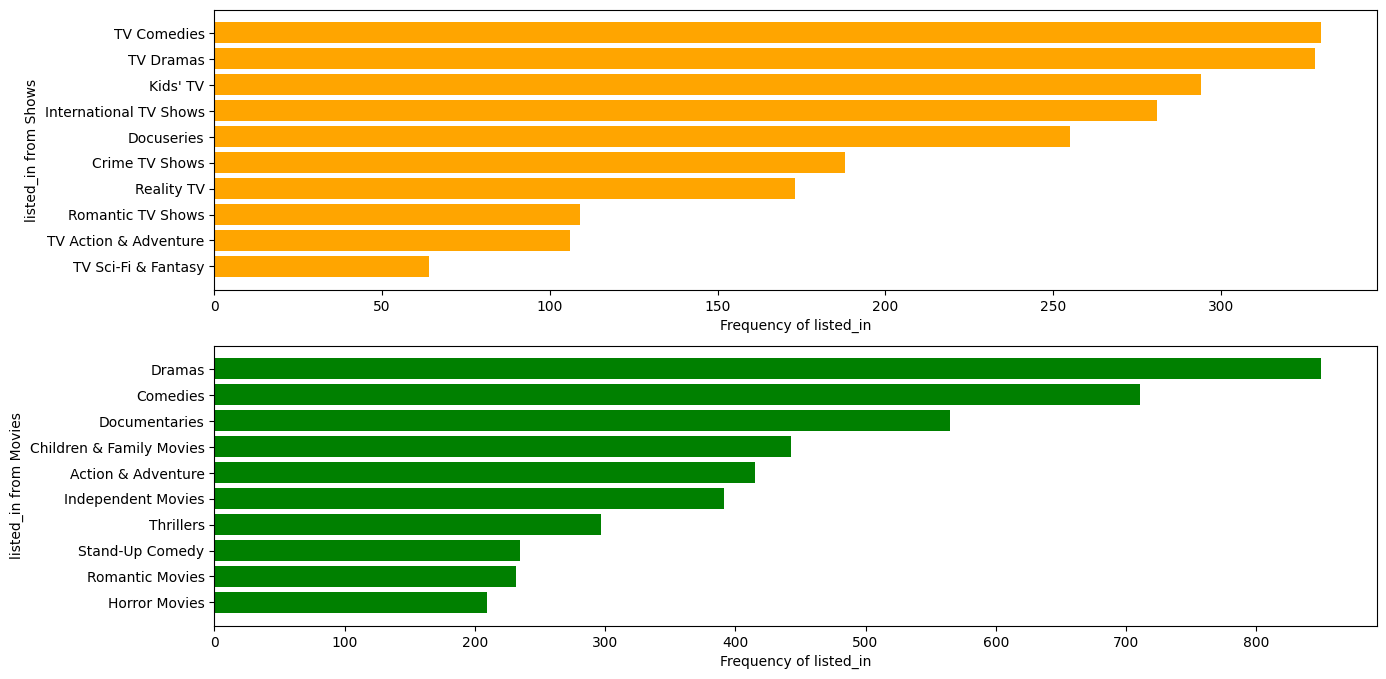

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_listed_in=data_usa_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_listed_in[::-1]['listed_in'], data_listed_in[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of listed_in')
plt.ylabel('listed_in from Shows')


plt.subplot(2,1,2)
data_listed_in=data_usa_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_listed_in[::-1]['listed_in'], data_listed_in[::-1]['title'],color=['Green'])
plt.xlabel('Frequency of listed_in')
plt.ylabel('listed_in from Movies')
plt.show()


Dramas,Comedy, Kids 'TV Shows, International TV Shows and Docuseries, Genres in TV Series are popular in USA

Dramas,Comedy, Documentaries, Family Movies and Action Genres in Movies are popular in USA

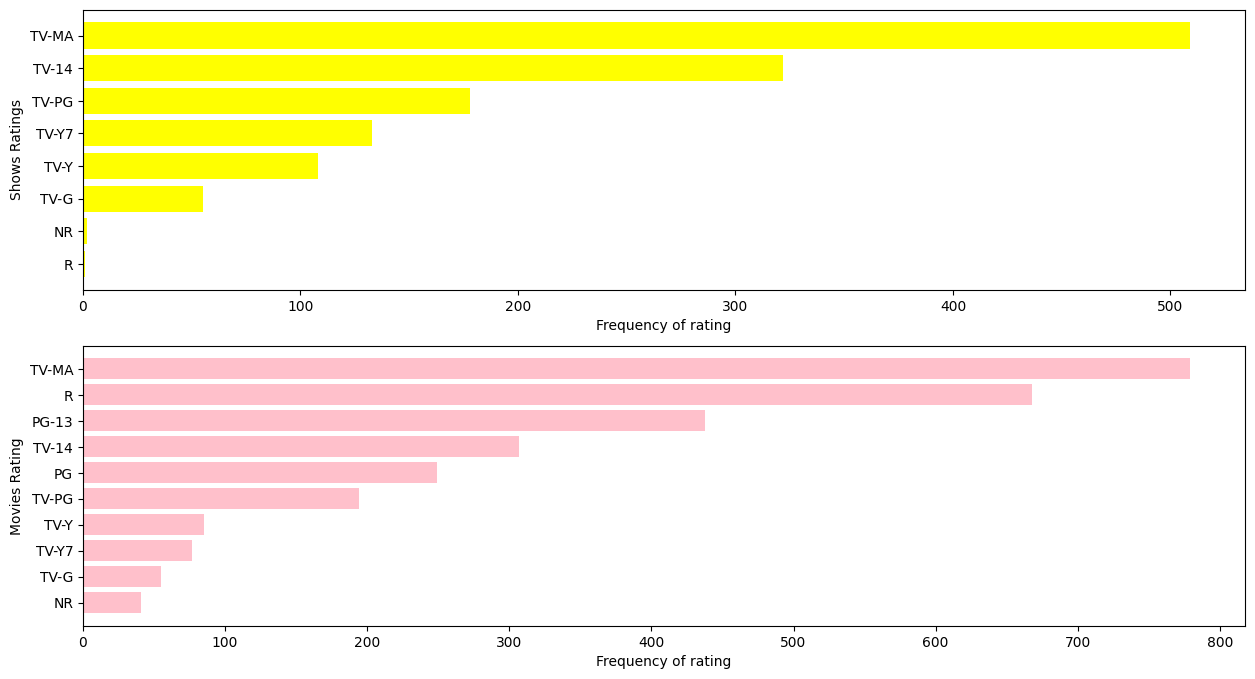

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_rating=data_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['rating'], data_rating[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of rating')
plt.ylabel('Shows Ratings')


plt.subplot(2,1,2)
data_rating=data_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['rating'], data_rating[::-1]['title'],color=['pink'])
plt.xlabel('Frequency of rating')
plt.ylabel('Movies Rating')
plt.show()

In USA, TV Show ratings were TV-MA, TV-14, TV-PG and TV-Y7. Movies were TV-MA, R, PG-13 and TV-14

In [ ]:
data_min_usa_movies=data_min[(data_final['country']=='United States')]
data_min_usa_movies['country'] = data_min_usa_movies['country'].str.replace(',', '')
data_min_usa_movies['country'].value_counts()

<ipython-input-124-0da6da5f2fce>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_min_usa_movies=data_min[(data_final['country']=='United States')]
<ipython-input-124-0da6da5f2fce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_min_usa_movies['country'] = data_min_usa_movies['country'].str.replace(',', '')


country
United States    46928
Name: count, dtype: int64

<ipython-input-125-dc110c738696>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_rating=data_min_usa_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


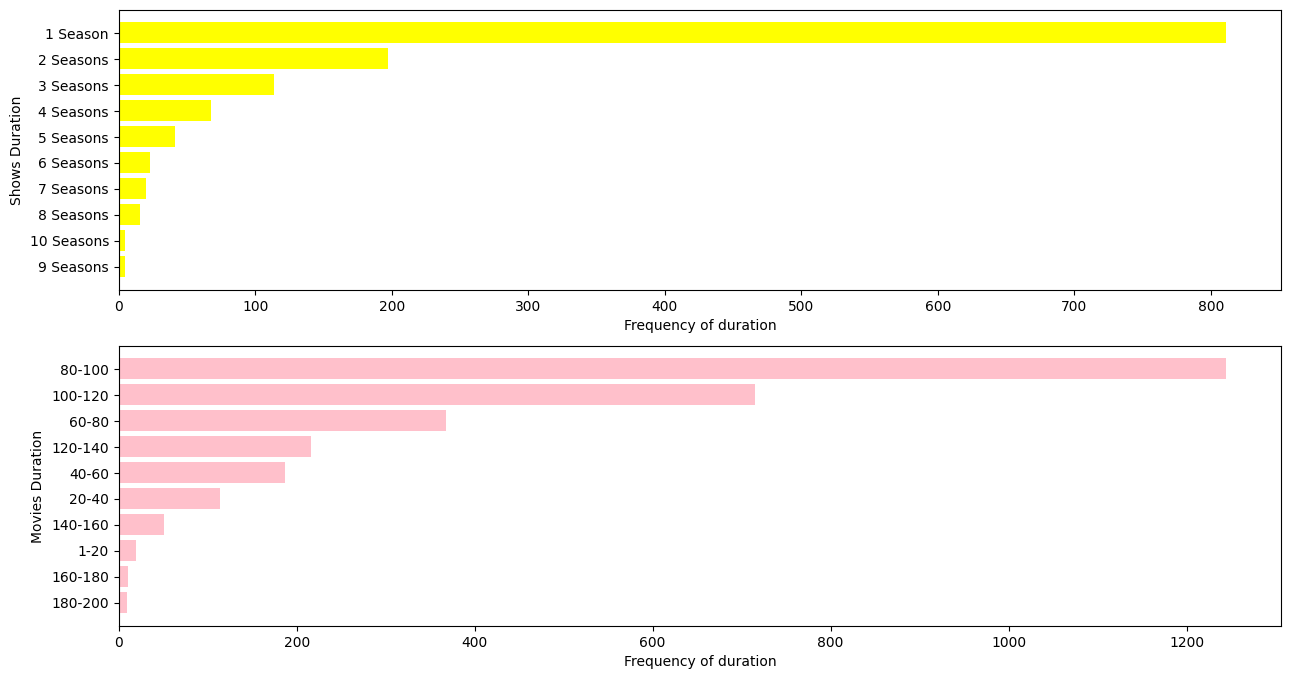

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_rating=data_usa_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['duration'], data_rating[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of duration')
plt.ylabel('Shows Duration')


plt.subplot(2,1,2)
data_rating=data_min_usa_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['duration'], data_rating[::-1]['title'],color=['pink'])
plt.xlabel('Frequency of duration')
plt.ylabel('Movies Duration')
plt.show()

Across movies 80-100,100-120 is the ranges of minutes for which most movies lie.

Across Tv Shows 1 Season shows were dominated followed by 2 season shows.

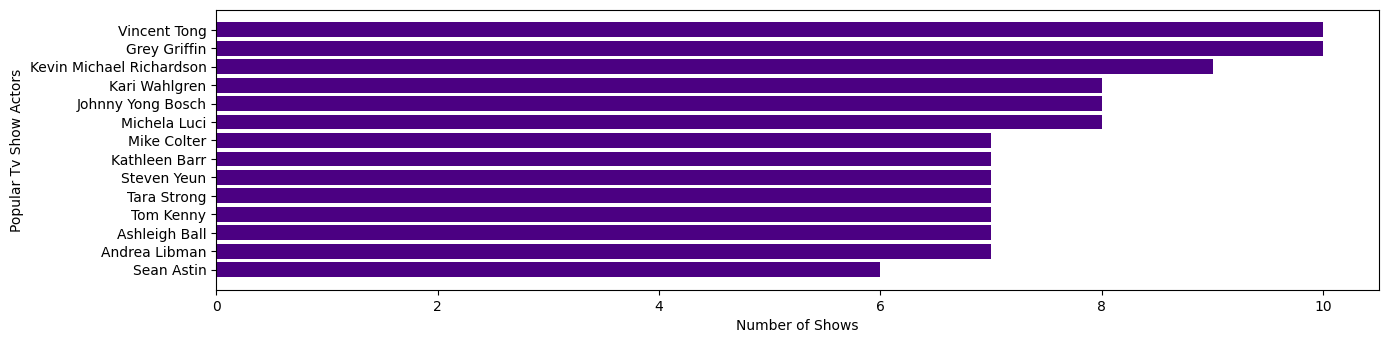

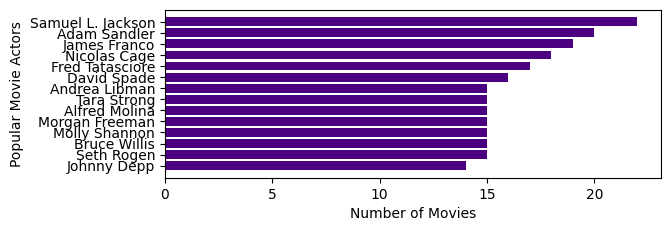

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_cast=data_usa_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['cast']!='Unknown Cast']
plt.barh(data_cast[::-1]['cast'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Tv Show Actors')
plt.show()


plt.subplot(2,1,2)
data_cast=data_usa_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['cast']!='Unknown Cast']
plt.barh(data_cast[::-1]['cast'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Movie Actors')
plt.show()

Vincent Tong, Grey Griffin and Kevin Michael Richardson are the popular actors across TV Shows in USA.

Samuel Jackson, Adam Sandler and James Franco are the popular actors across movies on Netflix in USA.

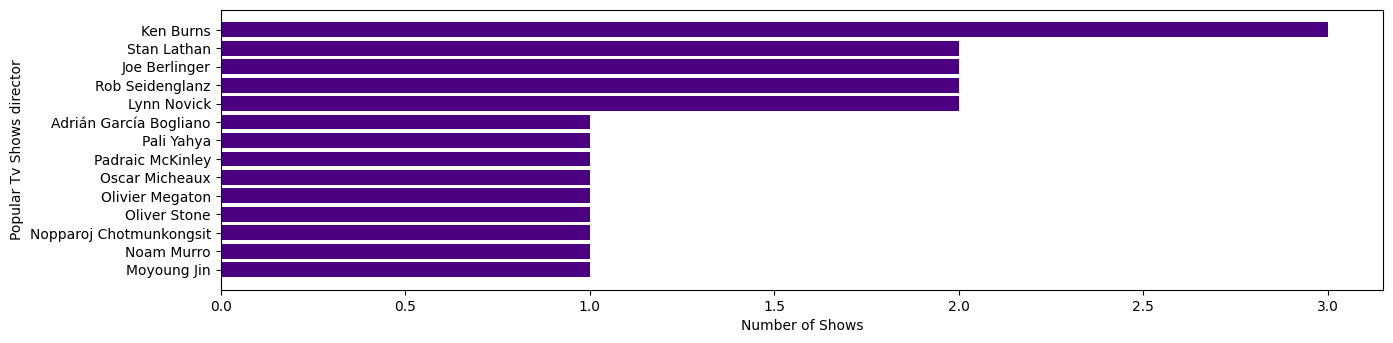

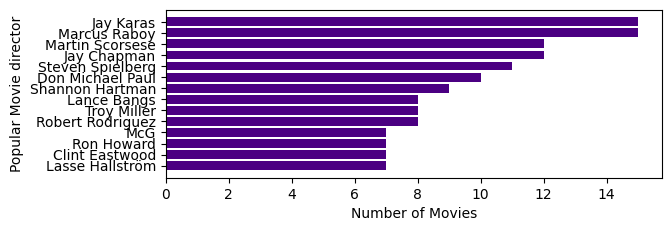

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_cast=data_usa_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['director']!='Unknown Director']
plt.barh(data_cast[::-1]['director'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Tv Shows director')
plt.show()


plt.subplot(2,1,2)
data_cast=data_usa_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['director']!='Unknown Director']
plt.barh(data_cast[::-1]['director'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Movie director')
plt.show()

Ken Burns,Stan Lathan, Joe Barlinger, Rob Seidenglanz and Lynn Novick are the popular directors across TV Shows on Netflix in USA.

Jay Karas,Marcus Raboy,Martin Scorcese and Jay Chapman are the popular directors across movies on Netflix in USA

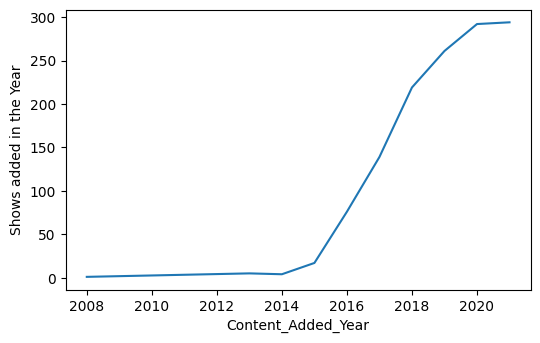

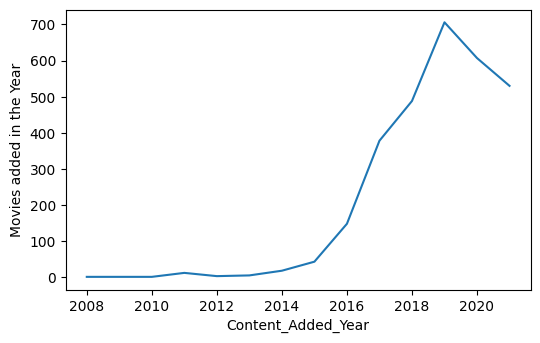

In [ ]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
data_year=data_usa_shows.groupby(['Content_Added_Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_year, x='Content_Added_Year', y='title')
plt.ylabel("Shows added in the Year")
plt.xlabel("Content_Added_Year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_year=data_usa_movies.groupby(['Content_Added_Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_year, x='Content_Added_Year', y='title')
plt.ylabel("Movies added in the Year")
plt.xlabel("Content_Added_Year")
plt.show()

In USA, Tv shows addition remains constant for the recent years.

In USA, Movies addition in USA started to decline after 2019.

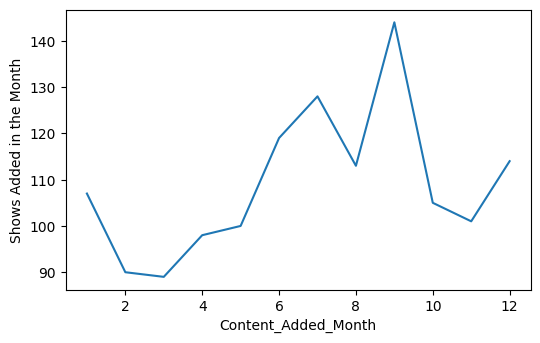

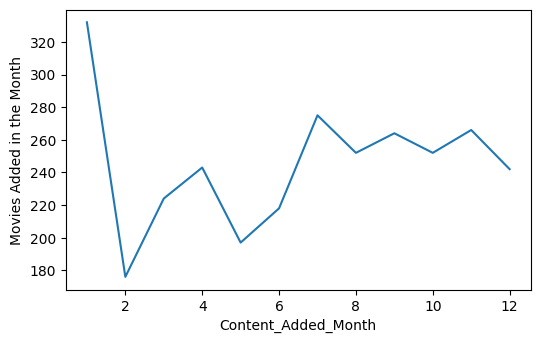

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_month=data_usa_shows.groupby(['Content_Added_Month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_month, x='Content_Added_Month', y='title')
plt.ylabel("Shows Added in the Month")
plt.xlabel("Content_Added_Month")
plt.show()


plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_month=data_usa_movies.groupby(['Content_Added_Month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_month, x='Content_Added_Month', y='title')
plt.ylabel("Movies Added in the Month")
plt.xlabel("Content_Added_Month")
plt.show()

In USA, Tv shows were added mostly on September and July months of the year

In USA, Movies were added mostly on January and July months of the year.

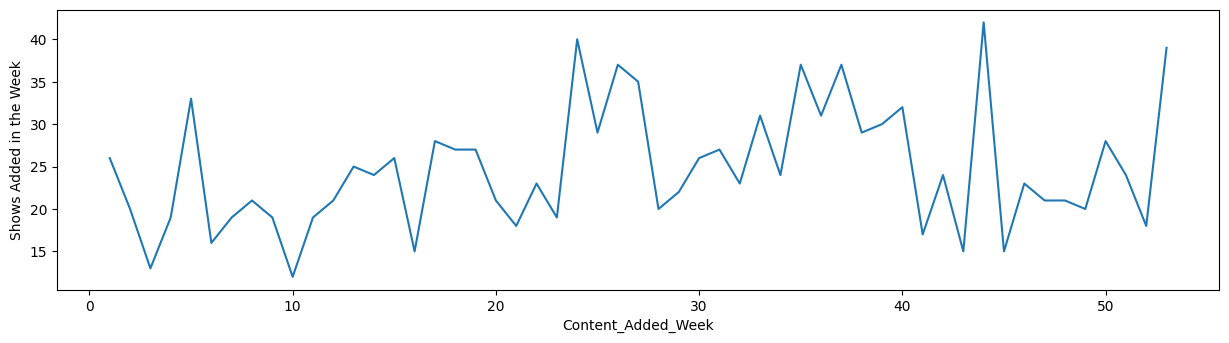

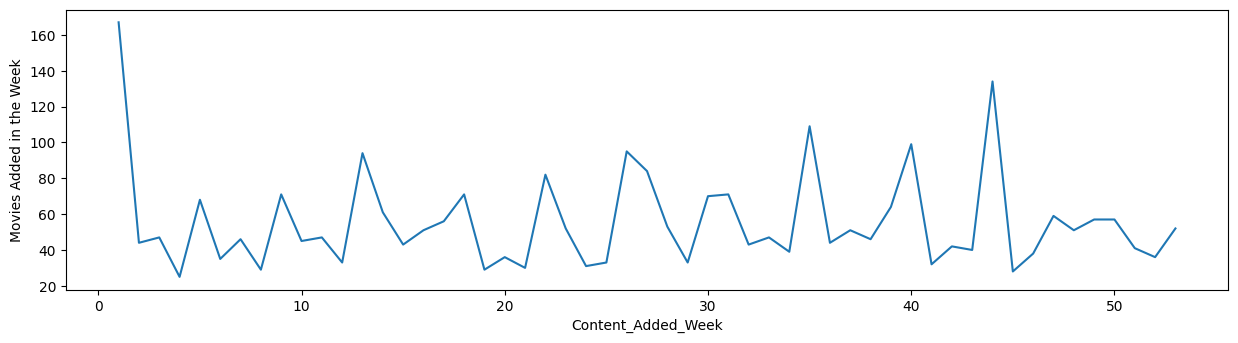

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
data_week=data_usa_shows.groupby(['Content_Added_Week']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_week, x='Content_Added_Week', y='title')
plt.ylabel("Shows Added in the Week")
plt.xlabel("Content_Added_Week")
plt.show()

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
data_week=data_usa_movies.groupby(['Content_Added_Week']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_week, x='Content_Added_Week', y='title')
plt.ylabel("Movies Added in the Week")
plt.xlabel("Content_Added_Week")
plt.show()

In USA, Tv shows were added between these ranges 42-44 & 22-25 of week in the year

In USA, Movies were added between these ranges 0-2 & 42-44 of week in the year

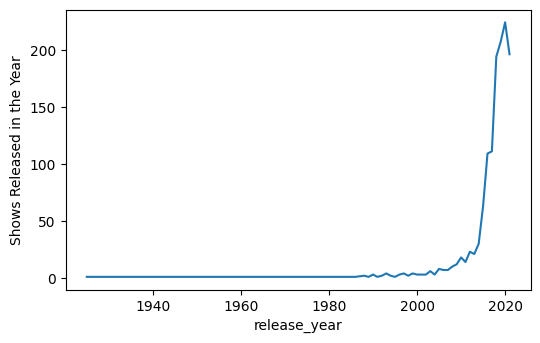

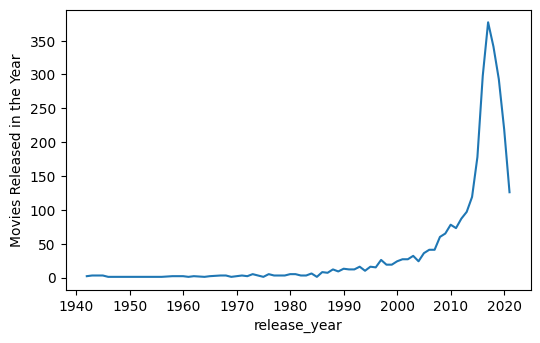

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_release_year=data_usa_shows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("release_year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_release_year=data_usa_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("release_year")
plt.show()

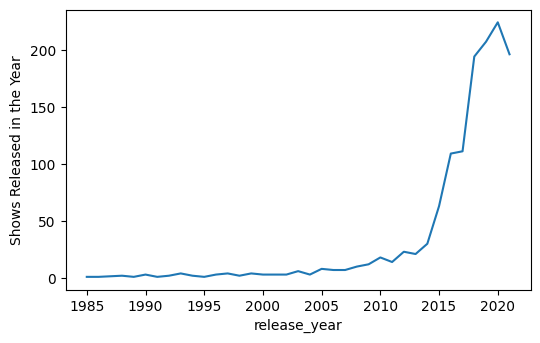

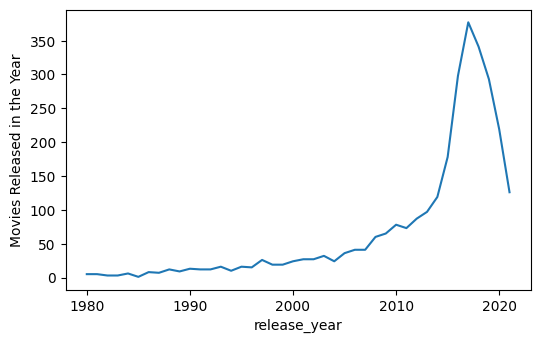

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_release_year=data_usa_shows[data_usa_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("release_year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_release_year=data_usa_movies[data_usa_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("release_year")
plt.show()

In USA, both recently released TV shows and Movies are declining which means less. Not adding recently released movies to the platform may also be a reason for this.

In [ ]:
#Analysing Popular combination of actors and directors
data_usa_shows['Actor_Director_Combination'] = data_usa_shows.cast.str.cat(data_usa_shows.director, sep=' and ')
data_usa_shows_subset=data_usa_shows[data_usa_shows['cast']!='Unknown Cast']
data_usa_shows_subset=data_usa_shows_subset[data_usa_shows_subset['director']!='Unknown Director']
data_usa_shows_subset.head()

<ipython-input-133-c2893dab49b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa_shows['Actor_Director_Combination'] = data_usa_shows.cast.str.cat(data_usa_shows.director, sep=' and ')


title          cast       director        country     listed_in  \
111  Midnight Mass   Kate Siegel  Mike Flanagan  United States     TV Dramas   
112  Midnight Mass   Kate Siegel  Mike Flanagan  United States     TV Horror   
113  Midnight Mass   Kate Siegel  Mike Flanagan  United States  TV Mysteries   
114  Midnight Mass  Zach Gilford  Mike Flanagan  United States     TV Dramas   
115  Midnight Mass  Zach Gilford  Mike Flanagan  United States     TV Horror   

    show_id     type          date_added  release_year rating  duration  \
111      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   
112      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   
113      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   
114      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   
115      s6  TV Show  September 24, 2021          2021  TV-MA  1 Season   

    Content_Added_Date  Content_Added_Month  Content_Added_Week  \
111         2021-09-24                    9                  38   
112         2021-09-24                    9                  38   
113         2021-09-24                    9                  38   
114         2021-09-24                    9                  38   
115         2021-09-24                    9                  38   

     Content_Added_Year      Actor_Director_Combination  
111                2021   Kate Siegel and Mike Flanagan  
112                2021   Kate Siegel and Mike Flanagan  
113                2021   Kate Siegel and Mike Flanagan  
114                2021  Zach Gilford and Mike Flanagan  
115                2021  Zach Gilford and Mike Flanagan

In [ ]:
#Analysing Popular combination of actors and directors
data_usa_movies['Actor_Director_Combination'] = data_usa_movies.cast.str.cat(data_usa_movies.director, sep=' and ')
data_usa_movies_subset=data_usa_movies[data_usa_movies['cast']!='Unknown Cast']
data_usa_movies_subset=data_usa_movies_subset[data_usa_movies_subset['director']!='Unknown Director']
data_usa_movies_subset.head()

<ipython-input-134-2582c98f3c78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa_movies['Actor_Director_Combination'] = data_usa_movies.cast.str.cat(data_usa_movies.director, sep=' and ')


title             cast        director  \
159  My Little Pony: A New Generation  Vanessa Hudgens   Robert Cullen   
160  My Little Pony: A New Generation  Vanessa Hudgens  José Luis Ucha   
161  My Little Pony: A New Generation     Kimiko Glenn   Robert Cullen   
162  My Little Pony: A New Generation     Kimiko Glenn  José Luis Ucha   
163  My Little Pony: A New Generation    James Marsden   Robert Cullen   

           country                 listed_in show_id   type  \
159  United States  Children & Family Movies      s7  Movie   
160  United States  Children & Family Movies      s7  Movie   
161  United States  Children & Family Movies      s7  Movie   
162  United States  Children & Family Movies      s7  Movie   
163  United States  Children & Family Movies      s7  Movie   

             date_added  release_year rating duration Content_Added_Date  \
159  September 24, 2021          2021     PG   91 min         2021-09-24   
160  September 24, 2021          2021     PG   91 min         2021-09-24   
161  September 24, 2021          2021     PG   91 min         2021-09-24   
162  September 24, 2021          2021     PG   91 min         2021-09-24   
163  September 24, 2021          2021     PG   91 min         2021-09-24   

     Content_Added_Month  Content_Added_Week  Content_Added_Year  \
159                    9                  38                2021   
160                    9                  38                2021   
161                    9                  38                2021   
162                    9                  38                2021   
163                    9                  38                2021   

             Actor_Director_Combination  
159   Vanessa Hudgens and Robert Cullen  
160  Vanessa Hudgens and José Luis Ucha  
161      Kimiko Glenn and Robert Cullen  
162     Kimiko Glenn and José Luis Ucha  
163     James Marsden and Robert Cullen

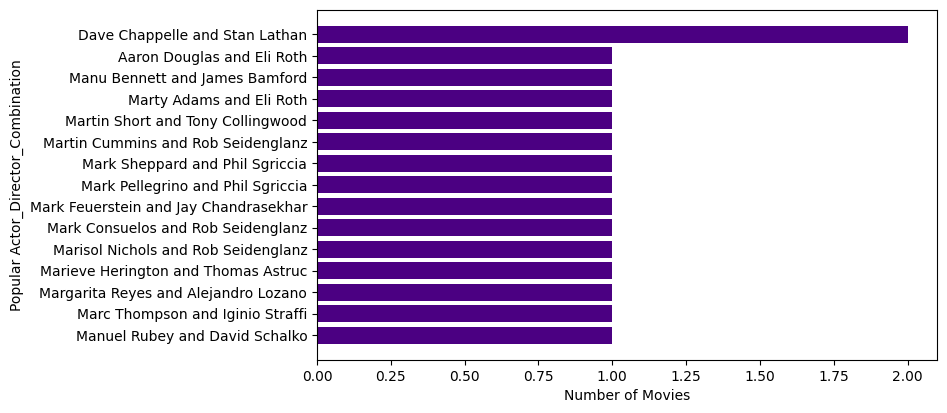

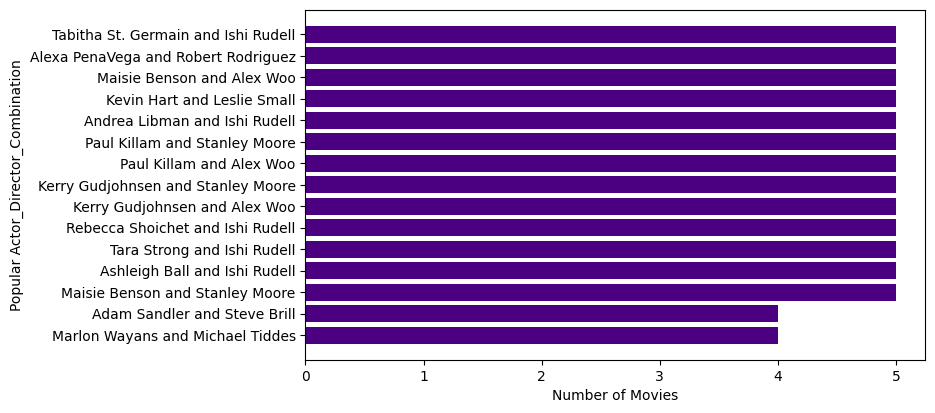

In [ ]:
plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
data_cast=data_usa_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['Actor_Director_Combination']!='Unknown Director']
plt.barh(data_cast[::-1]['Actor_Director_Combination'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor_Director_Combination')
plt.show()

plt.figure(figsize=(8,10))
plt.subplot(2,1,2)
data_cast=data_usa_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['Actor_Director_Combination']!='Unknown Director']
plt.barh(data_cast[::-1]['Actor_Director_Combination'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor_Director_Combination')
plt.show()

In [ ]:
data_cast[::-1]['Actor_Director_Combination'].values

array(['Marlon Wayans and Michael Tiddes', 'Adam Sandler and Steve Brill',
       'Maisie Benson and Stanley Moore', 'Ashleigh Ball and Ishi Rudell',
       'Tara Strong and Ishi Rudell', 'Rebecca Shoichet and Ishi Rudell',
       'Kerry Gudjohnsen and Alex Woo',
       'Kerry Gudjohnsen and Stanley Moore', 'Paul Killam and Alex Woo',
       'Paul Killam and Stanley Moore', 'Andrea Libman and Ishi Rudell',
       'Kevin Hart and Leslie Small', 'Maisie Benson and Alex Woo',
       'Alexa PenaVega and Robert Rodriguez',
       'Tabitha St. Germain and Ishi Rudell'], dtype=object)

In [ ]:
data_cast[::-1]['Actor_Director_Combination'].values

array(['Marlon Wayans and Michael Tiddes', 'Adam Sandler and Steve Brill',
       'Maisie Benson and Stanley Moore', 'Ashleigh Ball and Ishi Rudell',
       'Tara Strong and Ishi Rudell', 'Rebecca Shoichet and Ishi Rudell',
       'Kerry Gudjohnsen and Alex Woo',
       'Kerry Gudjohnsen and Stanley Moore', 'Paul Killam and Alex Woo',
       'Paul Killam and Stanley Moore', 'Andrea Libman and Ishi Rudell',
       'Kevin Hart and Leslie Small', 'Maisie Benson and Alex Woo',
       'Alexa PenaVega and Robert Rodriguez',
       'Tabitha St. Germain and Ishi Rudell'], dtype=object)

The most popular Actor Director Combination across Movies on Netflix in USA are:-

1.   Tabitha St. Germain and Ishi Rudell
1.   Alexa PenaVega and Robert Rodriguez
1.   Maisie Benson and Alex Woo
2.   Kevin Hart and Leslie Small
2.   Andrea Libman and Ishi Rudell
2.   Paul Killam and Stanley Moore
1.   Paul Killam and Alex Woo
1.   Kerry Gudjohnsen and Stanley Moore
2.   Kerry Gudjohnsen and Alex Woo
2.   Rebecca Shoichet and Ishi Rudell
1.   Tara Strong and Ishi Rudell
2.   Ashleigh Ball and Ishi Rudell
1.   Maisie Benson and Stanley Moore










The most popular Actor Director Combination across TV Shows on Netflix in USA are:-

1.   Dave Chappelle and Stan Lathan
1.   Manuel Rubey and David Schalko
1.   Marc Thompson and Iginio Straffi
1.   Margarita Reyes and Alejandro Lozano
2.   Marieve Herington and Thomas Astruc
2.   Marisol Nichols and Rob Seidenglanz
2.   Mark Consuelos and Rob Seidenglanz
1.   Mark Feuerstein and Jay Chandrasekhar
1.   Mark Pellegrino and Phil Sgriccia
1.   Martin Cummins and Rob Seidenglanz
2.   Martin Short and Tony Collingwood
2.   Marty Adams and Eli Roth
2.   Manu Bennett and James Bamford
1.   Aaron Douglas and Eli Roth



##India

In [ ]:
data_india_movies=data_final[(data_final['country']=='India') & (data_final['type']=='Movie')]
data_india_shows=data_final[(data_final['country']=='India') & (data_final['type']=='TV Show')]


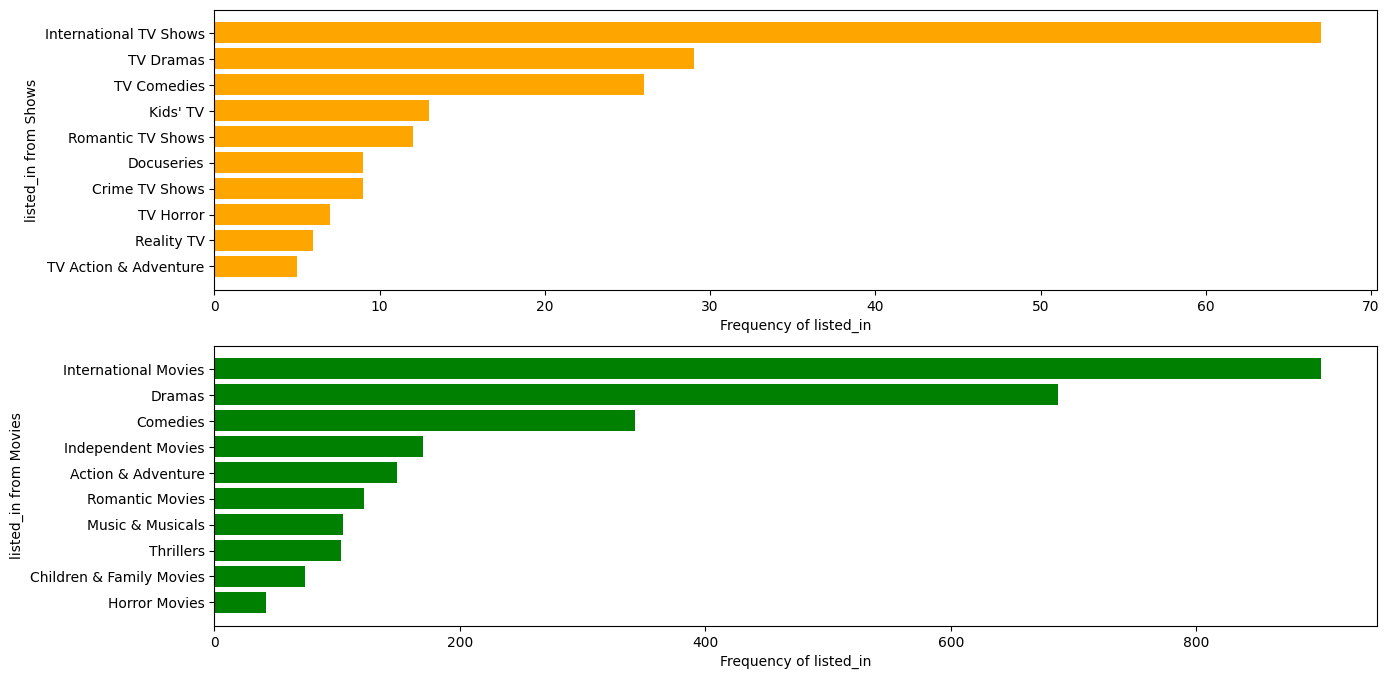

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_listed_in=data_india_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_listed_in[::-1]['listed_in'], data_listed_in[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of listed_in')
plt.ylabel('listed_in from Shows')


plt.subplot(2,1,2)
data_listed_in=data_india_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_listed_in[::-1]['listed_in'], data_listed_in[::-1]['title'],color=['Green'])
plt.xlabel('Frequency of listed_in')
plt.ylabel('listed_in from Movies')
plt.show()

Dramas,Comedy, Kids 'TV Shows, International TV Shows and Romantic TV Shows Genres in TV Series are popular in India

International Movies, Dramas, Comedies, Independent Movies and Action & Adventure Genres in Movies are popular in India

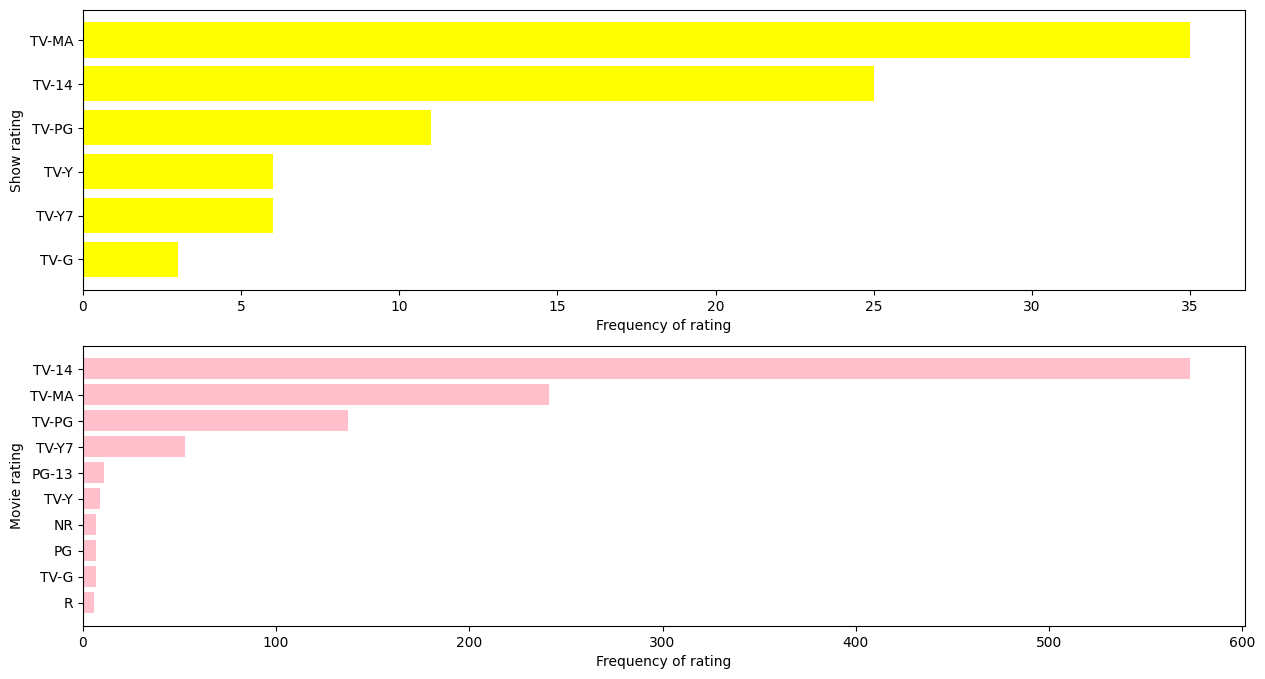

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_rating=data_india_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['rating'], data_rating[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of rating')
plt.ylabel('Show rating')


plt.subplot(2,1,2)
data_rating=data_india_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['rating'], data_rating[::-1]['title'],color=['pink'])
plt.xlabel('Frequency of rating')
plt.ylabel('Movie rating')
plt.show()

In India, TV Show ratings were TV-MA, TV-14, TV-PG and TV-Y. Movies were TV-14, TV-MA, TV-PG and TV-Y7.

In [ ]:
data_min_india_movies=data_min[(data_final['country']=='India')]
data_min_india_movies['country'] = data_min_india_movies['country'].str.replace(',', '')
data_min_india_movies['country'].value_counts()

<ipython-input-141-cb6e012532c8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_min_india_movies=data_min[(data_final['country']=='India')]
<ipython-input-141-cb6e012532c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_min_india_movies['country'] = data_min_india_movies['country'].str.replace(',', '')


country
India    22546
Name: count, dtype: int64

<ipython-input-142-b81d2557169d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_rating=data_min_india_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


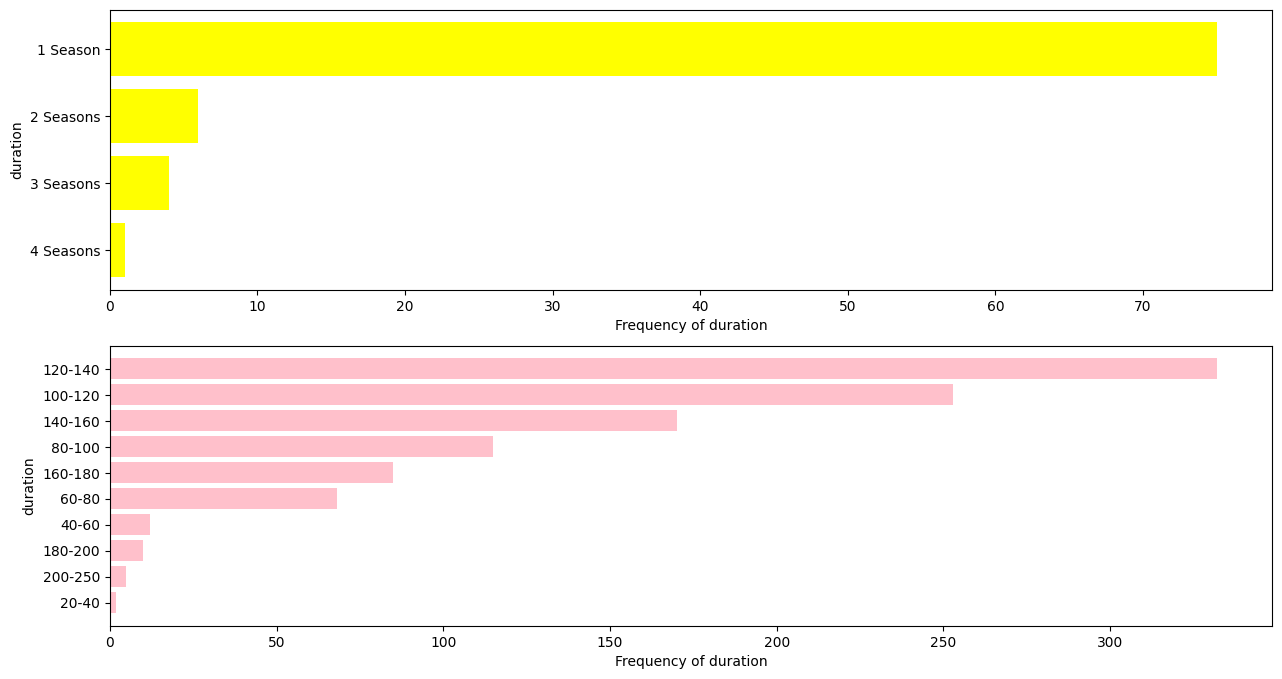

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_rating=data_india_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['duration'], data_rating[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of duration')
plt.ylabel('duration')


plt.subplot(2,1,2)
data_rating=data_min_india_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['duration'], data_rating[::-1]['title'],color=['pink'])
plt.xlabel('Frequency of duration')
plt.ylabel('duration')
plt.show()

Across movies 120-140, 100-120 is the ranges of minutes for which most movies lie.

Across Tv Shows 1 Season shows were dominated followed by 2 season shows.

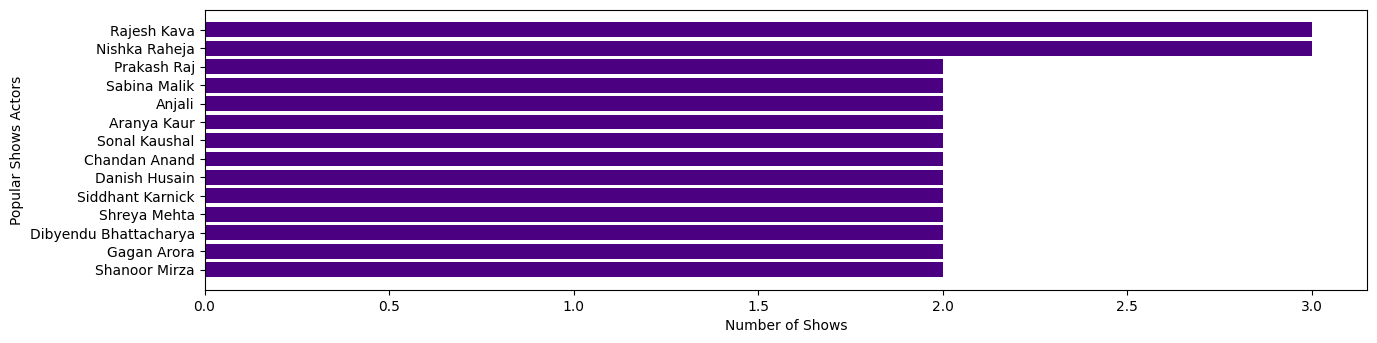

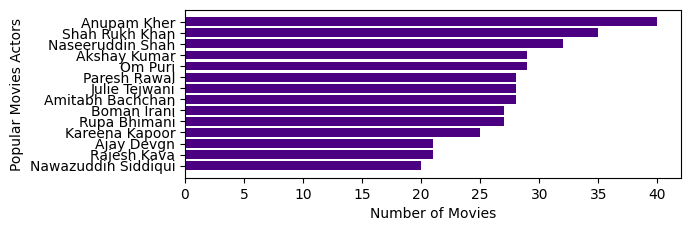

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_cast=data_india_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['cast']!='Unknown Cast']
plt.barh(data_cast[::-1]['cast'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Shows Actors')
plt.show()


plt.subplot(2,1,2)
data_cast=data_india_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['cast']!='Unknown Cast']
plt.barh(data_cast[::-1]['cast'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Movies Actors')
plt.show()

Rajesh Kava, Nishka Raheja and Prakash Raj are the popular actors across TV Shows in India.

Anupam Kher, Shah Rukh Khan and Naseeruddin Shah are the popular actors across movies on Netflix in India.

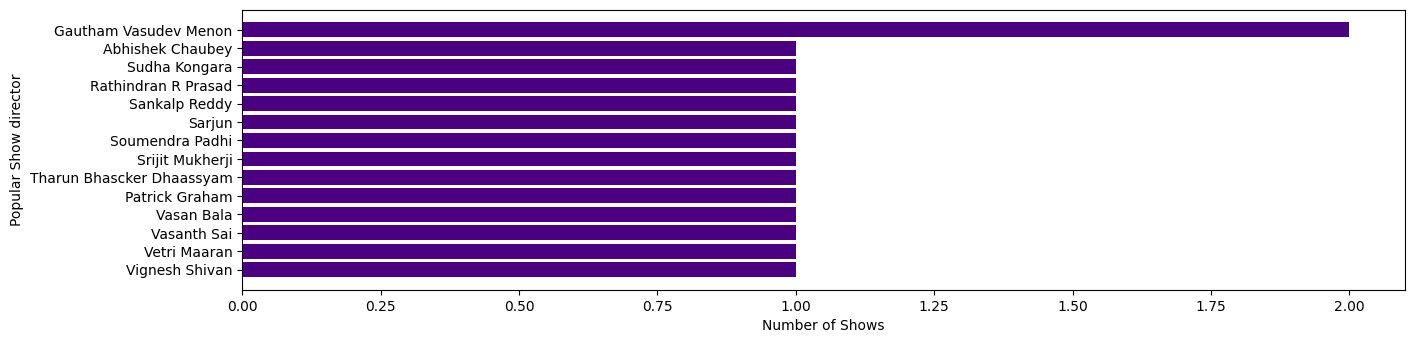

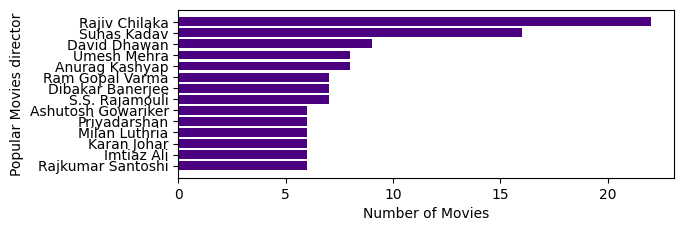

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_cast=data_india_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['director']!='Unknown Director']
plt.barh(data_cast[::-1]['director'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Show director')
plt.show()


plt.subplot(2,1,2)
data_cast=data_india_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['director']!='Unknown Director']
plt.barh(data_cast[::-1]['director'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Movies director')
plt.show()

Gautham Vasudev Menon, Abhishek Chaubey, Sudha Kongara, Rathindran R Prasada and some more are the popular directors across TV Shows on Netflix in India.

Rajiv Chilaka, Suhas Kadav, David Dhawan , Umesh Mehra and Anurag KashyapAnurag Kashyap are the popular directors across movies on Netflix in India

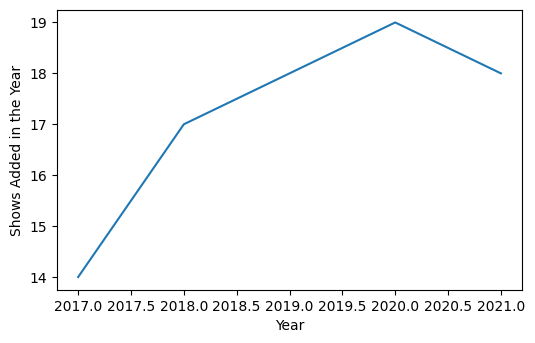

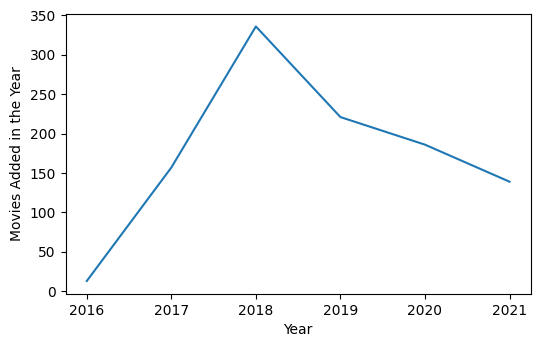

In [ ]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
data_year=data_india_shows.groupby(['Content_Added_Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_year, x='Content_Added_Year', y='title')
plt.ylabel("Shows Added in the Year")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_year=data_india_movies.groupby(['Content_Added_Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_year, x='Content_Added_Year', y='title')
plt.ylabel("Movies Added in the Year")
plt.xlabel("Year")
plt.show()

In India, Tv shows addition remains declining for the recent years.

In India, Movies addition in India started to decline after 2018.

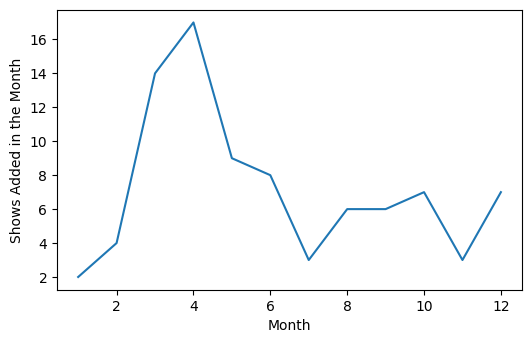

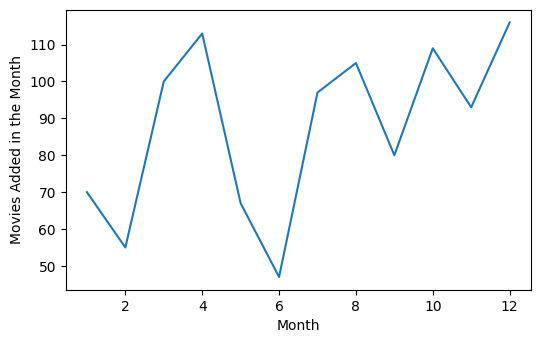

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_month=data_india_shows.groupby(['Content_Added_Month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_month, x='Content_Added_Month', y='title')
plt.ylabel("Shows Added in the Month")
plt.xlabel("Month")
plt.show()


plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_month=data_india_movies.groupby(['Content_Added_Month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_month, x='Content_Added_Month', y='title')
plt.ylabel("Movies Added in the Month")
plt.xlabel("Month")
plt.show()

In India, Tv shows were added mostly on April month of the year

In India, Movies were added mostly on April and Last month of the year.

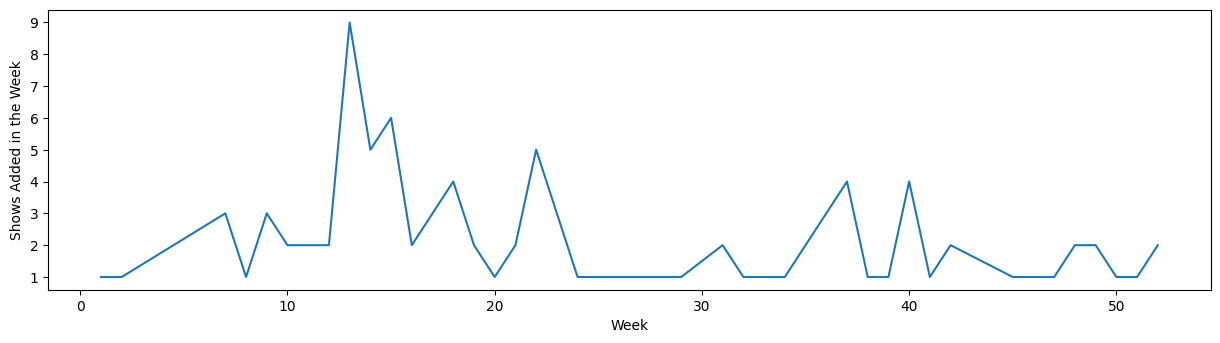

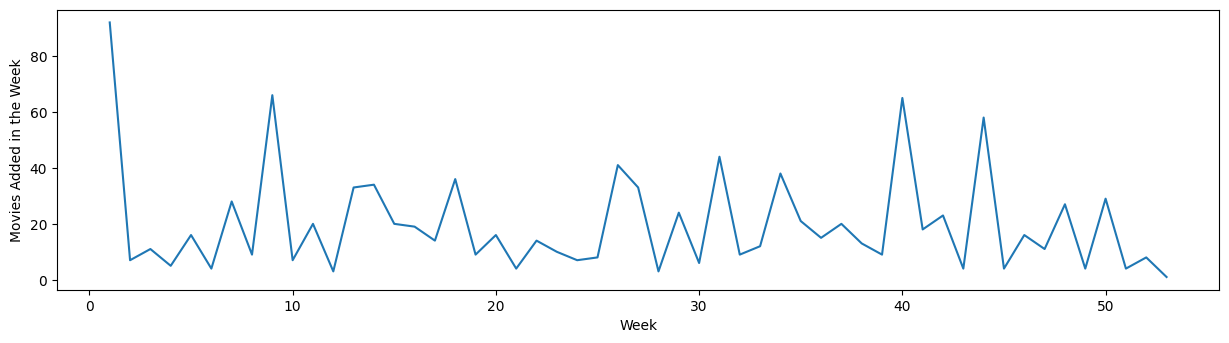

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
data_week=data_india_shows.groupby(['Content_Added_Week']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_week, x='Content_Added_Week', y='title')
plt.ylabel("Shows Added in the Week")
plt.xlabel("Week")
plt.show()

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
data_week=data_india_movies.groupby(['Content_Added_Week']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_week, x='Content_Added_Week', y='title')
plt.ylabel("Movies Added in the Week")
plt.xlabel("Week")
plt.show()

In India, Tv shows were added between these ranges 12-14 & 21-24 of week in the year

In India, Movies were added between these ranges 0-2, 39-41 & 8-10 of week in the year

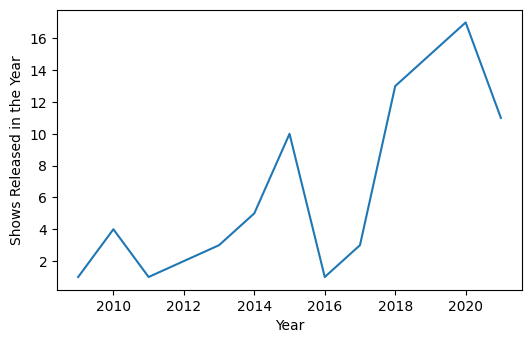

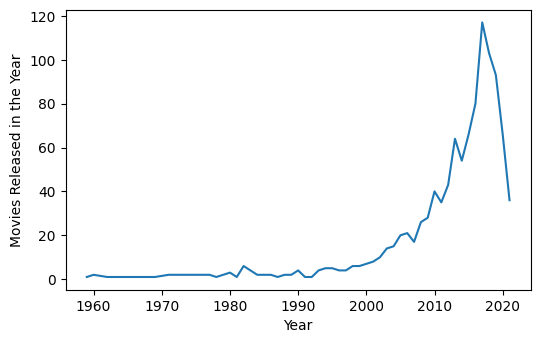

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_release_year=data_india_shows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_release_year=data_india_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

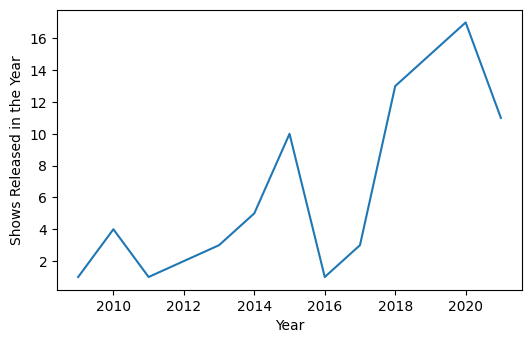

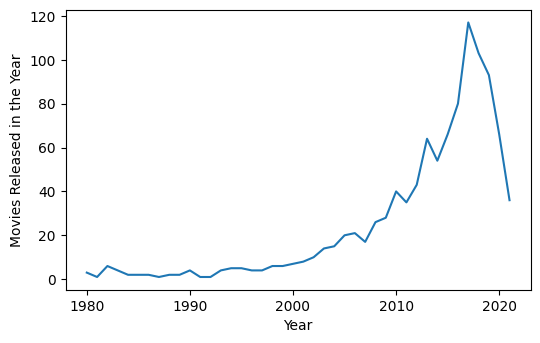

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_release_year=data_india_shows[data_india_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_release_year=data_india_movies[data_india_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In India, both recently released TV shows and Movies are declining which means less. Not adding recently released movies to the platform may also be a reason for this.

In [ ]:
#Analysing a combination of actors and directors
data_india_shows['Actor_Director_Combination'] = data_india_shows.cast.str.cat(data_india_shows.director, sep=' and ')
data_india_shows_subset=data_india_shows[data_india_shows['cast']!='Unknown Cast']
data_india_shows_subset=data_india_shows_subset[data_india_shows_subset['director']!='Unknown Director']
data_india_shows_subset.head()

<ipython-input-150-58d06a4d2cf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india_shows['Actor_Director_Combination'] = data_india_shows.cast.str.cat(data_india_shows.director, sep=' and ')


title    cast          director country listed_in show_id     type  \
7005  Navarasa  Suriya     Bejoy Nambiar   India  TV Shows    s298  TV Show   
7006  Navarasa  Suriya      Priyadarshan   India  TV Shows    s298  TV Show   
7007  Navarasa  Suriya    Karthik Narain   India  TV Shows    s298  TV Show   
7008  Navarasa  Suriya       Vasanth Sai   India  TV Shows    s298  TV Show   
7009  Navarasa  Suriya  Karthik Subbaraj   India  TV Shows    s298  TV Show   

          date_added  release_year rating  duration Content_Added_Date  \
7005  August 6, 2021          2021  TV-MA  1 Season         2021-08-06   
7006  August 6, 2021          2021  TV-MA  1 Season         2021-08-06   
7007  August 6, 2021          2021  TV-MA  1 Season         2021-08-06   
7008  August 6, 2021          2021  TV-MA  1 Season         2021-08-06   
7009  August 6, 2021          2021  TV-MA  1 Season         2021-08-06   

      Content_Added_Month  Content_Added_Week  Content_Added_Year  \
7005                    8                  31                2021   
7006                    8                  31                2021   
7007                    8                  31                2021   
7008                    8                  31                2021   
7009                    8                  31                2021   

       Actor_Director_Combination  
7005     Suriya and Bejoy Nambiar  
7006      Suriya and Priyadarshan  
7007    Suriya and Karthik Narain  
7008       Suriya and Vasanth Sai  
7009  Suriya and Karthik Subbaraj

In [ ]:
#Analysing a combination of actors and directors
data_india_movies['Actor_Director_Combination'] = data_india_movies.cast.str.cat(data_india_movies.director, sep=' and ')
data_india_movies_subset=data_india_movies[data_india_movies['cast']!='Unknown Cast']
data_india_movies_subset=data_india_movies_subset[data_india_movies_subset['director']!='Unknown Director']
data_india_movies_subset.head()

<ipython-input-151-c067709eaf92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india_movies['Actor_Director_Combination'] = data_india_movies.cast.str.cat(data_india_movies.director, sep=' and ')


title                   cast        director country  \
621  Avvai Shanmughi           Kamal Hassan  K.S. Ravikumar   India   
622  Avvai Shanmughi           Kamal Hassan  K.S. Ravikumar   India   
629  Avvai Shanmughi                 Nassar  K.S. Ravikumar   India   
630  Avvai Shanmughi                 Nassar  K.S. Ravikumar   India   
631  Avvai Shanmughi  S.P. Balasubrahmanyam  K.S. Ravikumar   India   

                listed_in show_id   type          date_added  release_year  \
621              Comedies     s23  Movie  September 21, 2021          1996   
622  International Movies     s23  Movie  September 21, 2021          1996   
629              Comedies     s23  Movie  September 21, 2021          1996   
630  International Movies     s23  Movie  September 21, 2021          1996   
631              Comedies     s23  Movie  September 21, 2021          1996   

    rating duration Content_Added_Date  Content_Added_Month  \
621  TV-PG  161 min         2021-09-21                    9   
622  TV-PG  161 min         2021-09-21                    9   
629  TV-PG  161 min         2021-09-21                    9   
630  TV-PG  161 min         2021-09-21                    9   
631  TV-PG  161 min         2021-09-21                    9   

     Content_Added_Week  Content_Added_Year  \
621                  38                2021   
622                  38                2021   
629                  38                2021   
630                  38                2021   
631                  38                2021   

                   Actor_Director_Combination  
621           Kamal Hassan and K.S. Ravikumar  
622           Kamal Hassan and K.S. Ravikumar  
629                 Nassar and K.S. Ravikumar  
630                 Nassar and K.S. Ravikumar  
631  S.P. Balasubrahmanyam and K.S. Ravikumar

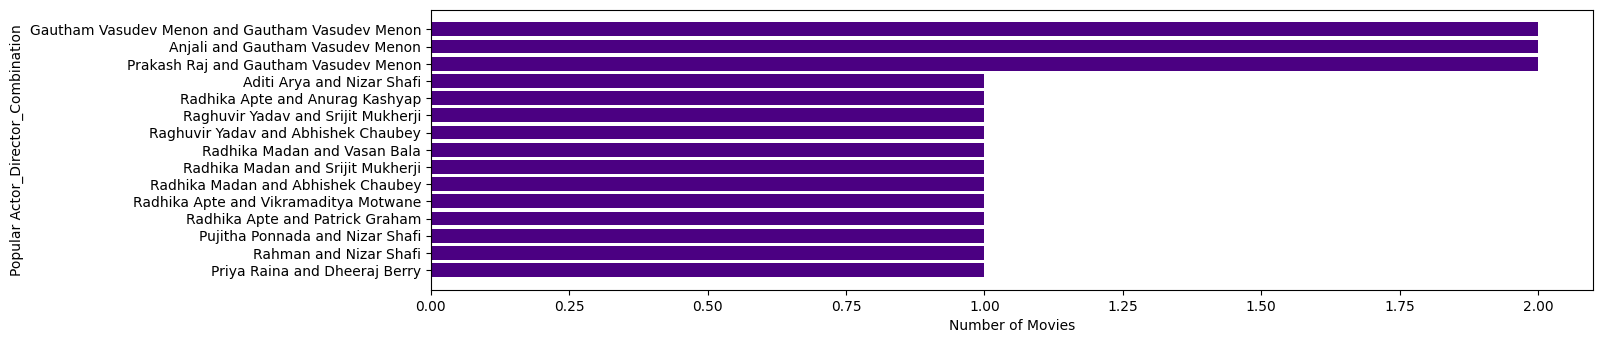

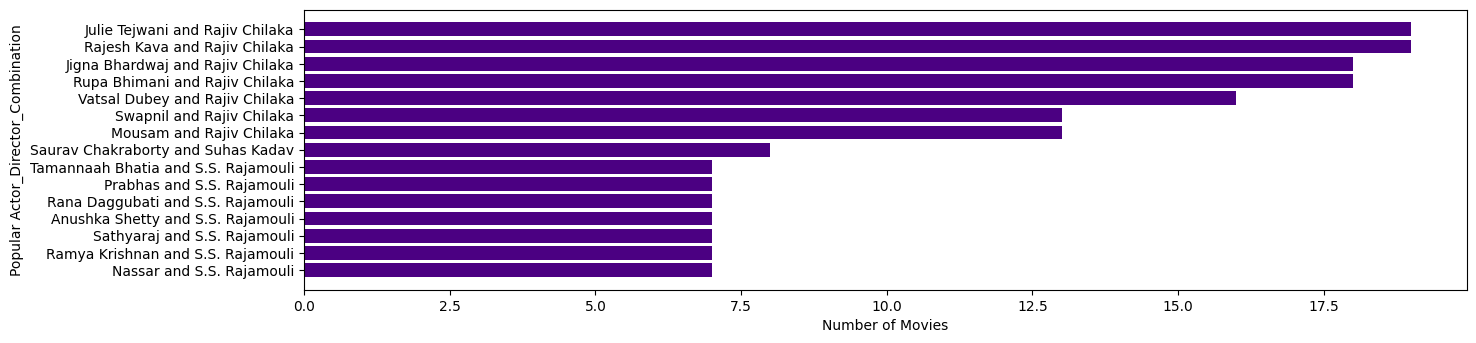

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_cast=data_india_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['Actor_Director_Combination']!='Unknown Director']
plt.barh(data_cast[::-1]['Actor_Director_Combination'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor_Director_Combination')
plt.show()

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
data_cast=data_india_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['Actor_Director_Combination']!='Unknown Director']
plt.barh(data_cast[::-1]['Actor_Director_Combination'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor_Director_Combination')
plt.show()

The Most Popular Actor Director Combination in Shows Across India are:-

1.   Gautham Vasudev Menon and Gautham Vasudev Menon
1.   Anjali and Gautham Vasudev Menon
1.   Prakash Raj and Gautham Vasudev Menon
1.   Aditi Arya and Nizar Shafi
2.   Radhika Apte and Anurag Kashyap


The Most Popular Actor Director Combination in Movies Across India are:-


1.   Rajesh Kava and Rajiv Chilaka
1.   Julie Tejwani and Rajiv Chilaka
1.   Rupa Bhimani and Rajiv Chilaka
1.   Jigna Bhardwaj and Rajiv Chilaka
2.   Vatsal Dubey and Rajiv Chilaka
2.   Mousam and Rajiv Chilaka
2.   Swapnil and Rajiv Chilaka
2.   Saurav Chakraborty and Suhas Kadav


##UK

In [ ]:
data_uk_movies=data_final[(data_final['country']=='United Kingdom') & (data_final['type']=='Movie')]
data_uk_shows=data_final[(data_final['country']=='United Kingdom') & (data_final['type']=='TV Show')]


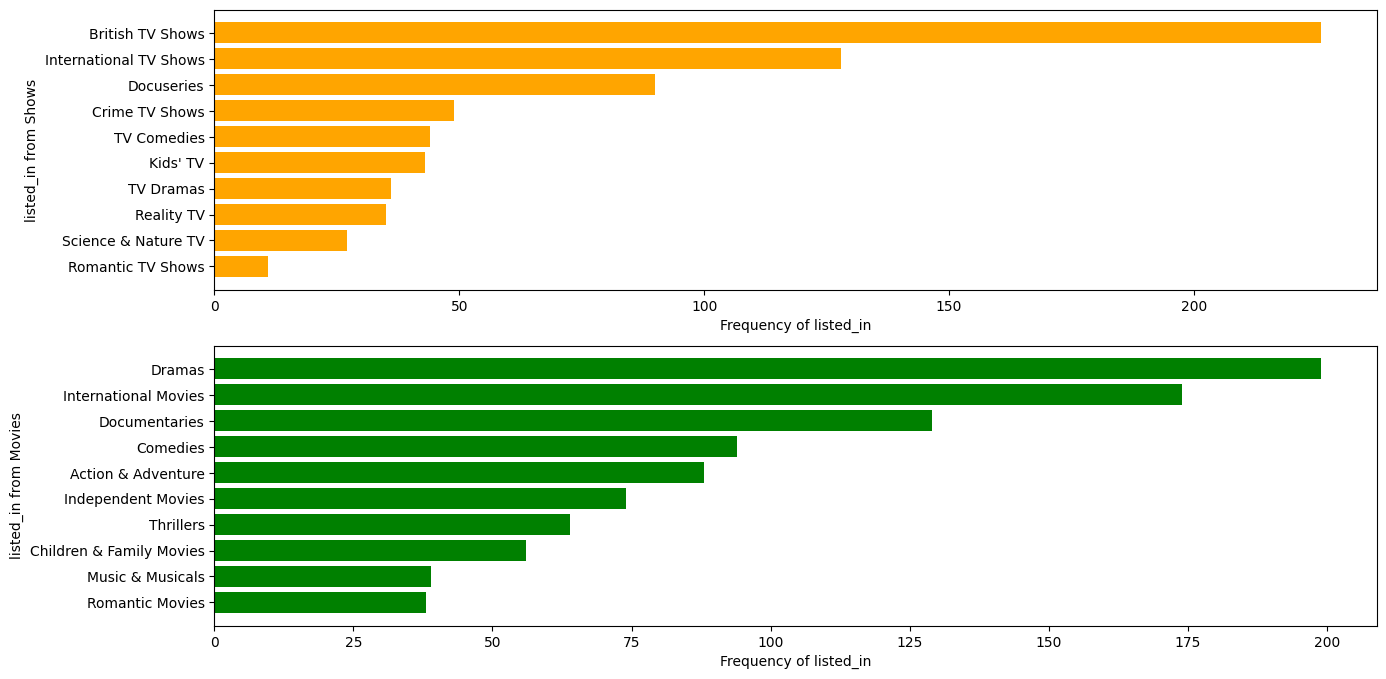

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_listed_in=data_uk_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_listed_in[::-1]['listed_in'], data_listed_in[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of listed_in')
plt.ylabel('listed_in from Shows')


plt.subplot(2,1,2)
data_listed_in=data_uk_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_listed_in[::-1]['listed_in'], data_listed_in[::-1]['title'],color=['Green'])
plt.xlabel('Frequency of listed_in')
plt.ylabel('listed_in from Movies')
plt.show()

British TV Shows, Docuseries, Crime TV Shows and International TV Shows Genres in TV Series are popular in UK

Dramas, International Movies, Documentaries and Comedies Genres in Movies are popular in UK

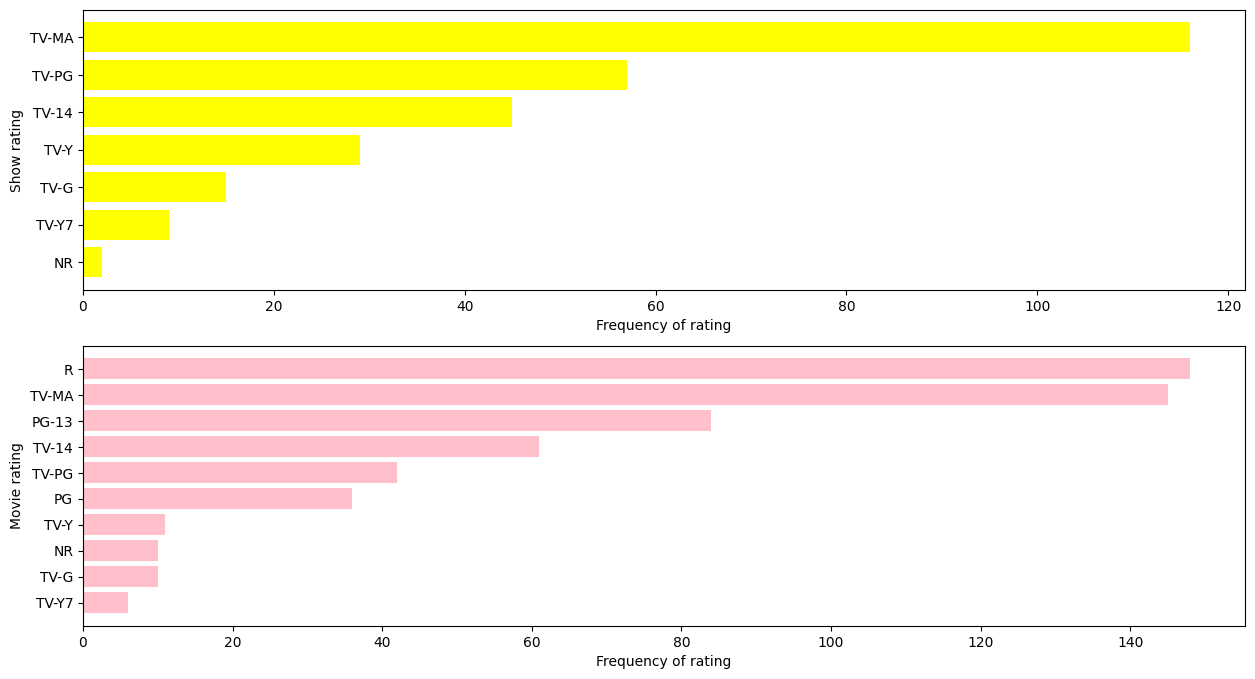

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_rating=data_uk_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['rating'], data_rating[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of rating')
plt.ylabel('Show rating')


plt.subplot(2,1,2)
data_rating=data_uk_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['rating'], data_rating[::-1]['title'],color=['pink'])
plt.xlabel('Frequency of rating')
plt.ylabel('Movie rating')
plt.show()

In UK, TV Show ratings were TV-MA, TV-PG, TV-14 and TV-Y. Movies were R, TV-MA, PG-13 and  TV-14.

In [ ]:
data_min_uk_movies=data_min[(data_final['country']=='United Kingdom')]
data_min_uk_movies['country'] = data_min_uk_movies['country'].str.replace(',', '')
data_min_uk_movies['country'].value_counts()

<ipython-input-156-dbba9ec258f8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_min_uk_movies=data_min[(data_final['country']=='United Kingdom')]
<ipython-input-156-dbba9ec258f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_min_uk_movies['country'] = data_min_uk_movies['country'].str.replace(',', '')


country
United Kingdom    8655
Name: count, dtype: int64

<ipython-input-157-f78727d2bff8>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_rating=data_min_uk_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


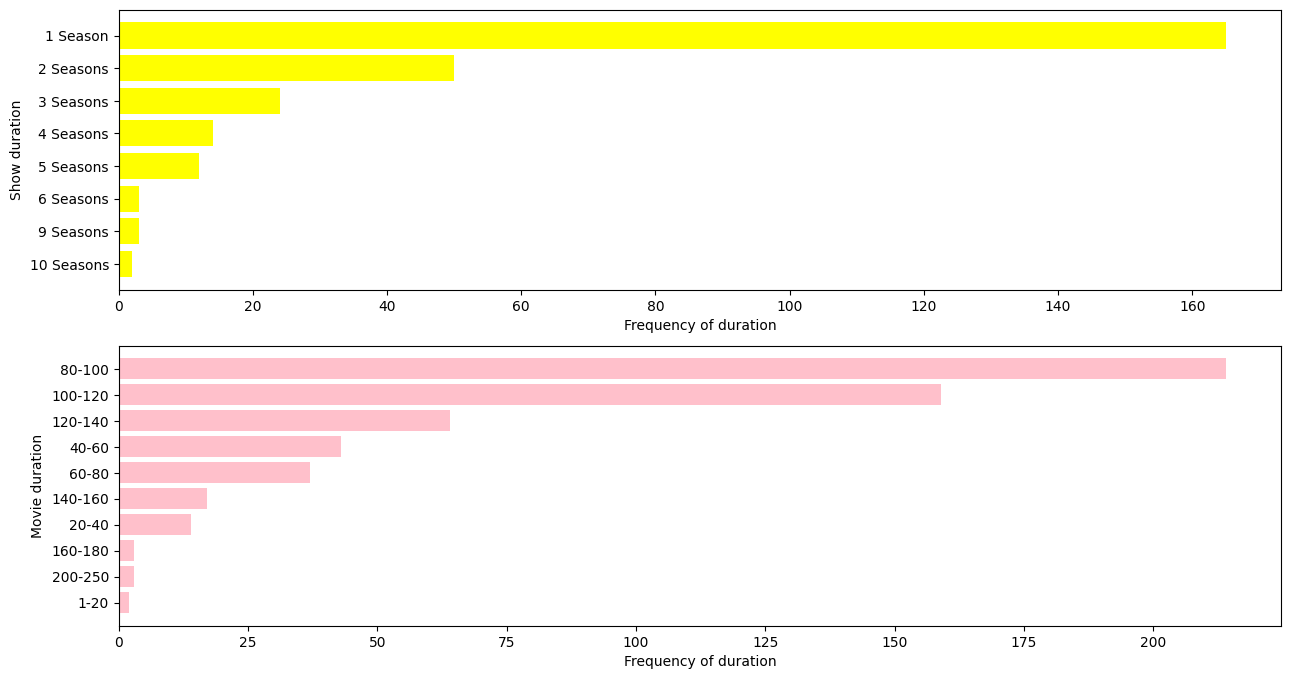

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_rating=data_uk_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['duration'], data_rating[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of duration')
plt.ylabel('Show duration')



plt.subplot(2,1,2)
data_rating=data_min_uk_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.barh(data_rating[::-1]['duration'], data_rating[::-1]['title'],color=['pink'])
plt.xlabel('Frequency of duration')
plt.ylabel('Movie duration')
plt.show()

Across movies 80-100, 100-120 is the ranges of minutes for which most movies lie.

Across Tv Shows 1 Season shows were dominated followed by 2 season shows.

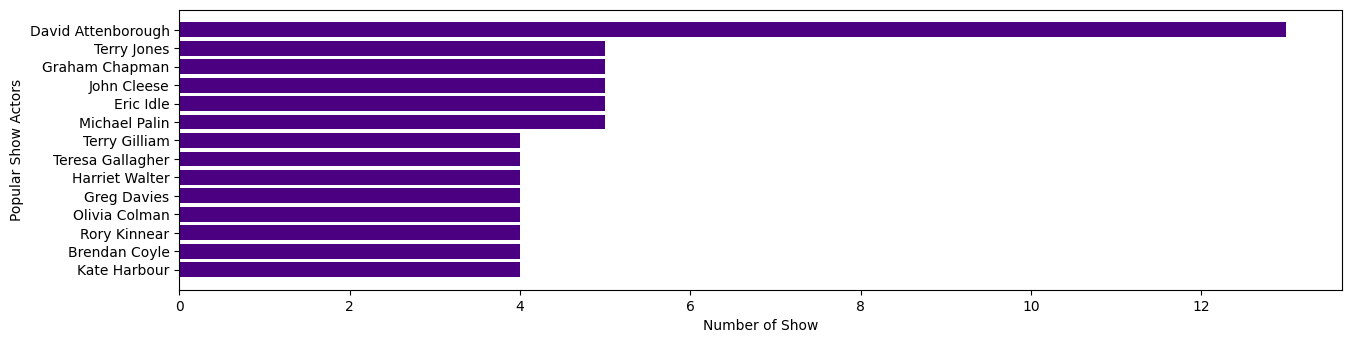

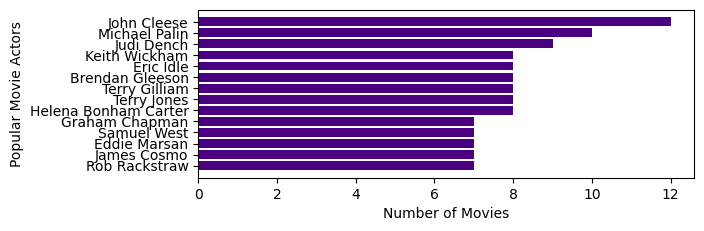

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_cast=data_uk_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['cast']!='Unknown Cast']
plt.barh(data_cast[::-1]['cast'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Show')
plt.ylabel('Popular Show Actors')
plt.show()


plt.subplot(2,1,2)
data_cast=data_uk_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['cast']!='Unknown Cast']
plt.barh(data_cast[::-1]['cast'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Movie Actors')
plt.show()

David Attenborough, Terry Jones and Graham Chapman are the popular actors across TV Shows in UK.


Samuel Jackson, Adam Sandler and James Franco are the popular actors across movies on Netflix in UK.

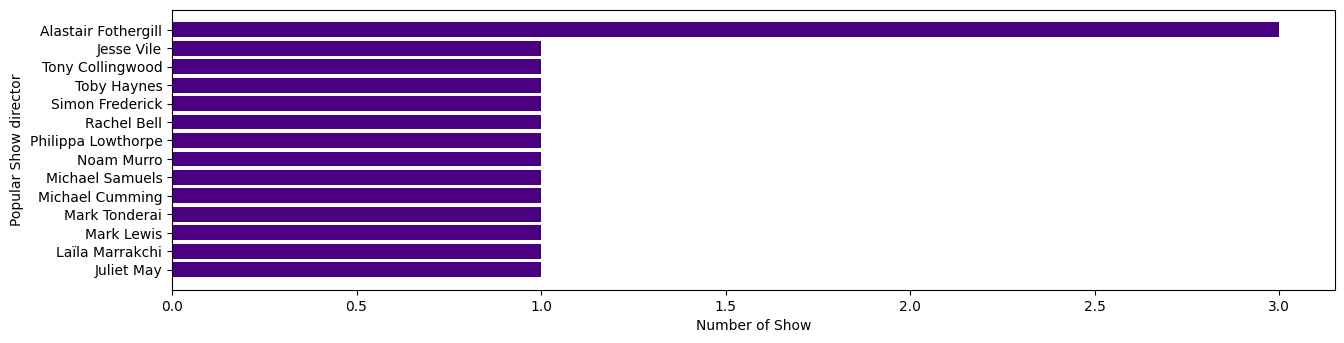

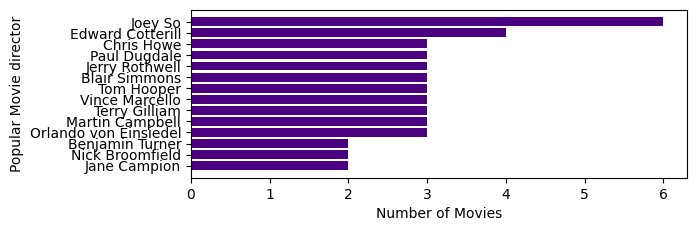

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
data_cast=data_uk_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['director']!='Unknown Director']
plt.barh(data_cast[::-1]['director'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Show')
plt.ylabel('Popular Show director')
plt.show()


plt.subplot(2,1,2)
data_cast=data_uk_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['director']!='Unknown Director']
plt.barh(data_cast[::-1]['director'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Movie director')
plt.show()

Alastair Fothergill, Jesse Vile, Tony Collingwood, Toby Haynes and some more are the popular directors across TV Shows on Netflix in UK.


Joey So, Edward Cotterill, Chris Howe , Paul Dugdale, Jerry Rothwell and some more are the popular directors across movies on Netflix in UK.

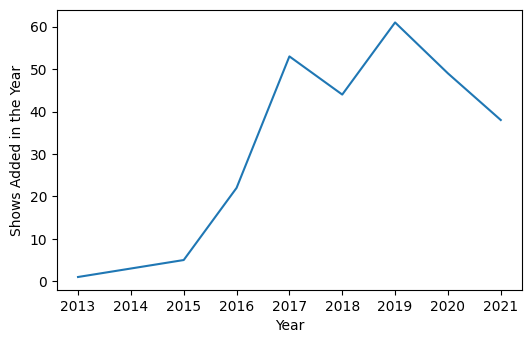

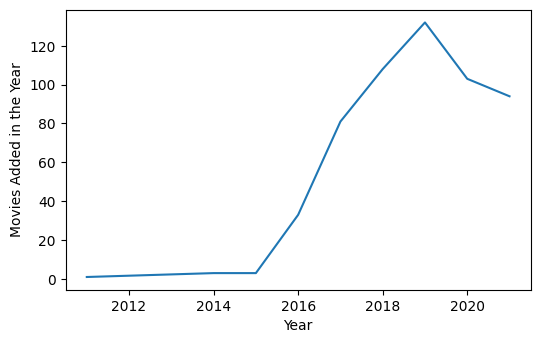

In [ ]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
data_year=data_uk_shows.groupby(['Content_Added_Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_year, x='Content_Added_Year', y='title')
plt.ylabel("Shows Added in the Year")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_year=data_uk_movies.groupby(['Content_Added_Year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_year, x='Content_Added_Year', y='title')
plt.ylabel("Movies Added in the Year")
plt.xlabel("Year")
plt.show()

In UK, Tv shows and Movies addition started to decline after 2019.



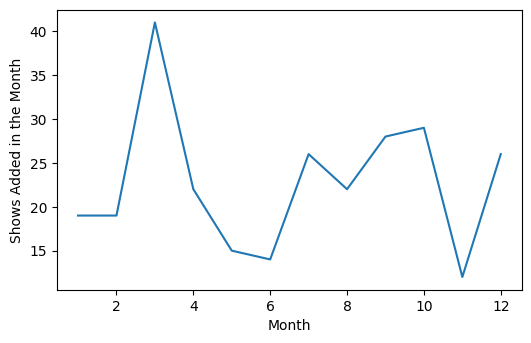

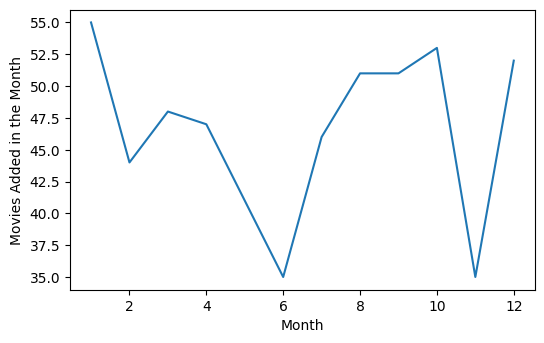

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_month=data_uk_shows.groupby(['Content_Added_Month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_month, x='Content_Added_Month', y='title')
plt.ylabel("Shows Added in the Month")
plt.xlabel("Month")
plt.show()


plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_month=data_uk_movies.groupby(['Content_Added_Month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_month, x='Content_Added_Month', y='title')
plt.ylabel("Movies Added in the Month")
plt.xlabel("Month")
plt.show()

In UK, Tv shows were added mostly on March month of the year

In UK, Movies were added mostly on first and Last month of the year.


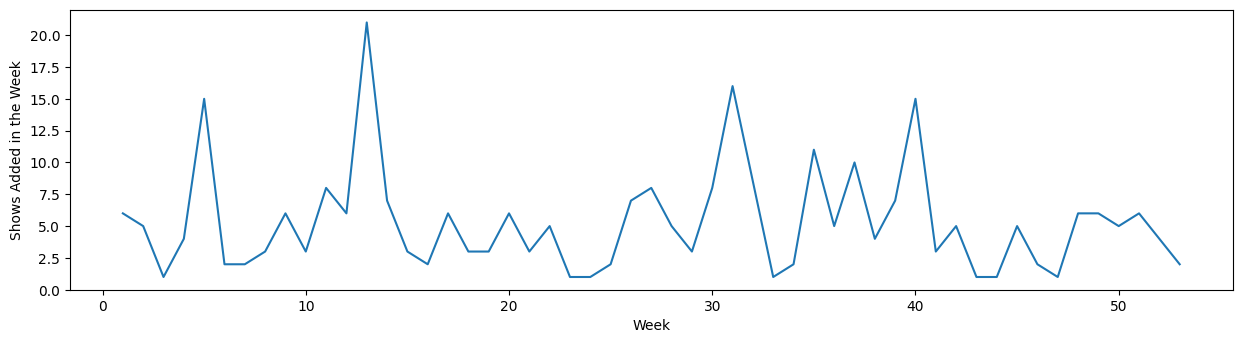

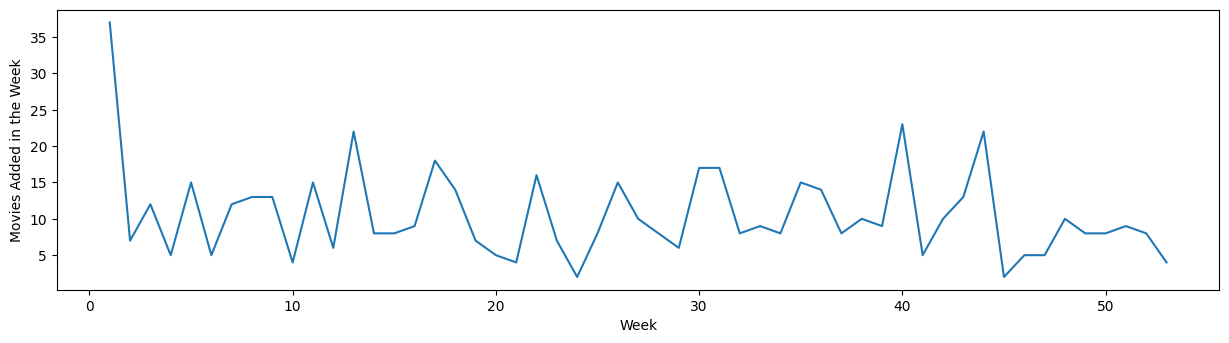

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
data_week=data_uk_shows.groupby(['Content_Added_Week']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_week, x='Content_Added_Week', y='title')
plt.ylabel("Shows Added in the Week")
plt.xlabel("Week")
plt.show()

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
data_week=data_uk_movies.groupby(['Content_Added_Week']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_week, x='Content_Added_Week', y='title')
plt.ylabel("Movies Added in the Week")
plt.xlabel("Week")
plt.show()

In UK, Tv shows were added between these ranges 12-15 & 30-32 of week in the year

In UK, Movies were added between these ranges 0-2 & 38-41 of week in the year

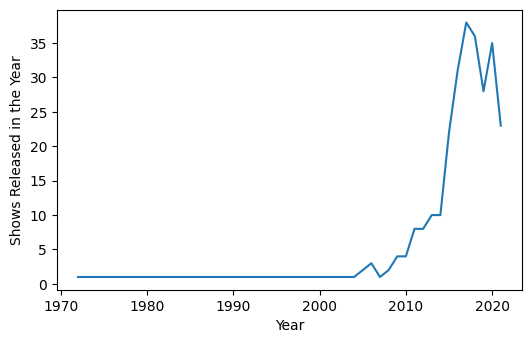

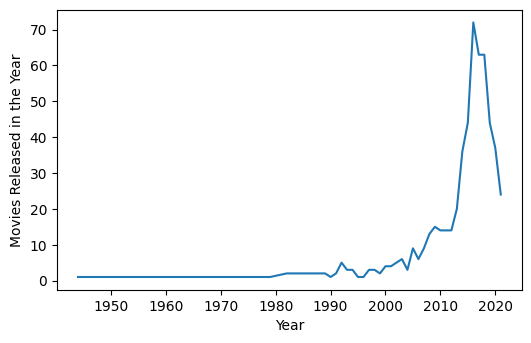

In [ ]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
data_release_year=data_uk_shows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,2)
data_release_year=data_uk_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

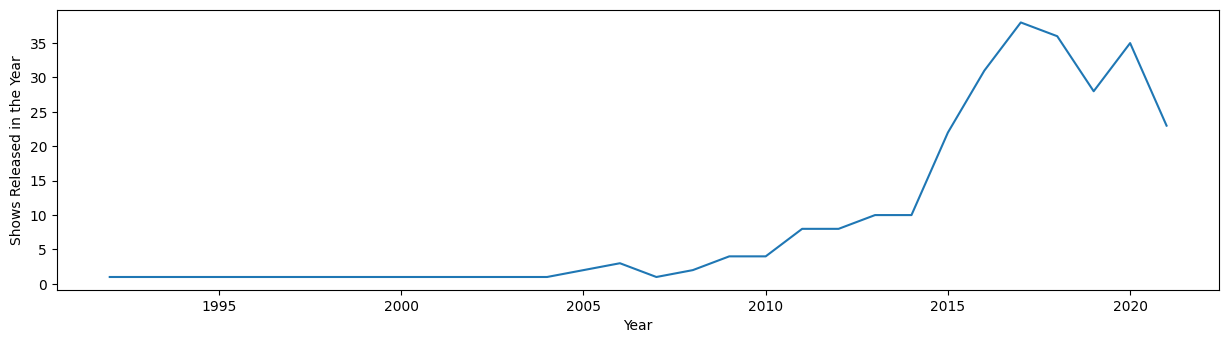

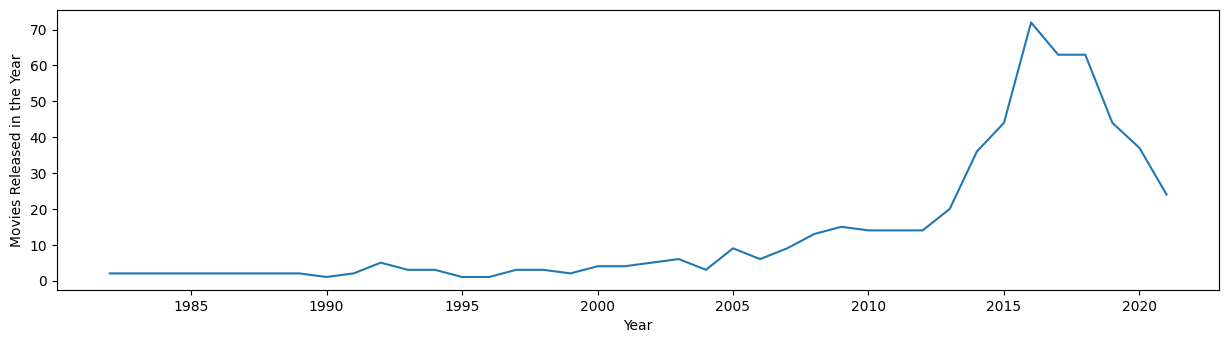

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
data_release_year=data_uk_shows[data_uk_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
data_release_year=data_uk_movies[data_uk_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=data_release_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In UK, Tv Shows release year trend started to decline after 2020.

In UK, Movies release year trend started to decline after 2018.


In [ ]:
#Analysing a combination of actors and directors
data_uk_shows['Actor_Director_Combination'] = data_uk_shows.cast.str.cat(data_uk_shows.director, sep=' and ')
data_uk_shows_subset=data_uk_shows[data_uk_shows['cast']!='Unknown Cast']
data_uk_shows_subset=data_uk_shows_subset[data_uk_shows_subset['director']!='Unknown Director']
data_uk_shows_subset.head()

<ipython-input-167-67e85e453d76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uk_shows['Actor_Director_Combination'] = data_uk_shows.cast.str.cat(data_uk_shows.director, sep=' and ')


title          cast         director  \
323  The Great British Baking Show  Mel Giedroyc  Andy Devonshire   
324  The Great British Baking Show  Mel Giedroyc  Andy Devonshire   
325  The Great British Baking Show   Sue Perkins  Andy Devonshire   
326  The Great British Baking Show   Sue Perkins  Andy Devonshire   
327  The Great British Baking Show    Mary Berry  Andy Devonshire   

            country         listed_in show_id     type          date_added  \
323  United Kingdom  British TV Shows      s9  TV Show  September 24, 2021   
324  United Kingdom        Reality TV      s9  TV Show  September 24, 2021   
325  United Kingdom  British TV Shows      s9  TV Show  September 24, 2021   
326  United Kingdom        Reality TV      s9  TV Show  September 24, 2021   
327  United Kingdom  British TV Shows      s9  TV Show  September 24, 2021   

     release_year rating   duration Content_Added_Date  Content_Added_Month  \
323          2021  TV-14  9 Seasons         2021-09-24                    9   
324          2021  TV-14  9 Seasons         2021-09-24                    9   
325          2021  TV-14  9 Seasons         2021-09-24                    9   
326          2021  TV-14  9 Seasons         2021-09-24                    9   
327          2021  TV-14  9 Seasons         2021-09-24                    9   

     Content_Added_Week  Content_Added_Year        Actor_Director_Combination  
323                  38                2021  Mel Giedroyc and Andy Devonshire  
324                  38                2021  Mel Giedroyc and Andy Devonshire  
325                  38                2021   Sue Perkins and Andy Devonshire  
326                  38                2021   Sue Perkins and Andy Devonshire  
327                  38                2021    Mary Berry and Andy Devonshire

In [ ]:
#Analysing a combination of actors and directors
data_uk_movies['Actor_Director_Combination'] = data_uk_movies.cast.str.cat(data_uk_movies.director, sep=' and ')
data_uk_movies_subset=data_uk_movies[data_uk_movies['cast']!='Unknown Cast']
data_uk_movies_subset=data_uk_movies_subset[data_uk_movies_subset['director']!='Unknown Director']
data_uk_movies_subset.head()

<ipython-input-168-539524daf12c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uk_movies['Actor_Director_Combination'] = data_uk_movies.cast.str.cat(data_uk_movies.director, sep=' and ')


title                 cast      director         country  \
188  Sankofa         Kofi Ghanaba  Haile Gerima  United Kingdom   
189  Sankofa         Kofi Ghanaba  Haile Gerima  United Kingdom   
190  Sankofa         Kofi Ghanaba  Haile Gerima  United Kingdom   
206  Sankofa  Oyafunmike Ogunlano  Haile Gerima  United Kingdom   
207  Sankofa  Oyafunmike Ogunlano  Haile Gerima  United Kingdom   

                listed_in show_id   type          date_added  release_year  \
188                Dramas      s8  Movie  September 24, 2021          1993   
189    Independent Movies      s8  Movie  September 24, 2021          1993   
190  International Movies      s8  Movie  September 24, 2021          1993   
206                Dramas      s8  Movie  September 24, 2021          1993   
207    Independent Movies      s8  Movie  September 24, 2021          1993   

    rating duration Content_Added_Date  Content_Added_Month  \
188  TV-MA  125 min         2021-09-24                    9   
189  TV-MA  125 min         2021-09-24                    9   
190  TV-MA  125 min         2021-09-24                    9   
206  TV-MA  125 min         2021-09-24                    9   
207  TV-MA  125 min         2021-09-24                    9   

     Content_Added_Week  Content_Added_Year  \
188                  38                2021   
189                  38                2021   
190                  38                2021   
206                  38                2021   
207                  38                2021   

               Actor_Director_Combination  
188         Kofi Ghanaba and Haile Gerima  
189         Kofi Ghanaba and Haile Gerima  
190         Kofi Ghanaba and Haile Gerima  
206  Oyafunmike Ogunlano and Haile Gerima  
207  Oyafunmike Ogunlano and Haile Gerima

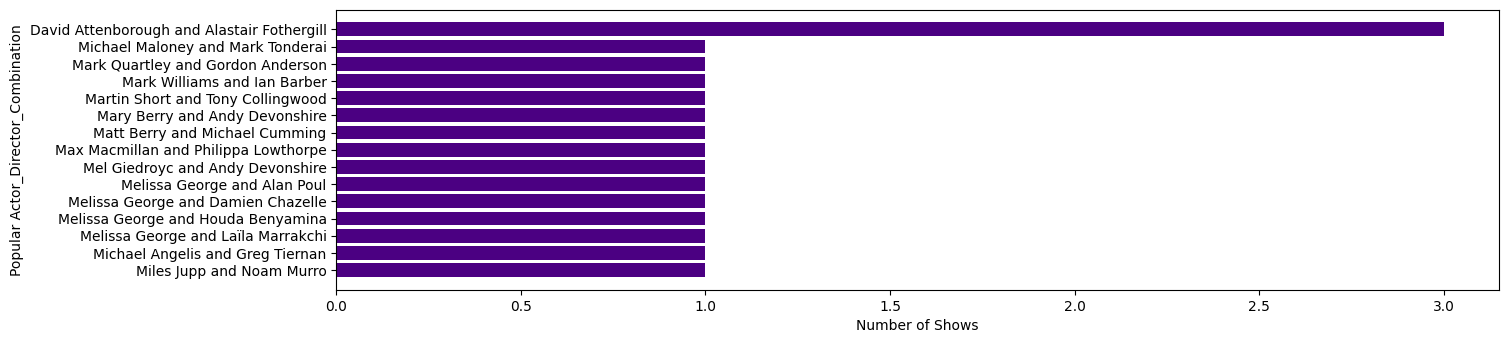

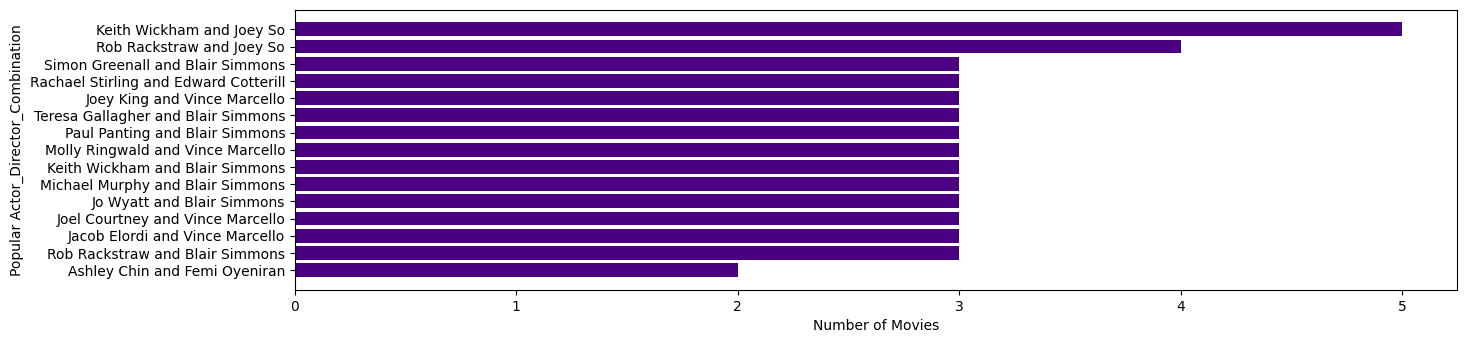

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
data_cast=data_uk_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['Actor_Director_Combination']!='Unknown Director']
plt.barh(data_cast[::-1]['Actor_Director_Combination'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor_Director_Combination')
plt.show()

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
data_cast=data_uk_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
data_cast=data_cast[data_cast['Actor_Director_Combination']!='Unknown Director']
plt.barh(data_cast[::-1]['Actor_Director_Combination'], data_cast[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor_Director_Combination')
plt.show()



In [ ]:
data_cast[::-1]['Actor_Director_Combination'].values

array(['Miles Jupp and Noam Murro', 'Michael Angelis and Greg Tiernan',
       'Melissa George and Laïla Marrakchi',
       'Melissa George and Houda Benyamina',
       'Melissa George and Damien Chazelle',
       'Melissa George and Alan Poul', 'Mel Giedroyc and Andy Devonshire',
       'Max Macmillan and Philippa Lowthorpe',
       'Matt Berry and Michael Cumming', 'Mary Berry and Andy Devonshire',
       'Martin Short and Tony Collingwood',
       'Mark Williams and Ian Barber',
       'Mark Quartley and Gordon Anderson',
       'Michael Maloney and Mark Tonderai',
       'David Attenborough and Alastair Fothergill'], dtype=object)

The Most Popular Actor Director Combination in Shows Across UK are:-

1.   David Attenborough and Alastair Fothergill
1.   Michael Maloney and Mark Tonderai
1.   Mark Quartley and Gordon Anderson
1.   Mark Williams and Ian Barber
2.   Martin Short and Tony Collingwood

The Most Popular Actor Director Combination in Movies Across UK are:-


1.   Keith Wickham and Joey So
1.   Rob Rackstraw and Joey So
1.   Simon Greenall and Blair Simmons
1.   Rachael Stirling and Edward Cotterill
2.   Joey King and Vince Marcello
2.   Teresa Gallagher and Blair Simmons
2.   Paul Panting and Blair Simmons
2.   Molly Ringwald and Vince Marcello
1.   Keith Wickham and Blair Simmons
2.   Michael Murphy and Blair Simmons
1.   Jo Wyatt and Blair Simmons
1.   Joel Courtney and Vince Marcello
2.   Jacob Elordi and Vince Marcello
2.   Rob Rackstraw and Blair Simmons

# **Overall Insights**

1. The most popular content type across countries in both Movies and TV shows are Drama, Comedy, International TV Shows and International Movies.
1.  United States, India, United Kingdom and Japan are some of the countries dominating the content in Netflix.
1.  Anupam Kher, Shah Rukh Khan and Julie Tejwani are the popular actors.
1.  Rajiv Chilaka, Jan Suter and Raúl Campos are the popular directors.
2.  Most of the contents were added in the year 2019.
2.  Most of the contents release year was 2018.



# **Recommendations**

1.   Overall Movies and TV Shows addition started to decline for the past few years. It is recommended to add some more Movies/Shows content.
1.   Add the contents in the platform during July and December months.
1.   Add the contents in the platform during the weeks of First and Mid months.
1.   Recently released movies/Tv shows are less available in the platform. Add the recently released content.
2.   The Targeted duration of Movies for USA and UK is found to be 80-100, whereas for India it is 100-120. Therefore it is recommended to add content with the above range
2.   The Targeted duration of Shows for USA, India and UK is found to be 1 Season.
2.   Mostly for USA, India and UK the ratings were Mature Audience and 14+ contents, in which UK the R rating dominates over others.
2.   Add movies for USA, it has been decling from 2019.
2.   Add both TV shows and movies for India, since it has been decling from 2020 and 2018 respectively.
1.   Add both TV shows and movies for India, since it has been decling from 2019 respectively.
1.   Recently released movies and TV Shows are less available in Netflix, hence it is recommended to add more recently contents.
2.   Popular actor and director combination for each country is specific. Hence take this insight has recommendation and create contents





